Perform Principal component analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Wine.csv')

In [4]:
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
data.size

2492

In [7]:
data.shape

(178, 14)

In [8]:
data.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [9]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [10]:
#Data Exploration

In [11]:
data['Type'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [12]:
data.Type.unique()

array([1, 2, 3], dtype=int64)

In [13]:
data.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [14]:
#Dropping Type Feature as it is a classifier that we have three types of wines which we need to find in clustering by keeping it will affect our inferences and further analysis

In [15]:
data['ID'] = range(1, 179, 1)
data

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline   ID  
0             0.28             2.29   5.64  1.04      3.92     1065    1  
1             0.26             1.28   4.38  1.05      3.40     1050    2  
2             0.30             2.81   5.68  1.03      3.17     1185    3  
3             0.24             2.18   7.80  0.86      3.45     1480    4  
4             0.39             1.82   4.32  1.04      2.93      735    5  
..             ...              ...    ...   ...       ...      ...  ...  
173           0.52             1.06   7.70  0.64      1.74      740  174  
174           0.43             1.41   7.30  0.70      1.56      750  175  
175           0.43             1.35  10.20  0.59      1.56      835  176  
176           0.53             1.46   9.30  0.60      1.62      840  177  
177           0.56             1.35   9.20  0.61      1.60      560  178  

[178 rows x 15 columns]

In [16]:
df = data.drop('Type',axis=1)

In [17]:
#Descriptive Statistics

In [18]:
data.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline          ID  
count  178.000000  178.000000   178.000000  178.000000  
mean     0.957449    2.611685   746.893258   89.500000  
std      0.228572    0.709990   314.907474   51.528309  
min      0.480000    1.270000   278.000000    1.000000  
25%      0.782500    1.937500   500.500000   45.250000  
50%      0.965000    2.780000   673.500000   89.500000  
75%      1.120000    3.170000   985.000000  133.750000  
max      1.710000    4.000000  1680.000000  178.000000

In [19]:
#Looking for some statistical information about each feature, we can see that the features have very diferrent scales

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
 14  ID               178 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 21.0 KB


In [21]:
#Missing Values

In [22]:
# As a part of the Data cleansing we check the data for any missing/ na values
# null count for columns
null_count_col = df.isnull().sum().value_counts(ascending=False)

In [23]:

print("Null Count for Columns:\n\n", null_count_col)

Null Count for Columns:

 0    14
dtype: int64


In [24]:
# null percentage for columns

null_percent_col = (df.isnull().sum() * 100 / len(df)).value_counts(ascending=False)
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Percentage for Columns:

 0.0    14
dtype: int64


In [25]:
# null count for rows
null_count_row = df.isnull().sum(axis=1).value_counts(ascending=False)
print("Null Count for Rows:\n\n", null_count_row, "\n")

Null Count for Rows:

 0    178
dtype: int64 



In [26]:
# null percentage for rows
null_percent_row = (df.isnull().sum(axis=1) * 100 / len(df)).value_counts(ascending=False)
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Percentage for Rows:

 0.0    178
dtype: int64


In [27]:
#Duplicated Values

In [28]:
#print the duplicated rows

In [30]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
df.duplicated().sum()

0

In [31]:
df[df.duplicated()]

Empty DataFrame
Columns: [Alcohol, Malic, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color, Hue, Dilution, Proline, ID]
Index: []

In [32]:
#There are no missing / Null and Duplicated values either in columns or rows, so we can move on to the next step, which is Exploratory Data Analysis.

In [33]:
#Exploratory Data Analysis

In [34]:
df.skew()

Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
ID                 0.000000
dtype: float64

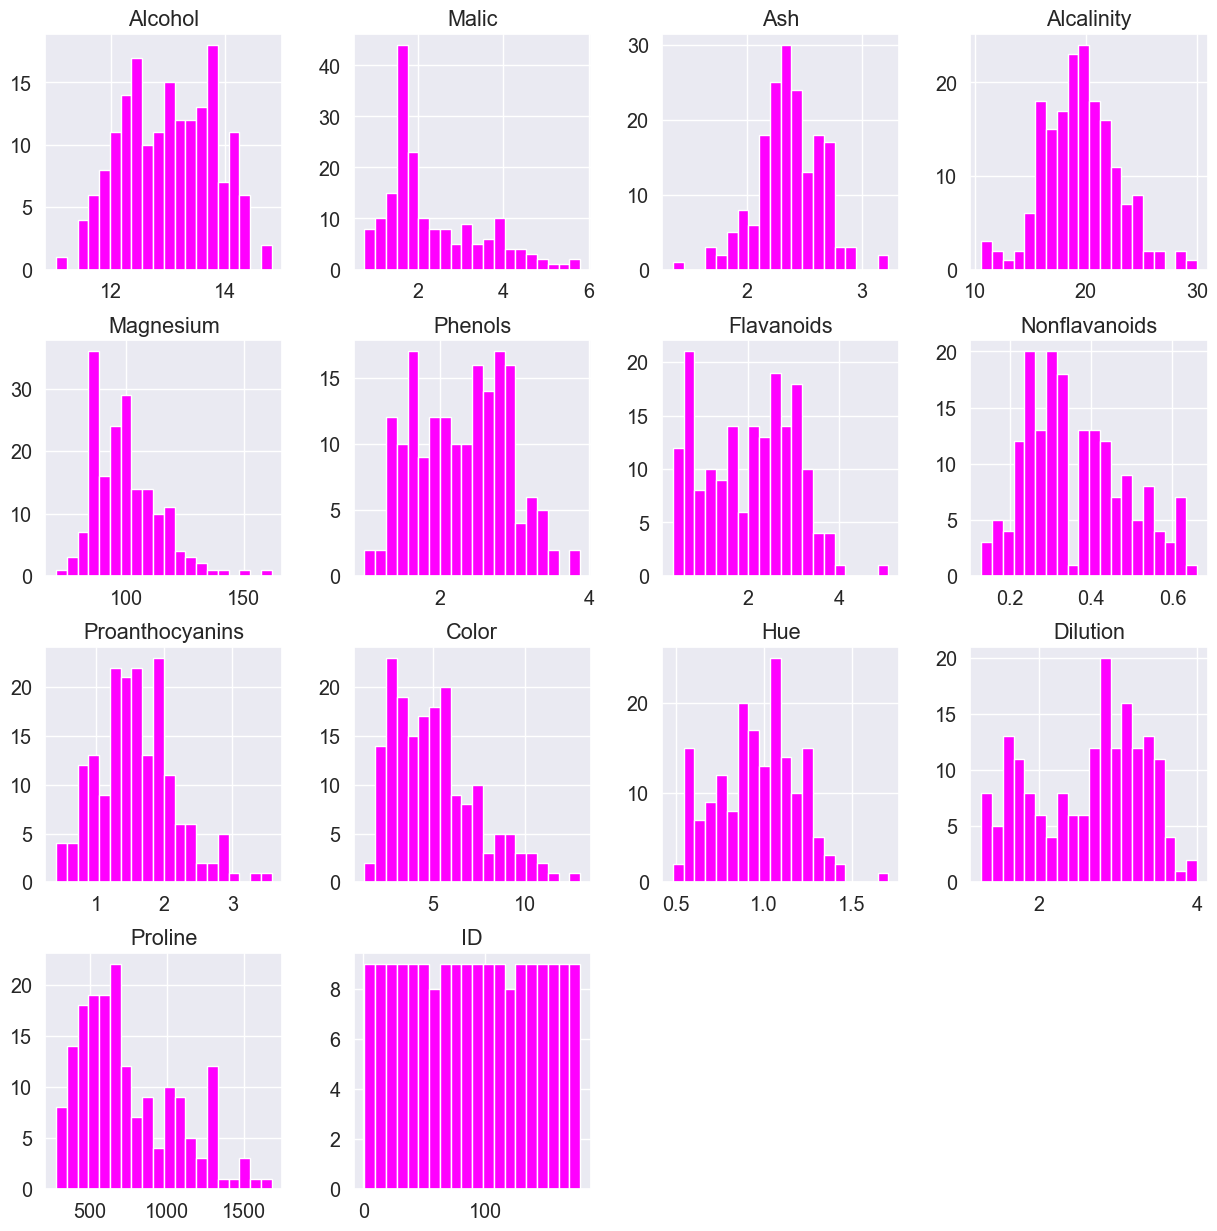

In [35]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(15,15)})
ax=df.hist(bins=20,color='magenta' )

Plotting the histogram of each numerical variable (in this case, all features), the main idea here is to visualize the data distribution for each feature. This method can bring fast insights as:<br>
1.Check the kind of each feature distribution<br>
2.Check data symmetry<br>
3.Verify features frequency<br>
4.Identify outliers

In [36]:
#Outliers Detection

In [37]:
#To reinforce our insights about the data symmetry and their outliers, we can plot some boxplots:

In [38]:
df.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

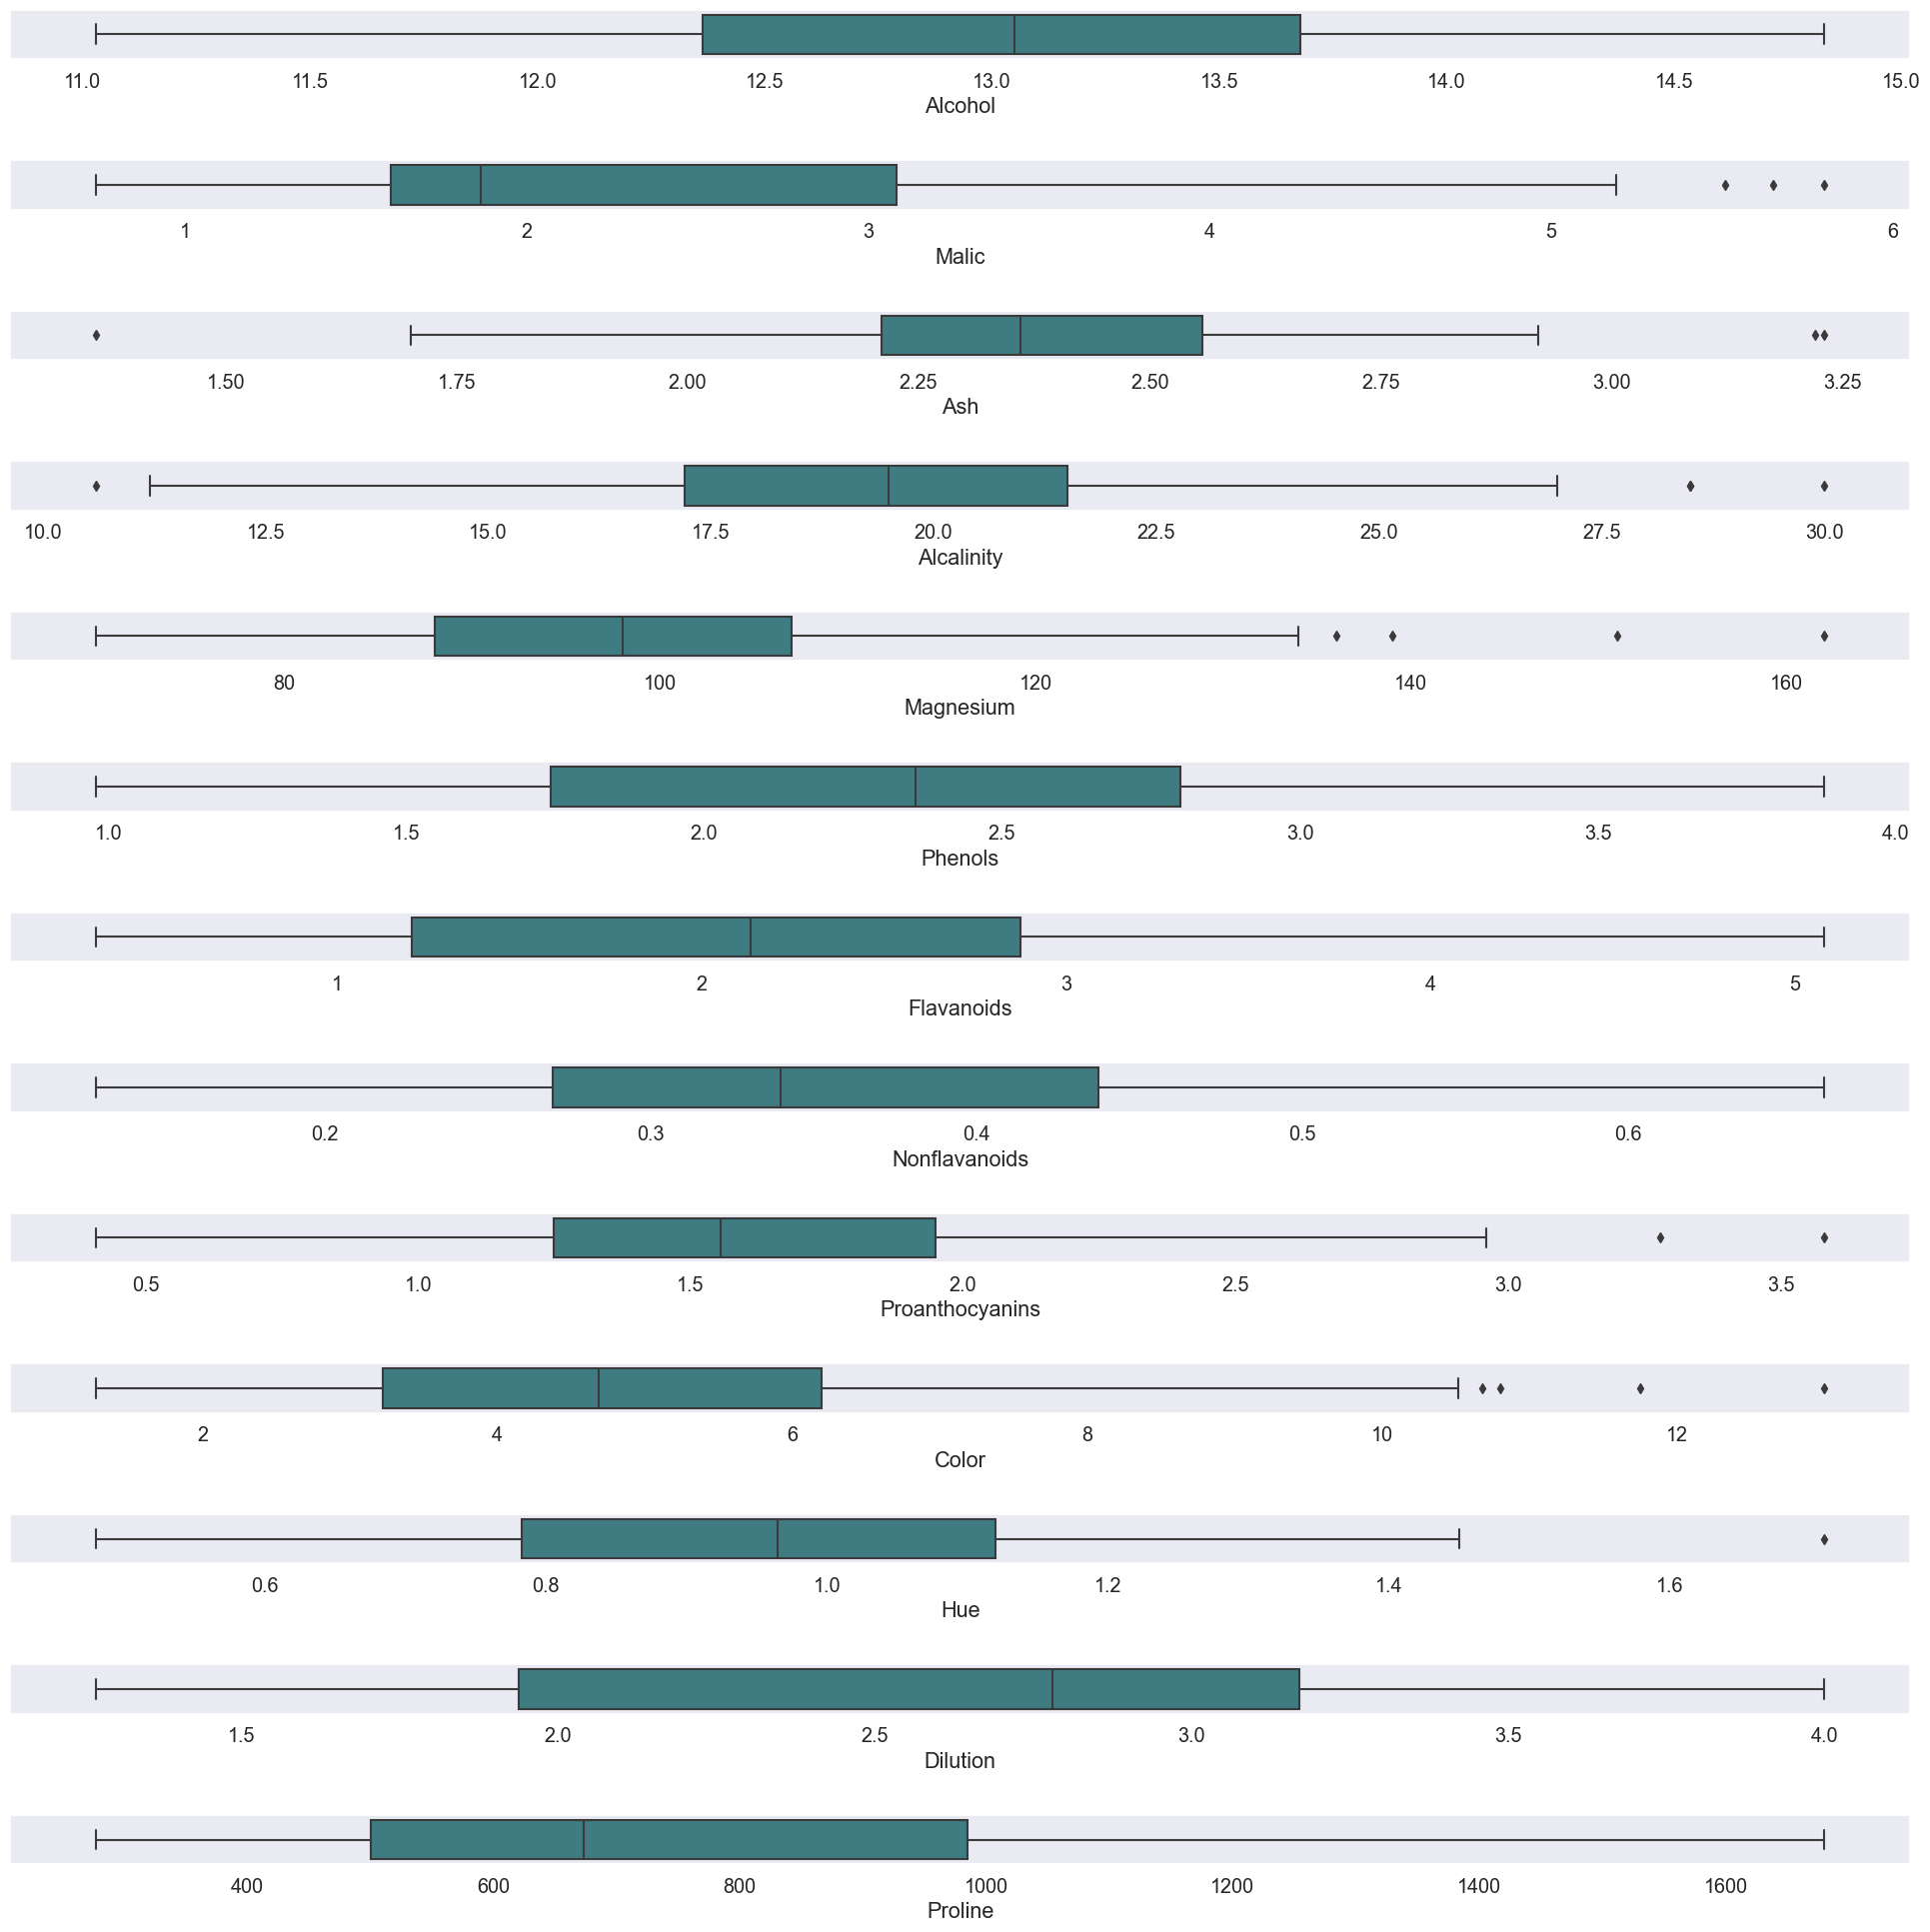

In [39]:
ot=df.copy() 
fig, axes=plt.subplots(13,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=ot,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)

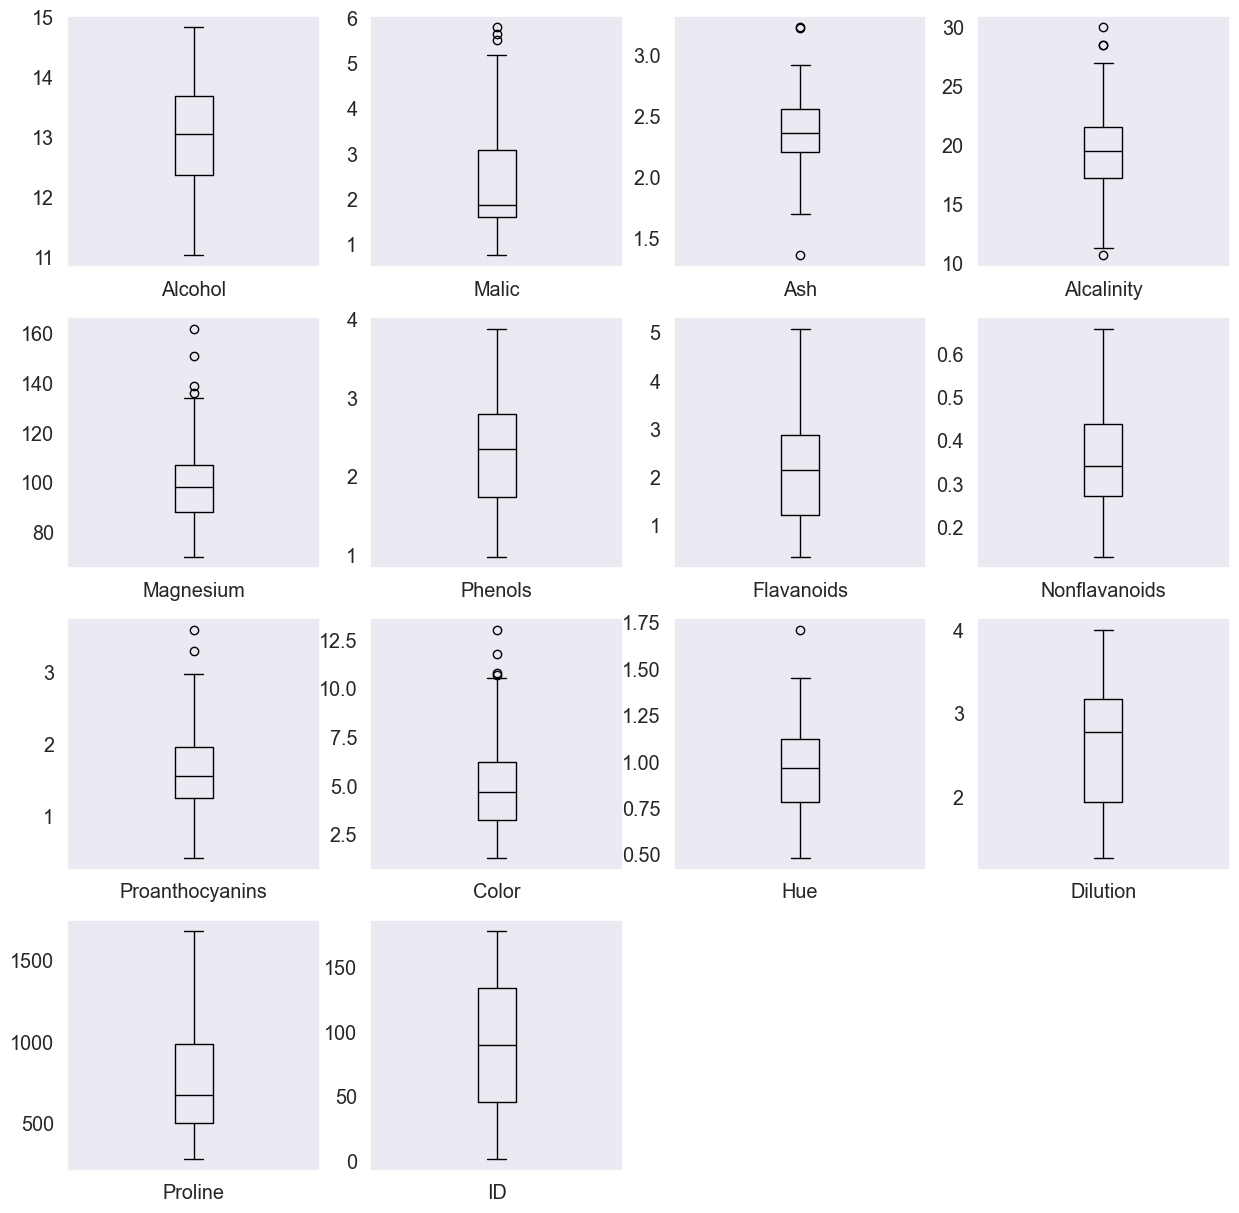

In [40]:
df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

In [47]:
#Data Visualization

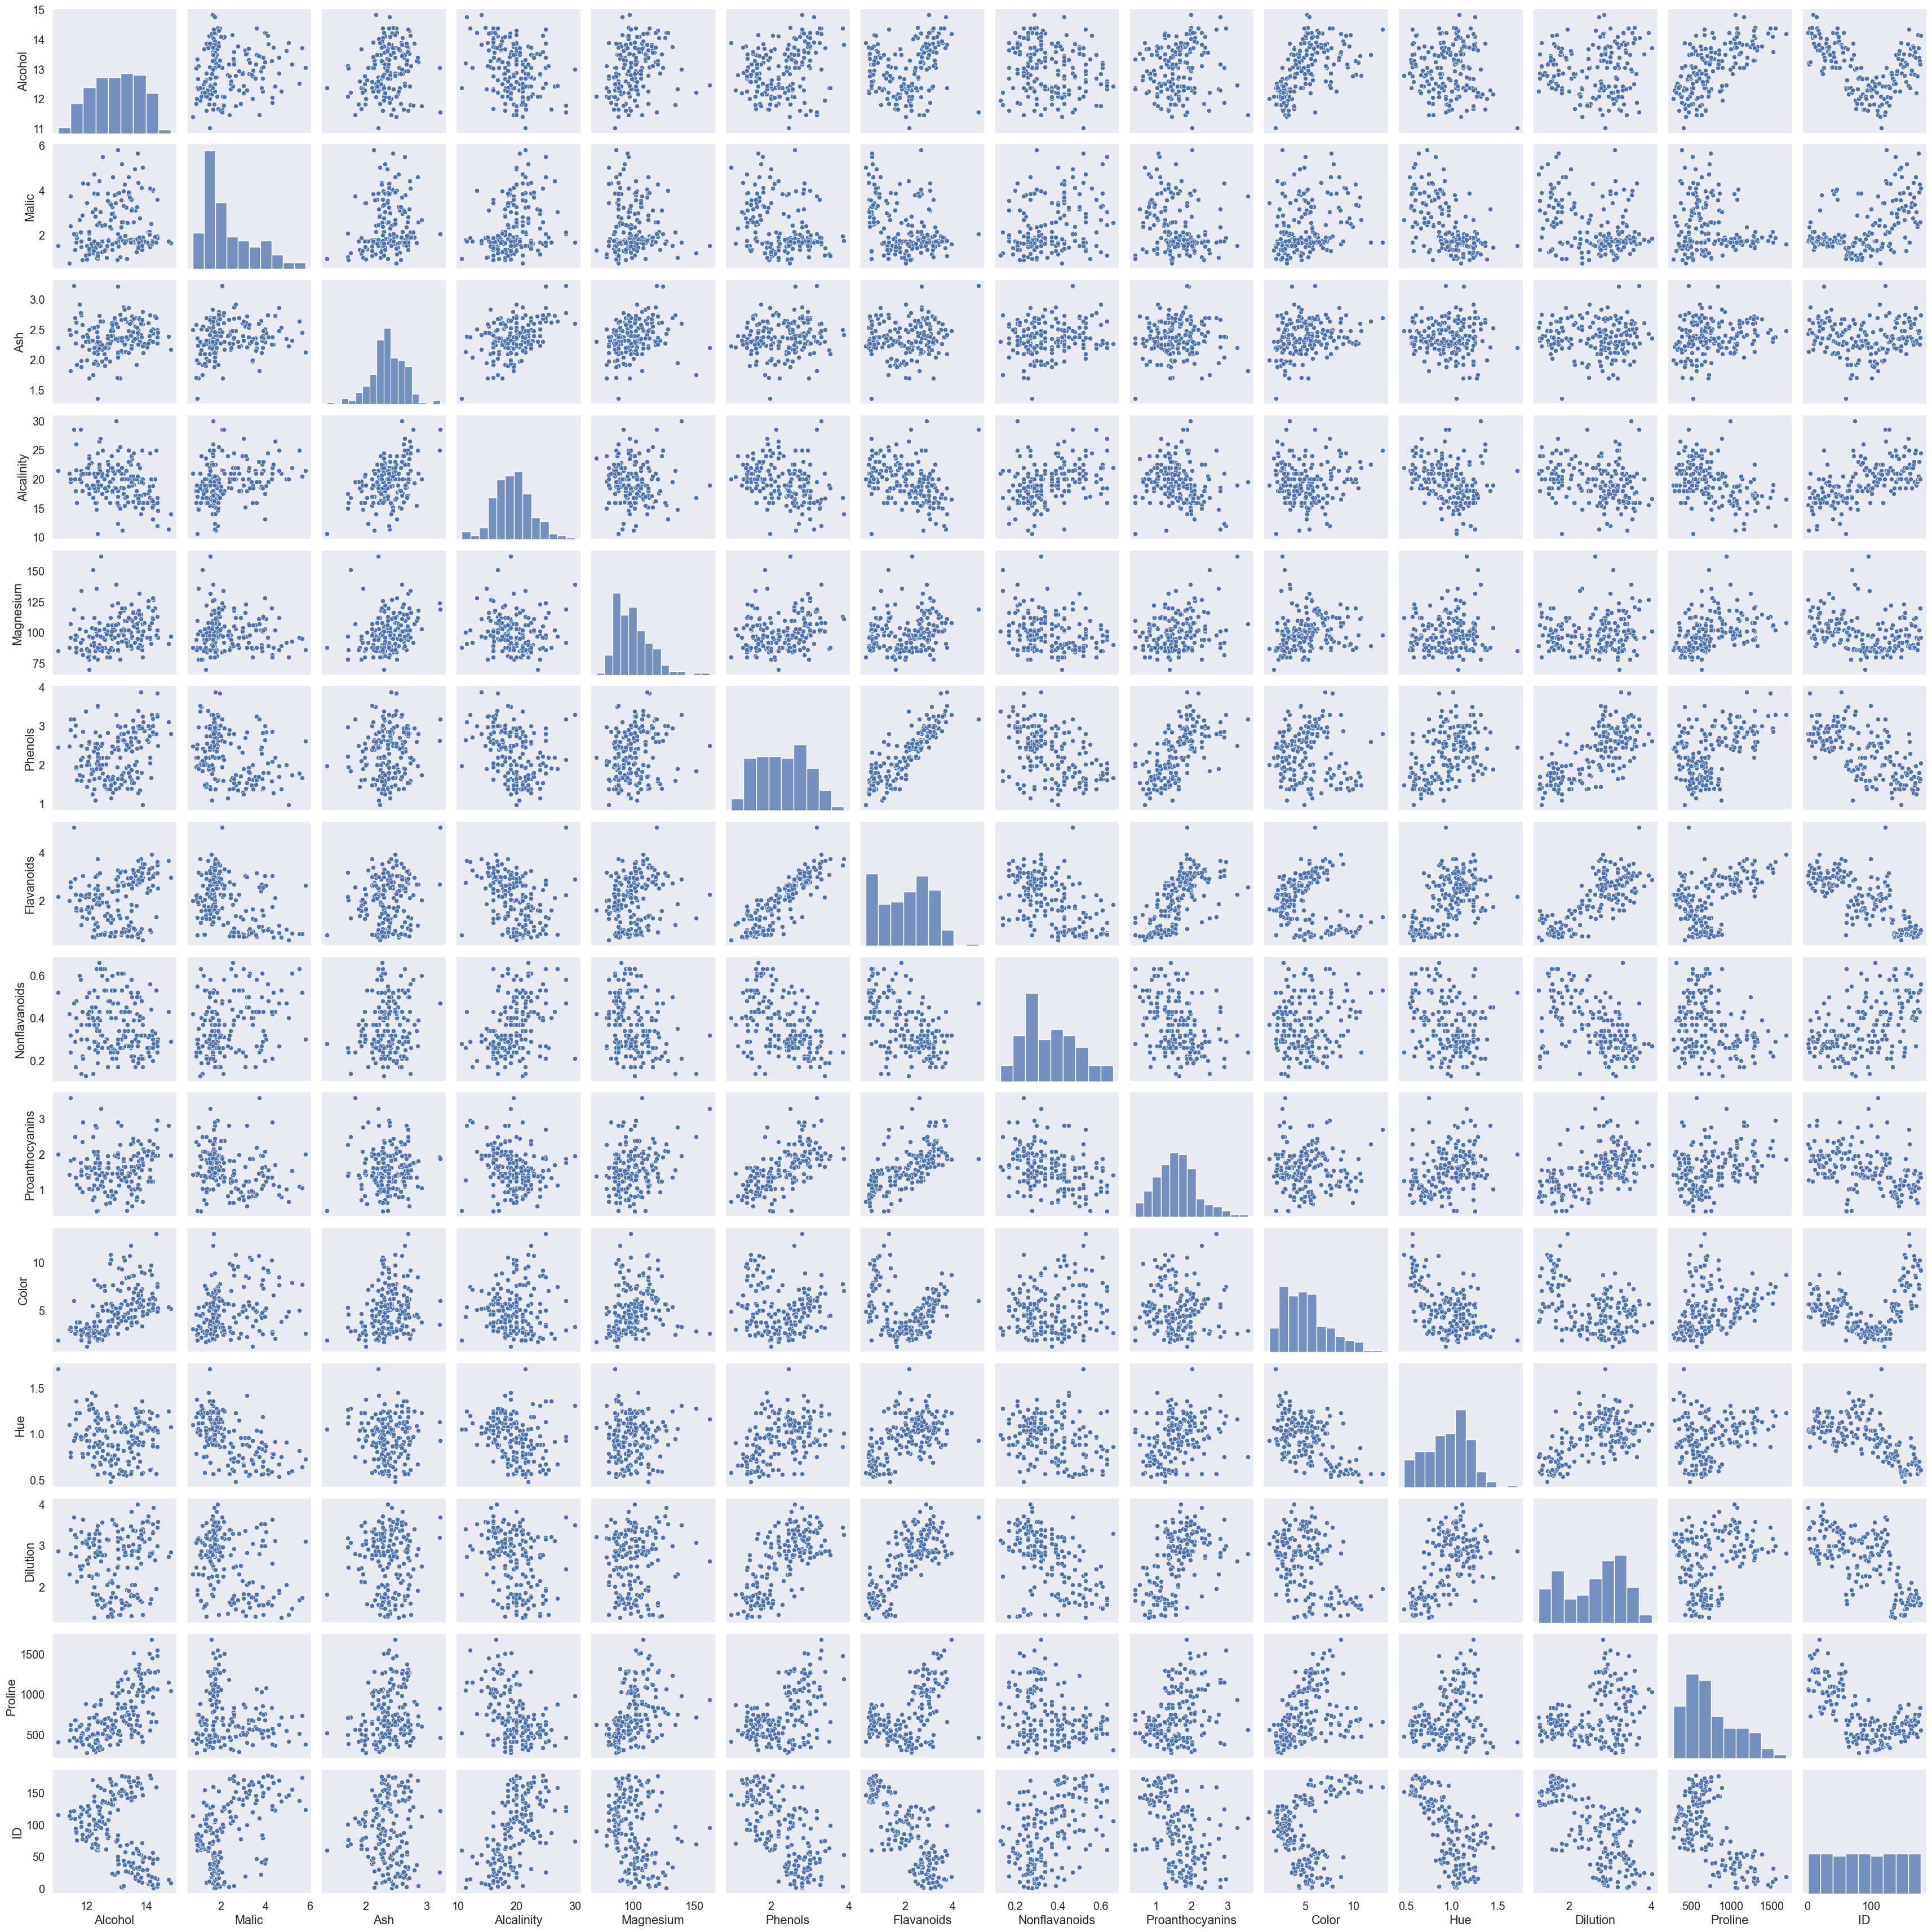

In [48]:
sns.pairplot(df,palette="light")

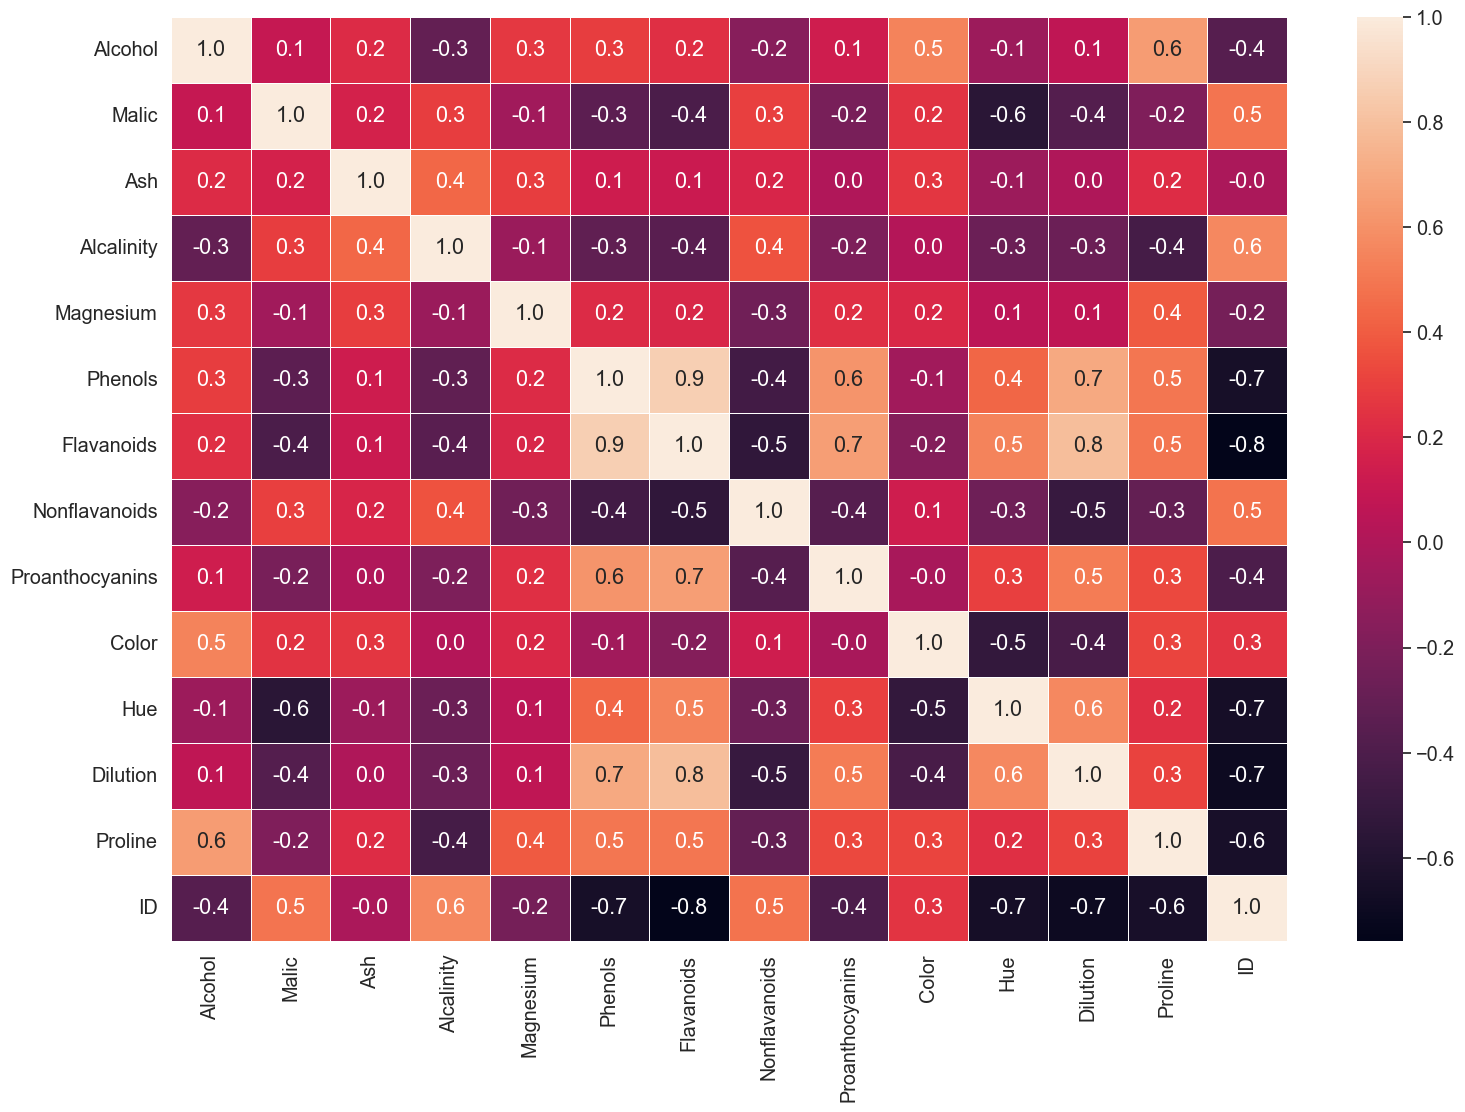

In [51]:
# correlation heatmap
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Unique points in this correlation matrix:<br>

.Phenols is positively correlated with Flavanoids, Dilution and Proanthocyanins<br>
.Flavanoids is positively correlated with Proanthocyanins and Dilution<br>
.Dilution is positively correlated with Hue<br>
.Alcohol is positively correlated with Proline

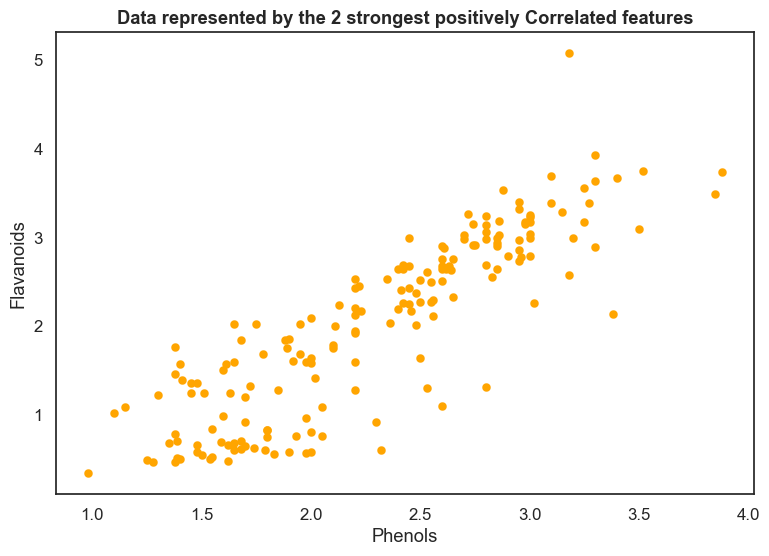

In [53]:
# Plotting frequent flying Phenols vs. Flavanoids  
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)
plt.scatter(x=df['Phenols'], y=df['Flavanoids'], color='orange',lw=0.1)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Data represented by the 2 strongest positively Correlated features',fontweight='bold')
plt.show()

# Data Preprocessing

1.Applying Standard Scaler on the Data

In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [56]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)

In [57]:
std_df.shape


(178, 14)

2.Applying MinMax Scaler on Dataset

In [58]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [59]:
minmax_df = minmax.fit_transform(df)
minmax_df.shape

(178, 14)

# PCA

In [60]:
#PCA on Standard Scaled Dataset

In [62]:
from sklearn.decomposition import PCA

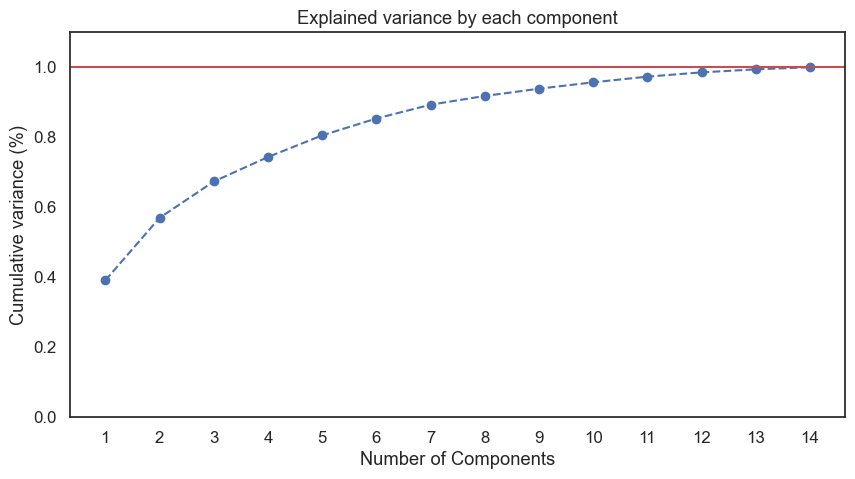

In [67]:
# PCA
pca_var = PCA()
pca_var.fit(std_df)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+std_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+std_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [68]:
# the amount of variance that each PCA explains is 
var = pca_var.explained_variance_ratio_
var

array([0.39129819, 0.17835849, 0.10392085, 0.06990396, 0.06183992,
       0.04819035, 0.03948381, 0.02490743, 0.02078919, 0.01822808,
       0.01621756, 0.01222483, 0.00864803, 0.0059893 ])

Text(0.5, 1.0, 'Explained variance by each component')

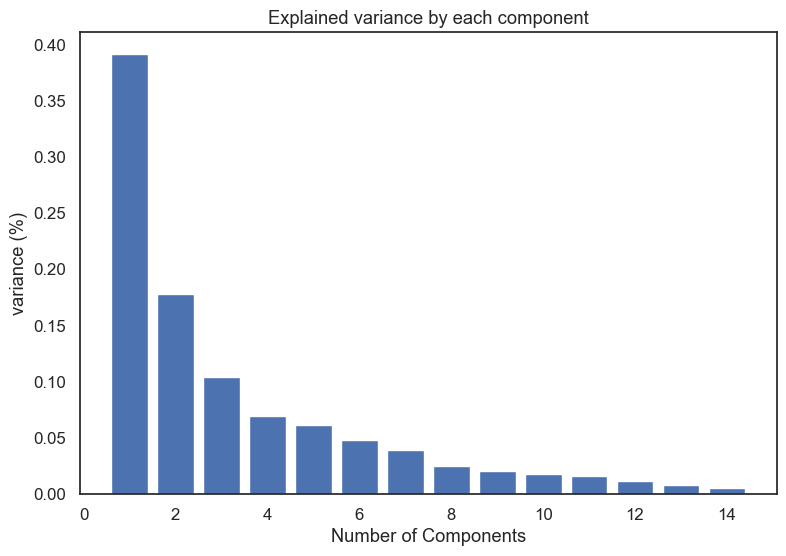

In [72]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [73]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.13, 56.97, 67.36, 74.35, 80.53, 85.35, 89.3 , 91.79, 93.87,
       95.69, 97.31, 98.53, 99.39, 99.99])

In [77]:
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_df)
# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])
# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(178, 3)


PC1       PC2       PC3
0  3.723816 -1.447476 -0.153274
1  2.734987  0.334166 -2.079717
2  2.944840 -1.033583  0.979570
3  4.094144 -2.762344 -0.123541
4  1.550429 -0.867267  1.915570

In [78]:
#PCA plot in 2D

Text(0, 0.5, 'PC2')

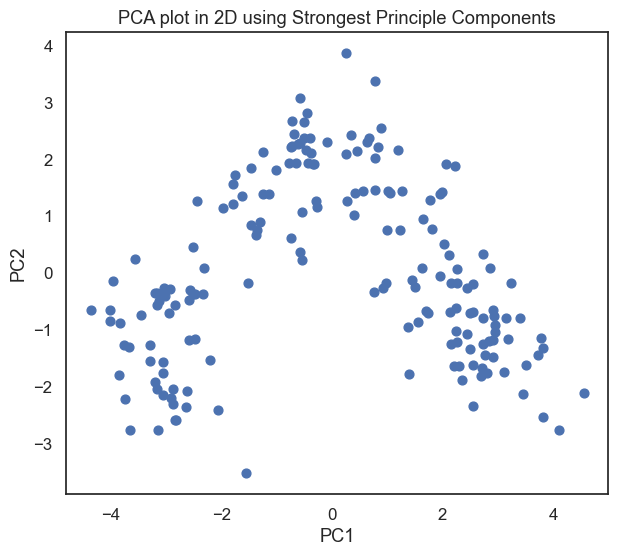

In [80]:
plt.figure(figsize=(7,6))
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], s=40)
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [81]:
#PCA on MinMax Scaled Dataset

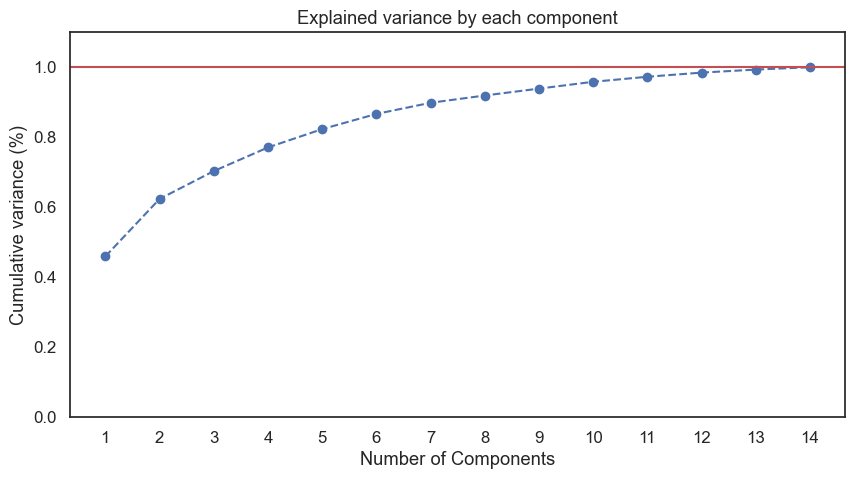

In [84]:
pca_var = PCA()
pca_var.fit(minmax_df)

plt.figure(figsize=(10,5))
xi = np.arange(1, 1+minmax_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+minmax_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [85]:
#It is interesting to see that with just 2 components we capture over 50% of the variance. And by moving up to 3 components, we get 2 thirds of the variance.

In [87]:
# the amount of variance that each PCA explains is 
var = pca_var.explained_variance_ratio_
var

array([0.459506  , 0.16420046, 0.07951977, 0.06762289, 0.05235124,
       0.04342315, 0.03180871, 0.02082412, 0.01966956, 0.01951889,
       0.01435926, 0.01185743, 0.0086919 , 0.0066466 ])

Text(0.5, 1.0, 'Explained variance by each component')

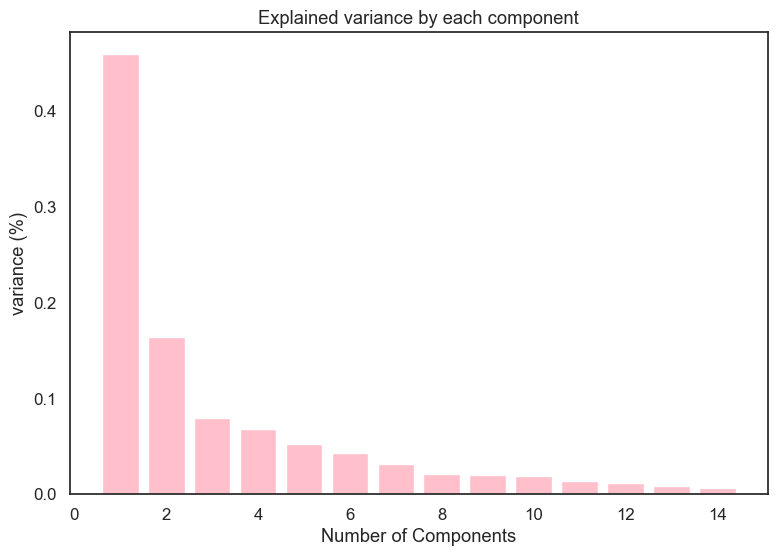

In [89]:
plt.bar(range(1, len(var)+1),var,color='pink')
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [90]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 45.95,  62.37,  70.32,  77.08,  82.32,  86.66,  89.84,  91.92,
        93.89,  95.84,  97.28,  98.47,  99.34, 100.  ])

In [92]:
pca = PCA(n_components=3)
pca_minmax = pca.fit_transform(minmax_df)
# Convert to data frame
pca_minmax_df = pd.DataFrame(data = pca_minmax, columns = ['PC1', 'PC2','PC3'])
# Shape and preview
print(pca_minmax_df.shape)
pca_minmax_df.head()

(178, 3)


PC1       PC2       PC3
0  0.864955 -0.246505  0.012715
1  0.676158 -0.011751 -0.306279
2  0.692172 -0.186686  0.139093
3  0.955057 -0.568299  0.123337
4  0.411640 -0.067685  0.118278

In [93]:
#The new columns are called Principal Components (PC's) and give the coordinates of the data in the new smaller space

In [94]:
#PCA plot in 2D

Text(0, 0.5, 'PC2')

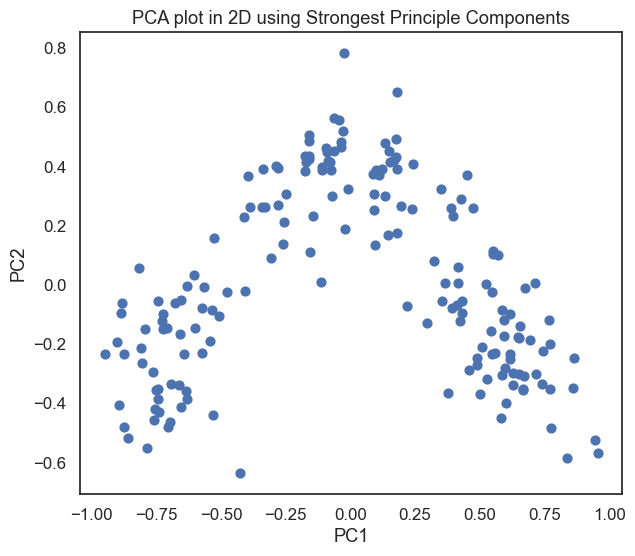

In [96]:
plt.figure(figsize=(7,6))
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], s=40)
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

# KMeans Clustering

In [97]:
#KMeans Clustering

In [101]:
from tqdm import tqdm
from sklearn.cluster import KMeans

In [102]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_std_df)
    inertia.append(kmeans.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.26it/s]


In [104]:
from sklearn.metrics import silhouette_score as sil

In [105]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_std_df)
    silhouette[i] = sil(pca_std_df, kmeans.labels_, metric='euclidean')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.25it/s]


In [106]:
#internal measures for cluster validation
#The goal of partitioning clustering algorithms is to split the data set into clusters of objects.

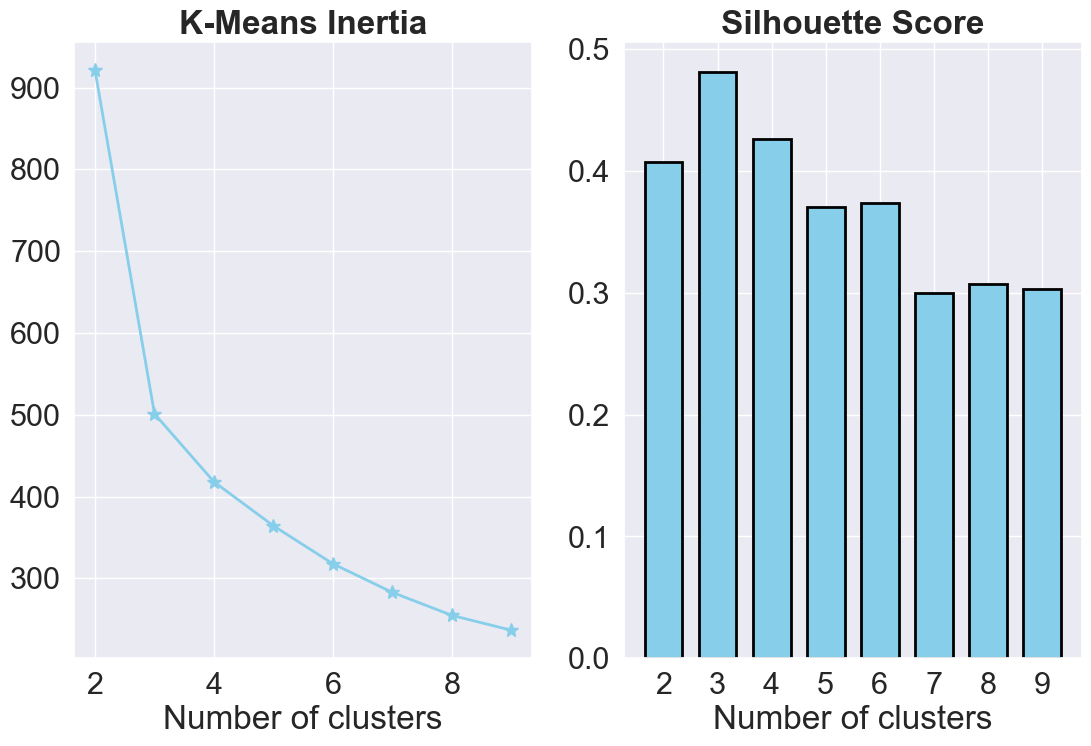

In [110]:
sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')

plt.show()

In [111]:
#There is a clearly visible "elbow" . A choice of 3 clusters seems to be fair the maximum silhouette score also indicates that.

# Silhouette Score

In [112]:
#The silhouette analysis measures how well an observation is clustered and it estimates the average distance between clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters.

In [113]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(pca_std_df, KM_est.labels_)
    s_scores.append(silhouette_avg)

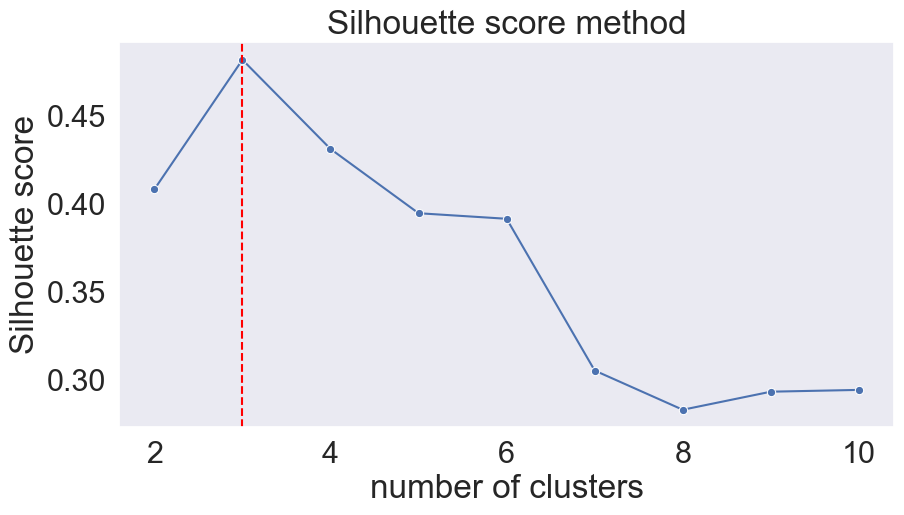

In [117]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

In [118]:
#Silhouette score method indicates the best options would be respectively 3 clusters.

In [120]:
from yellowbrick.cluster import KElbowVisualizer

Elbow Plot for Standard Scaler data


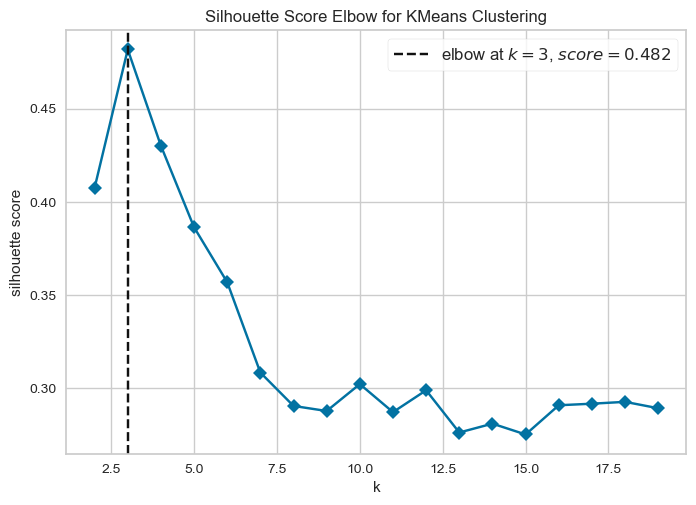

In [124]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(pca_std_df)    
visualizer.show()
plt.show()

In [127]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= sil(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.40748327911081017
For n_clusters = 3 The average silhouette_score is : 0.4817835370724269
For n_clusters = 4 The average silhouette_score is : 0.4310924081843297
For n_clusters = 5 The average silhouette_score is : 0.41489679453806727
For n_clusters = 6 The average silhouette_score is : 0.38372271476753916
For n_clusters = 7 The average silhouette_score is : 0.30996557235673206
For n_clusters = 8 The average silhouette_score is : 0.2886299672842358
For n_clusters = 9 The average silhouette_score is : 0.2957346845976878


In [131]:
from sklearn.metrics import calinski_harabasz_score as chs, silhouette_samples
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.40748327911081017
For n_clusters = 3 The average silhouette_score is : 0.4817835370724269
For n_clusters = 4 The average silhouette_score is : 0.4310924081843297
For n_clusters = 5 The average silhouette_score is : 0.41489679453806727
For n_clusters = 6 The average silhouette_score is : 0.38372271476753916
For n_clusters = 7 The average silhouette_score is : 0.30996557235673206
For n_clusters = 8 The average silhouette_score is : 0.2886299672842358
For n_clusters = 9 The average silhouette_score is : 0.2957346845976878


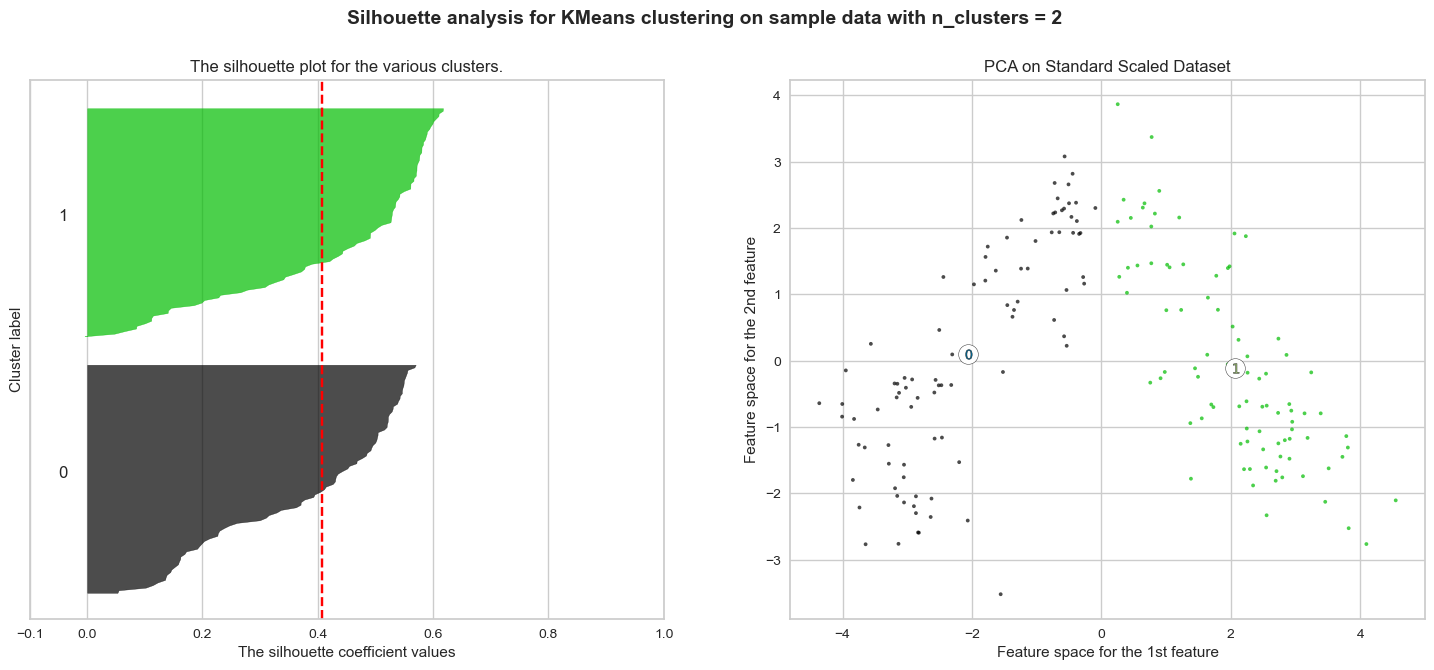

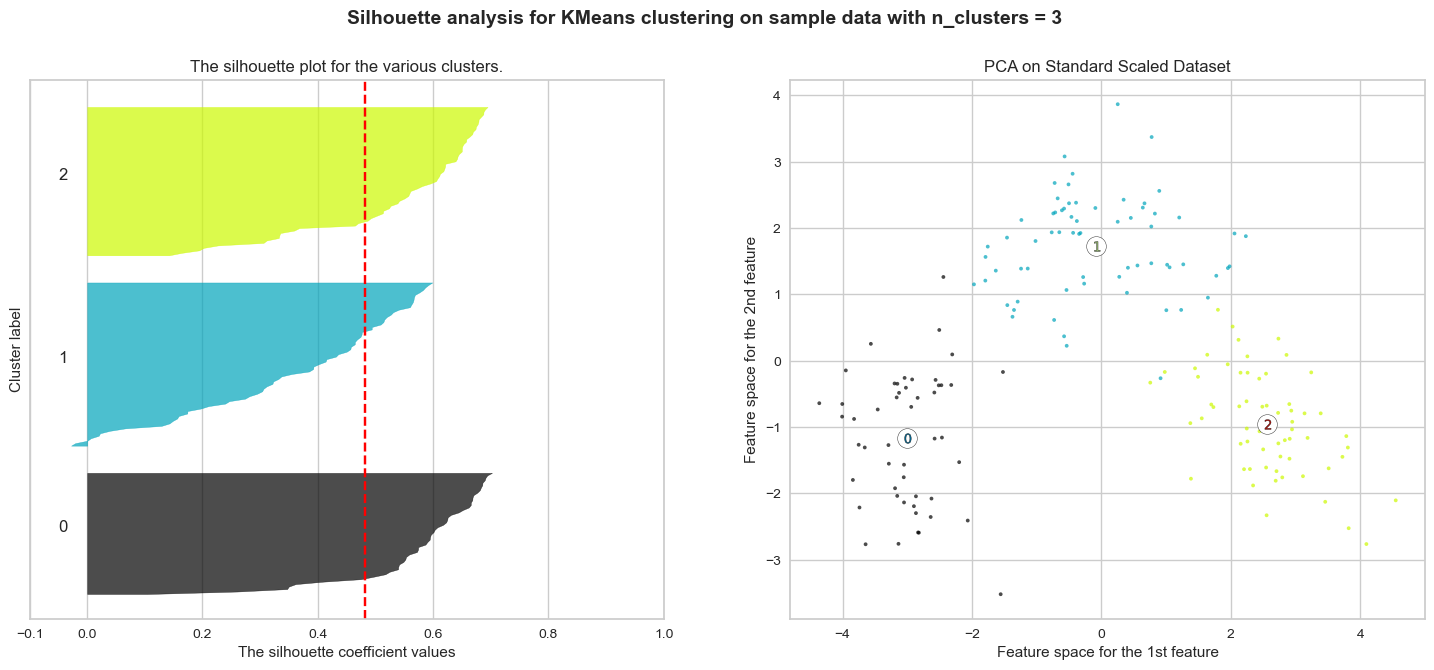

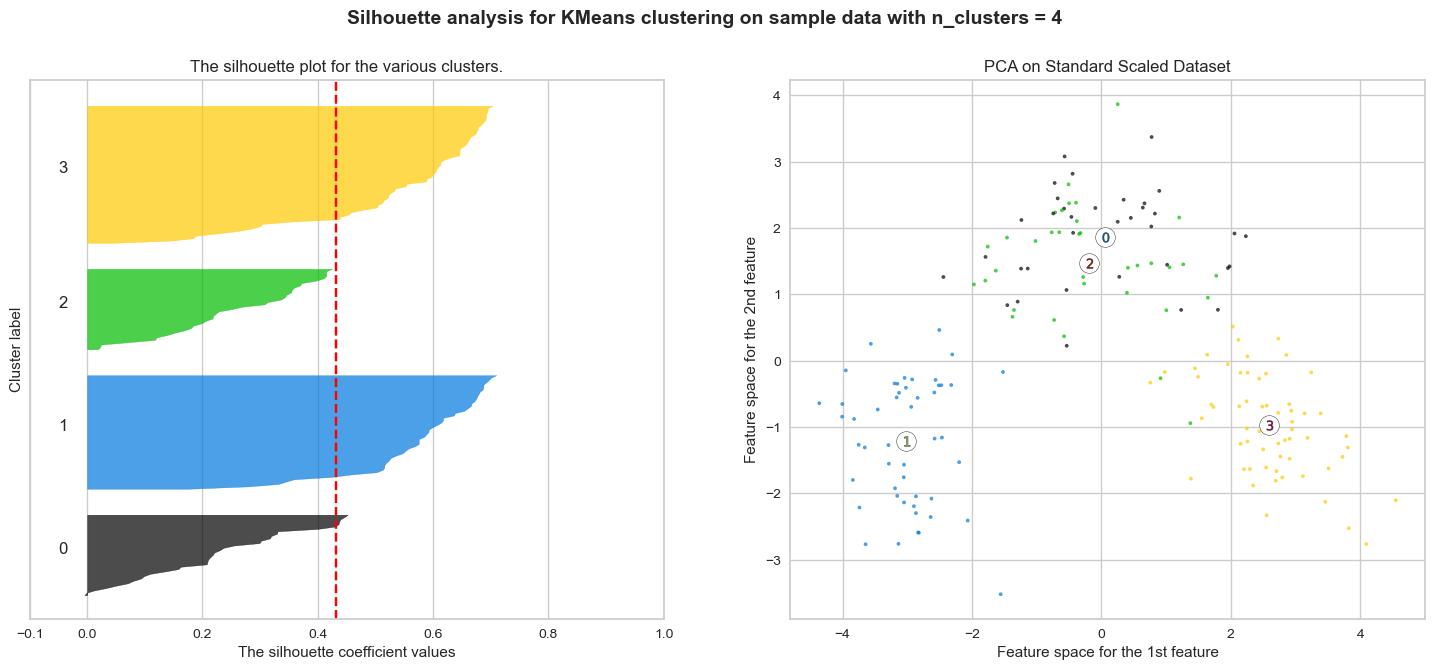

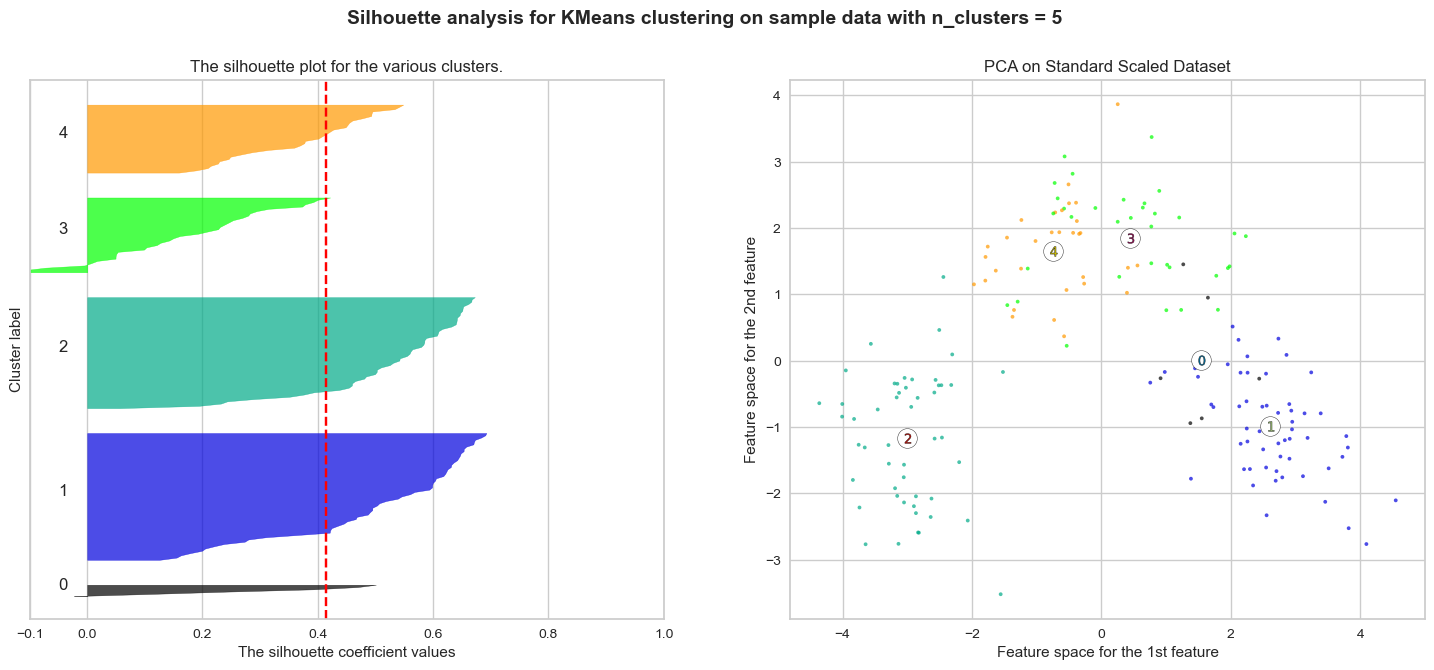

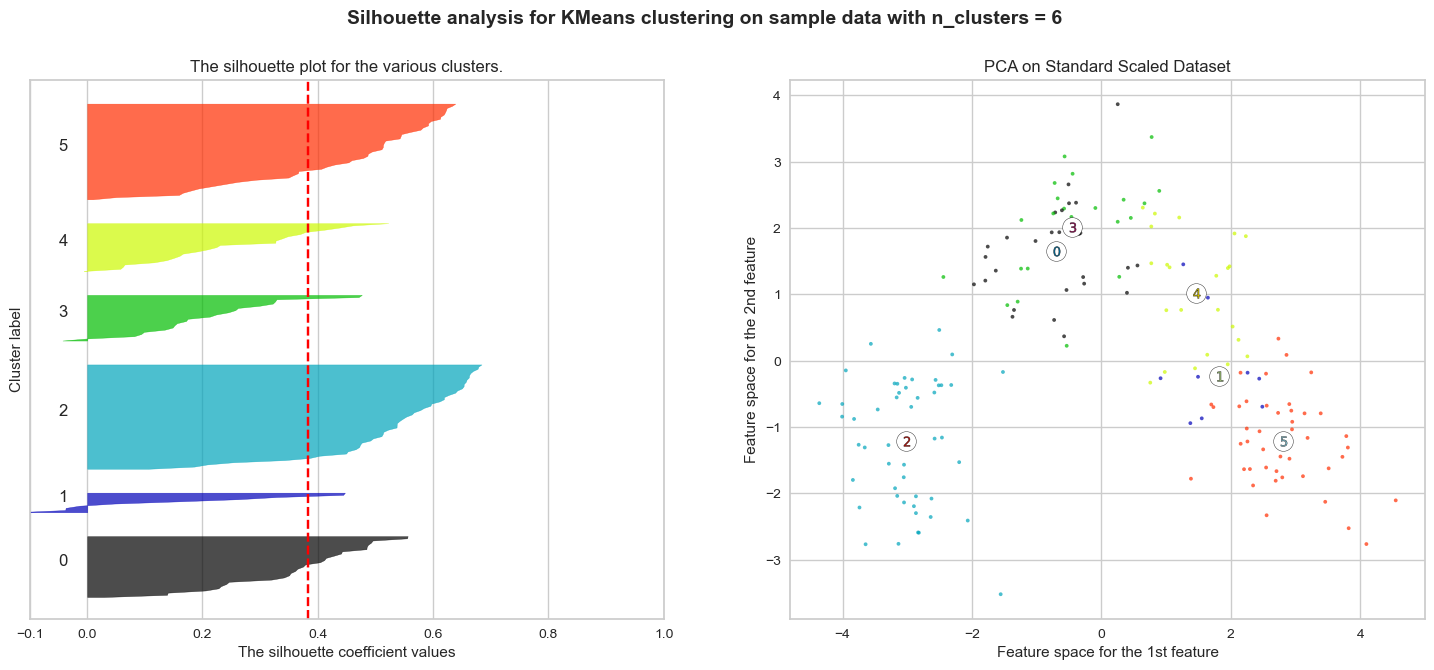

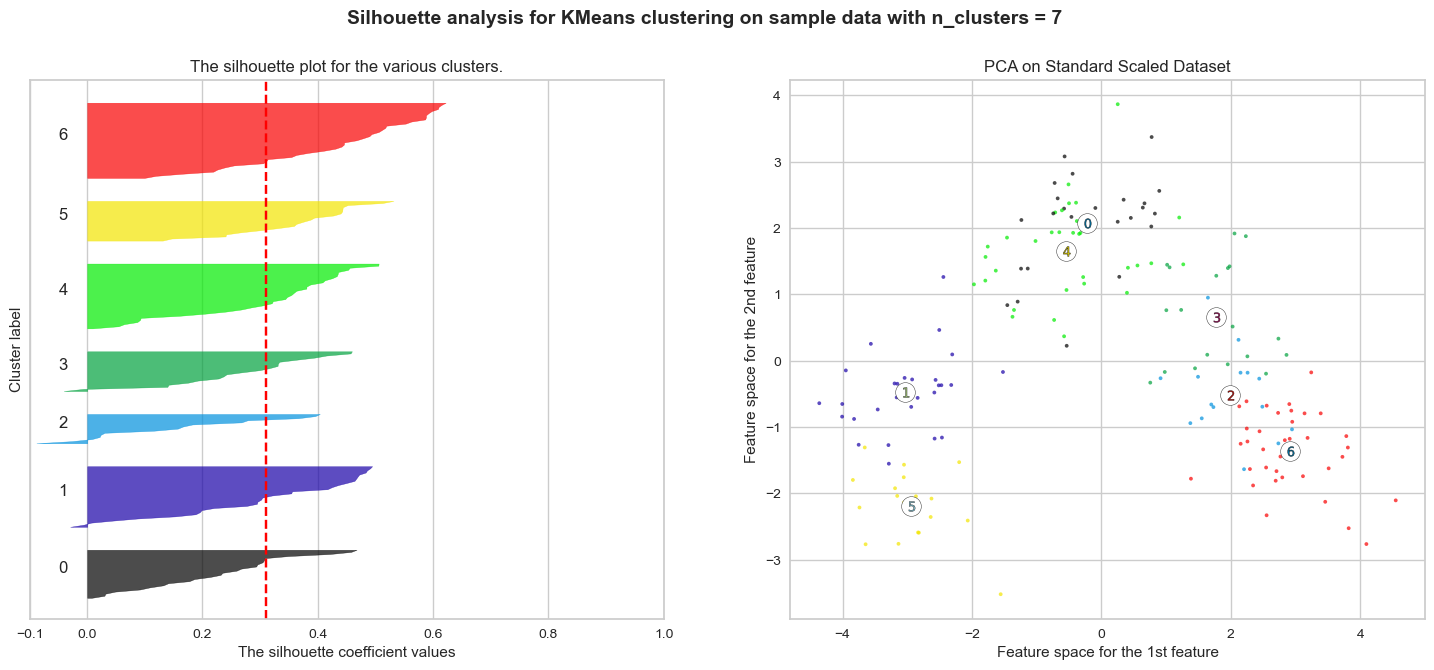

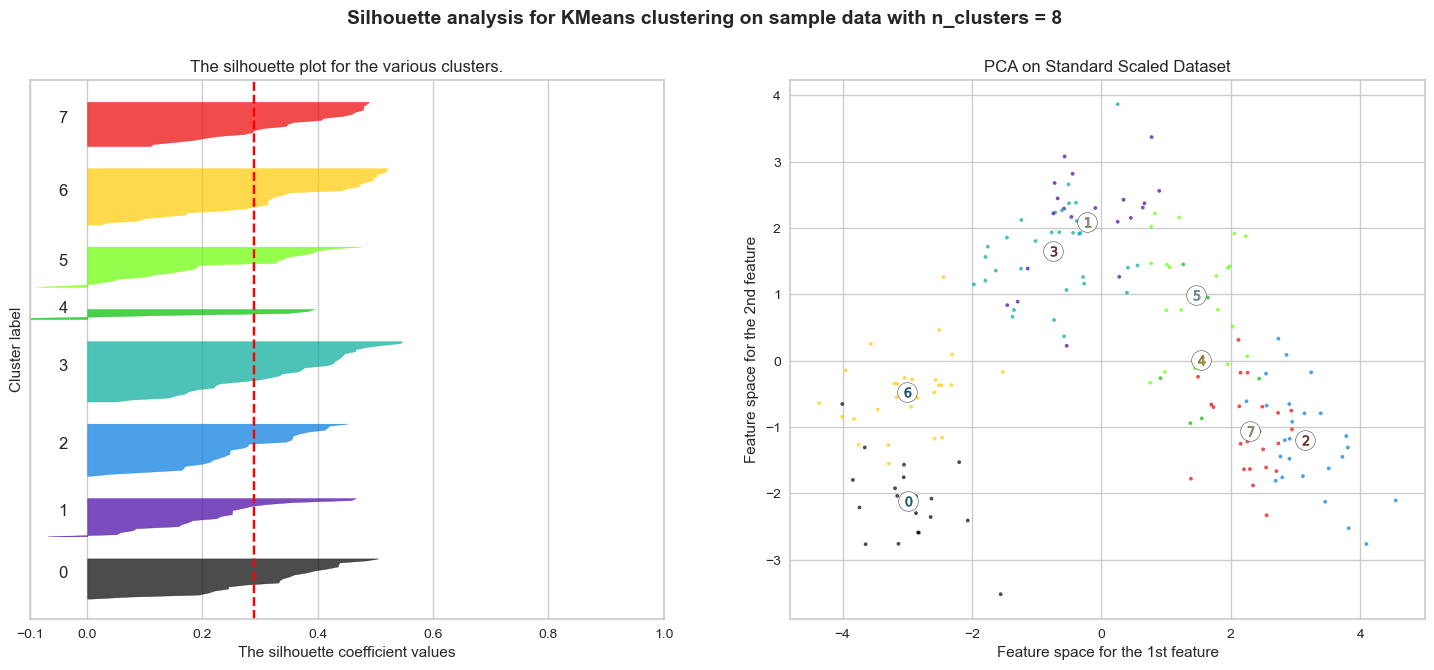

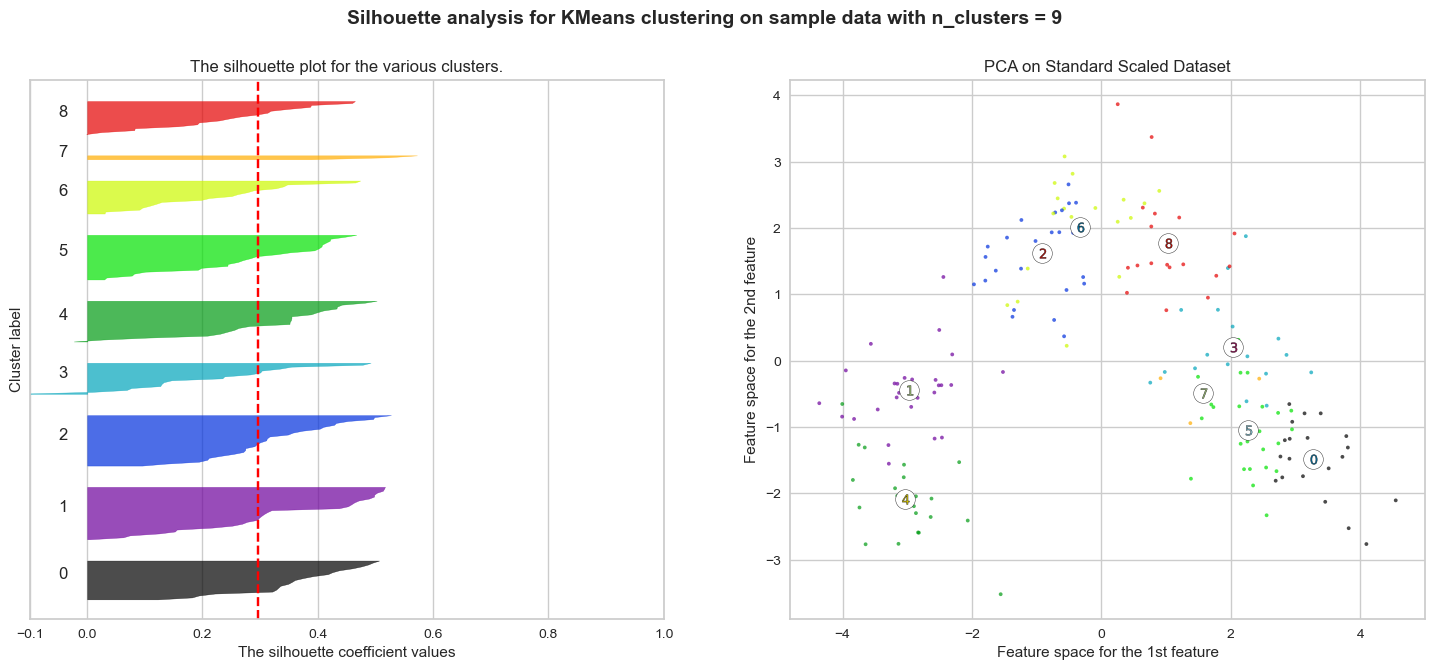

In [132]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(pca_std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(pca_std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("PCA on Standard Scaled Dataset")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Conclusion:<br>
According the the silhouette score of:<br>
The standardized data, the ideal number of clusters is 3, with a score higher than other options, of 0.48

In [133]:
#Build KMeans Cluster algorithm using K=3 and PCA on Standard Scaler Applied Dataset

In [134]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_df)
y_predict_kmeans.shape

(178,)

In [135]:
# these are nothing but cluster labels...
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [136]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [137]:
# cluster centres associated with each lables
model_kmeans.cluster_centers_

array([[-3.00022931, -1.16059366, -0.23271123],
       [-0.08562687,  1.72743604,  0.24903744],
       [ 2.55325354, -0.9460415 , -0.08278602]])

In [139]:
## Inertia is the sum of squared error for each cluster.
model_kmeans.inertia_

501.17482400537693

In [140]:
#Assign clusters to the data set
data['Kmeans_label'] = model_kmeans.labels_

In [141]:
# Group data by Clusters (K=6)
data.groupby('Kmeans_label').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
                  mean       mean      mean      mean       mean        mean   
Kmeans_label                                                                   
0             2.960000  13.144000  3.346200  2.425600  21.330000   98.640000   
1             2.000000  12.246418  1.891642  2.242985  20.140299   93.238806   
2             1.032787  13.711475  1.997049  2.453770  17.281967  107.786885   

               Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
                  mean       mean          mean            mean      mean   
Kmeans_label                                                                
0             1.677200   0.807000       0.45040        1.156400  7.264400   
1             2.258209   2.085672       0.36194        1.612836  3.059701   
2             2.842131   2.969180       0.28918        1.922951  5.444590   

                   Hue  Dilution      Proline          ID  
                  mean      mean         mean        mean  
Kmeans_label                                               
0             0.686200  1.698800   622.440000  152.380000  
1             1.059493  2.798507   508.597015   95.104478  
2             1.067705  3.154754  1110.639344   31.803279

In [144]:
#Elbow Method and Silhouette Score on PCA MinMaxScaler Applied Data

In [145]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_minmax_df)
    inertia.append(kmeans.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.46it/s]


In [147]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_minmax_df)
    silhouette[i] = sil(pca_minmax_df, kmeans.labels_, metric='euclidean')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.43it/s]


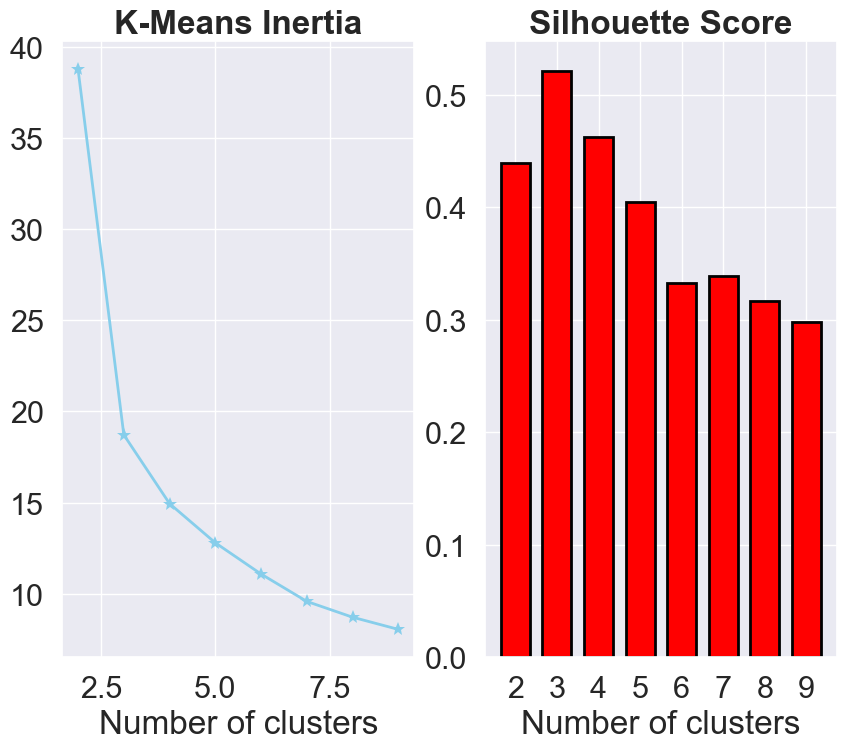

In [150]:
sns.set(style="darkgrid", rc={'figure.figsize':(10,8)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="red" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')
plt.show()

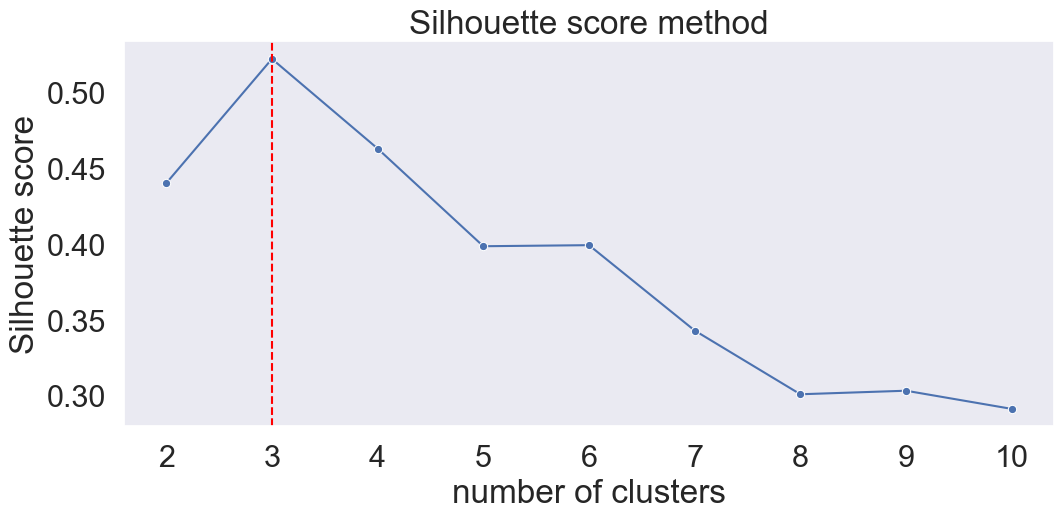

In [152]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_minmax_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(pca_minmax_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for MinMaxScaler data


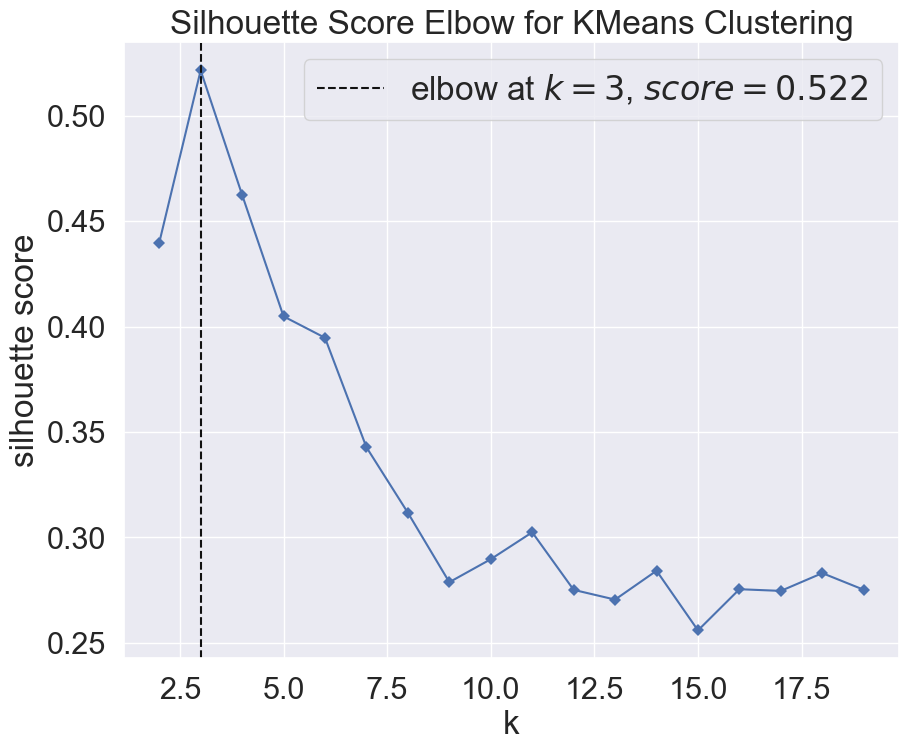

In [154]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(pca_minmax_df)    
visualizer.show()
plt.show()

In [157]:
clust_list = [2,3,4,5,6,7,8,9]
#  Silhouette score for MinMaxScaler Applied on data .
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_minmax_df)
    sil_score1= sil(pca_minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.43975041589138875
For n_clusters = 3 The average silhouette_score is : 0.5215335527289148
For n_clusters = 4 The average silhouette_score is : 0.4625268425813935
For n_clusters = 5 The average silhouette_score is : 0.3982593665485297
For n_clusters = 6 The average silhouette_score is : 0.3947108989572142
For n_clusters = 7 The average silhouette_score is : 0.3289857388561523
For n_clusters = 8 The average silhouette_score is : 0.31172322269137387
For n_clusters = 9 The average silhouette_score is : 0.2997463078410953


For n_clusters = 2 The average silhouette_score is : 0.43975041589138875
For n_clusters = 3 The average silhouette_score is : 0.5215335527289148
For n_clusters = 4 The average silhouette_score is : 0.4625268425813935
For n_clusters = 5 The average silhouette_score is : 0.40486336459064215
For n_clusters = 6 The average silhouette_score is : 0.3947108989572142
For n_clusters = 7 The average silhouette_score is : 0.3427923839600768
For n_clusters = 8 The average silhouette_score is : 0.31172322269137387
For n_clusters = 9 The average silhouette_score is : 0.2787828910972608


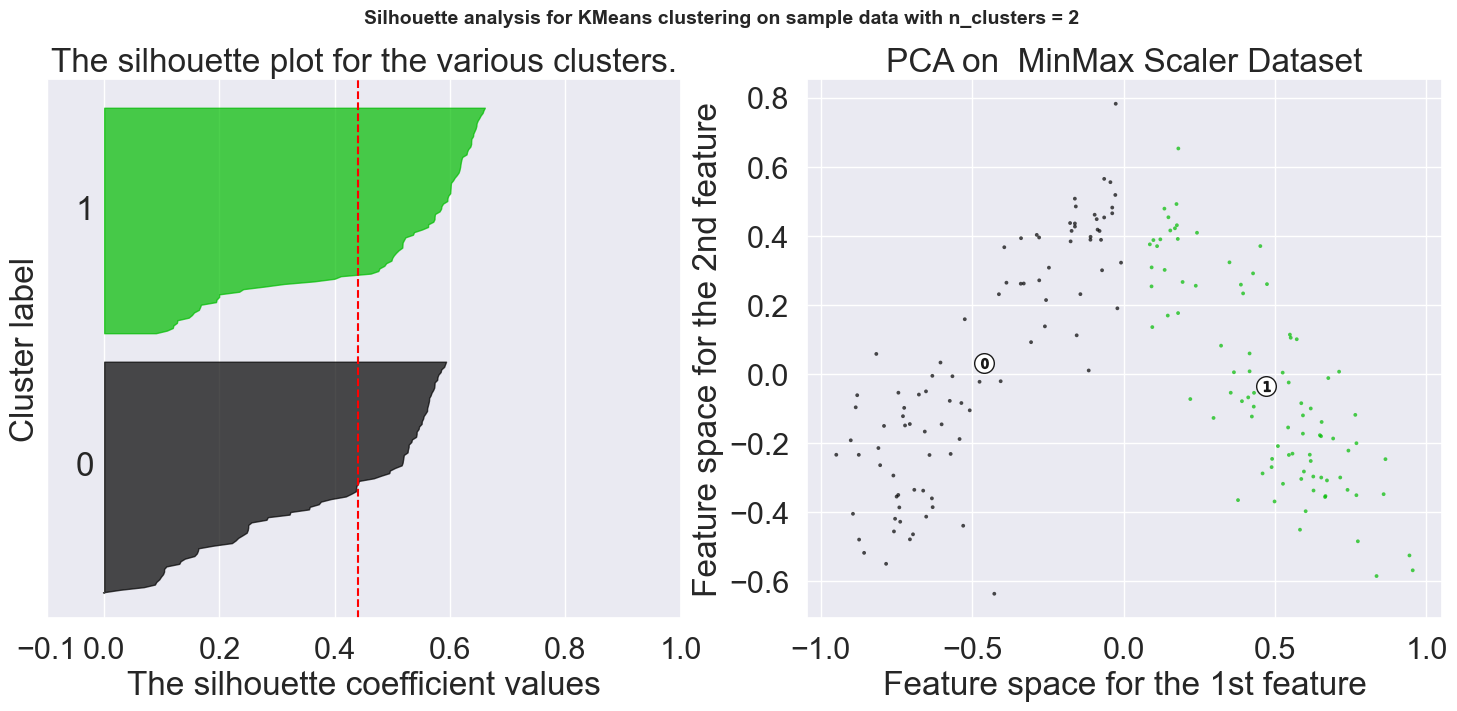

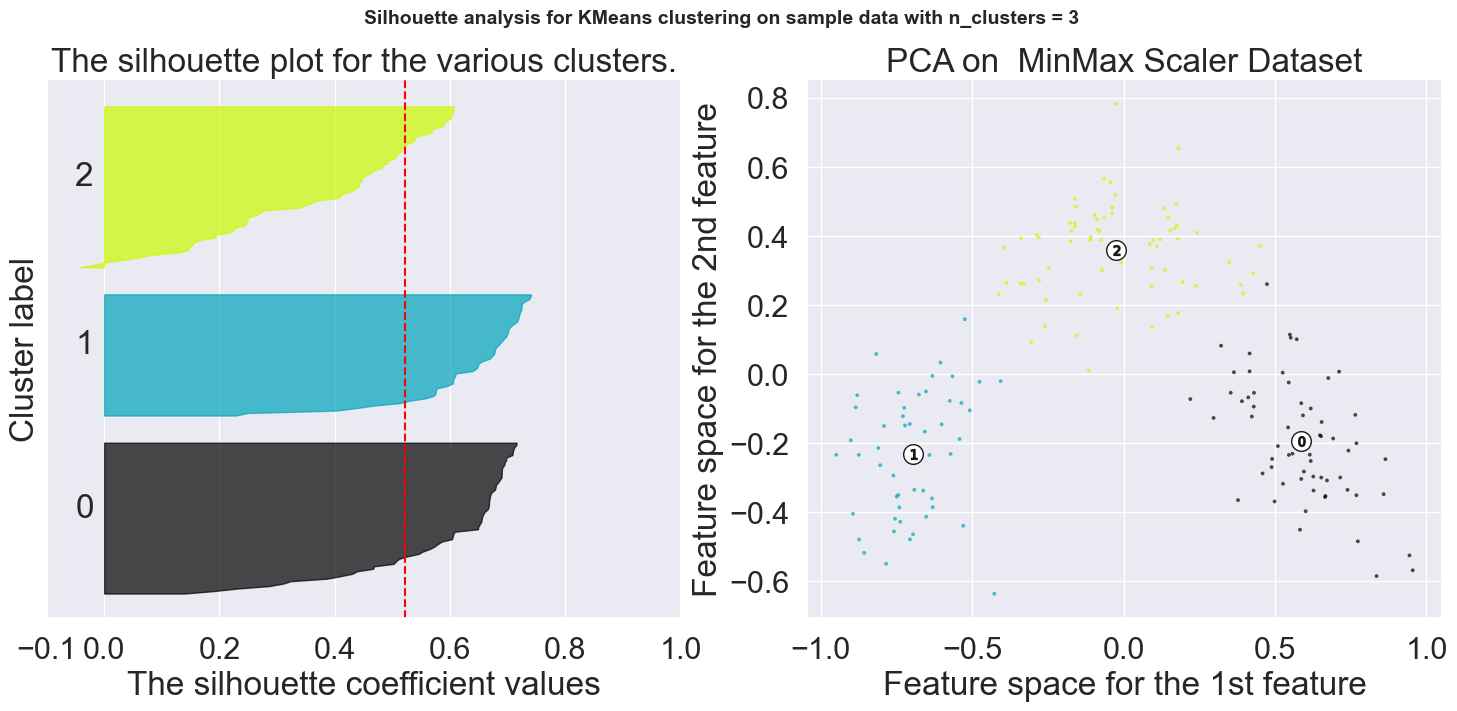

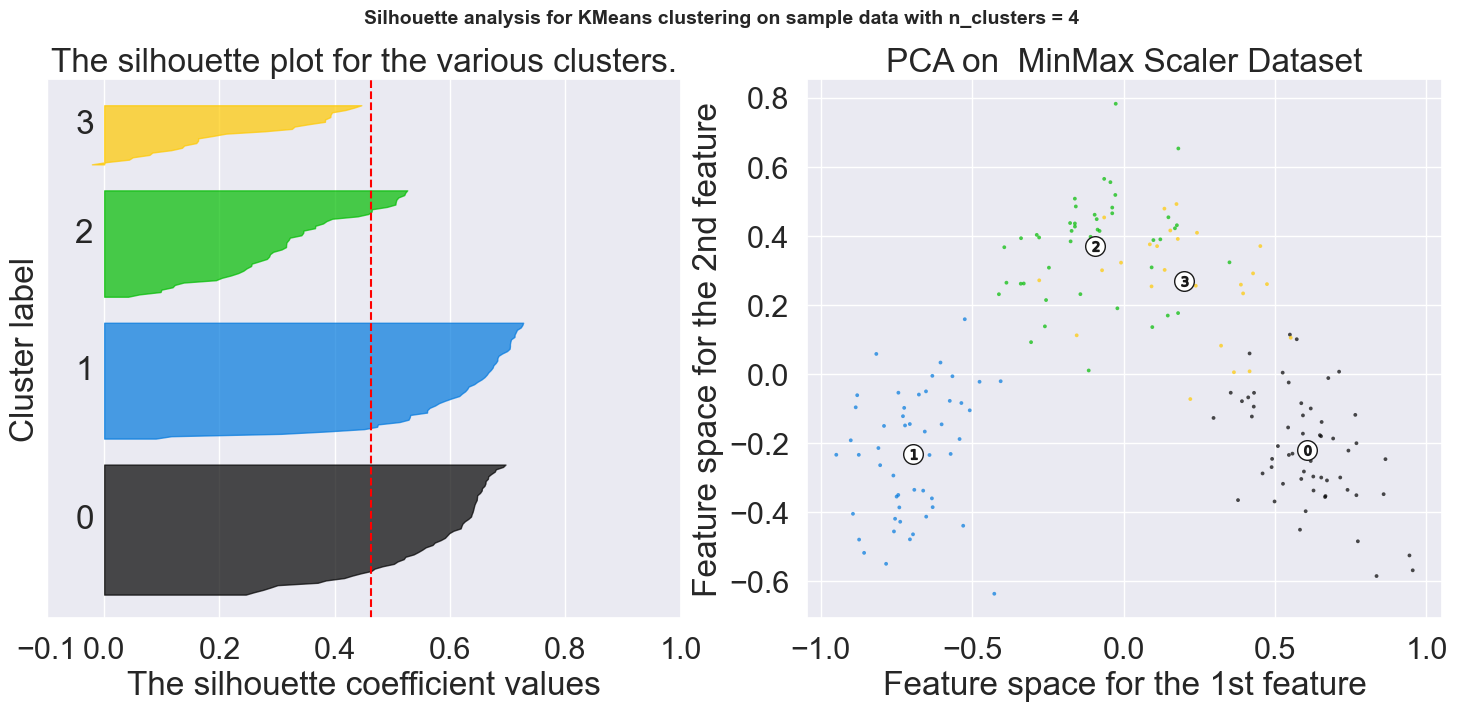

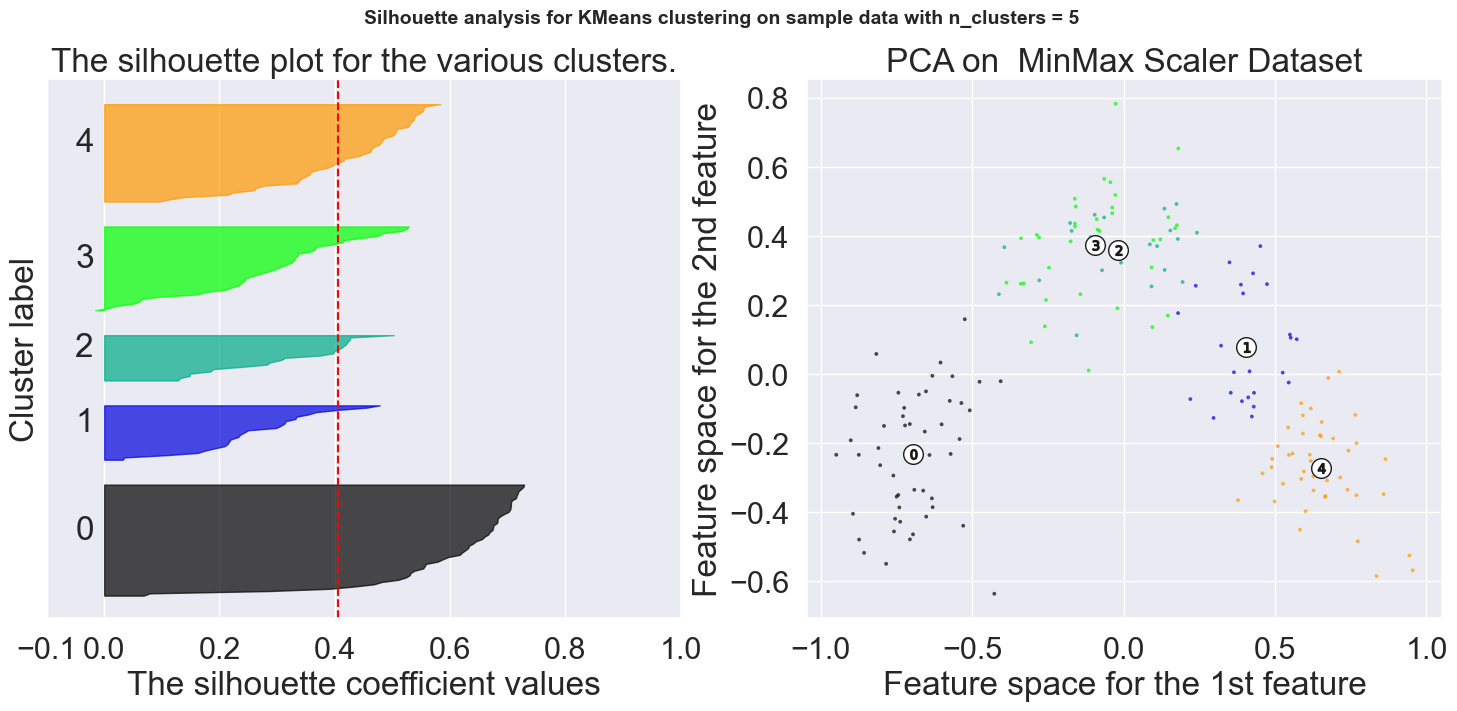

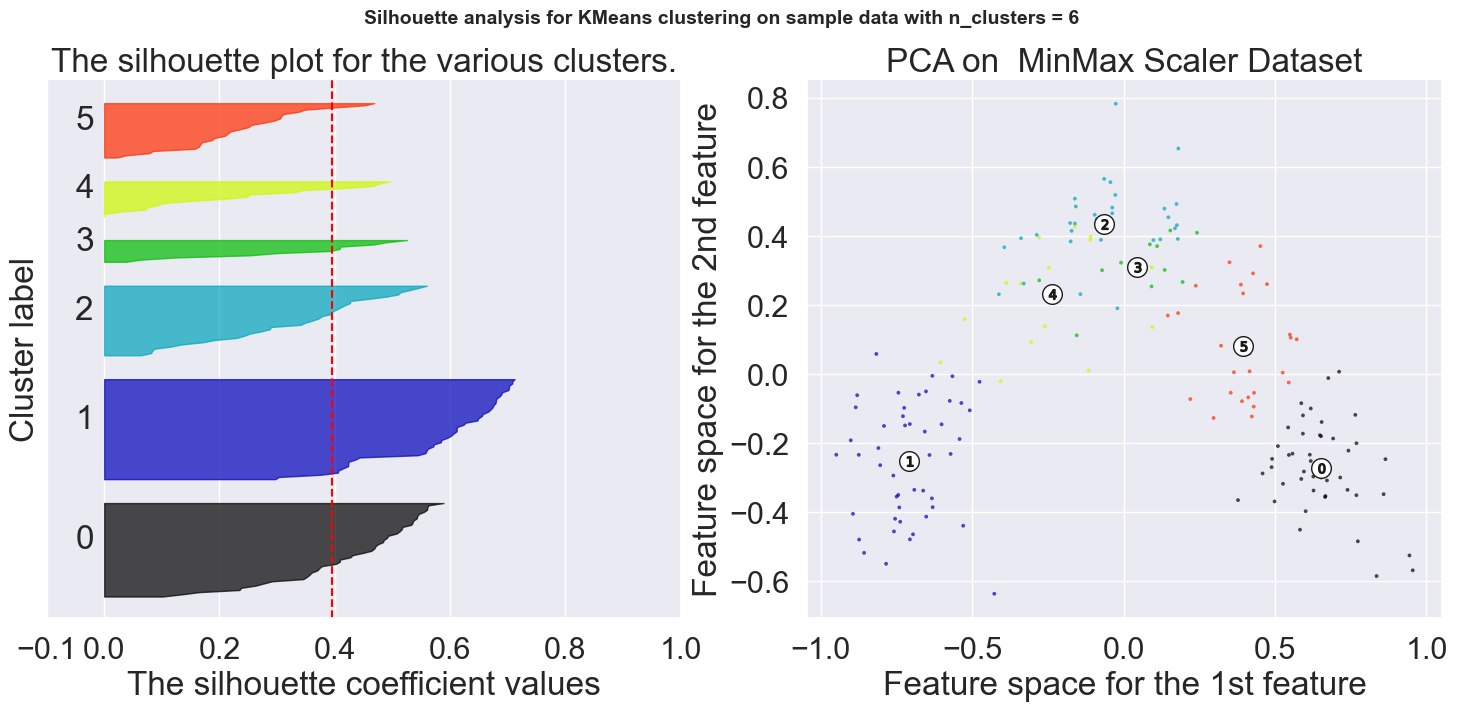

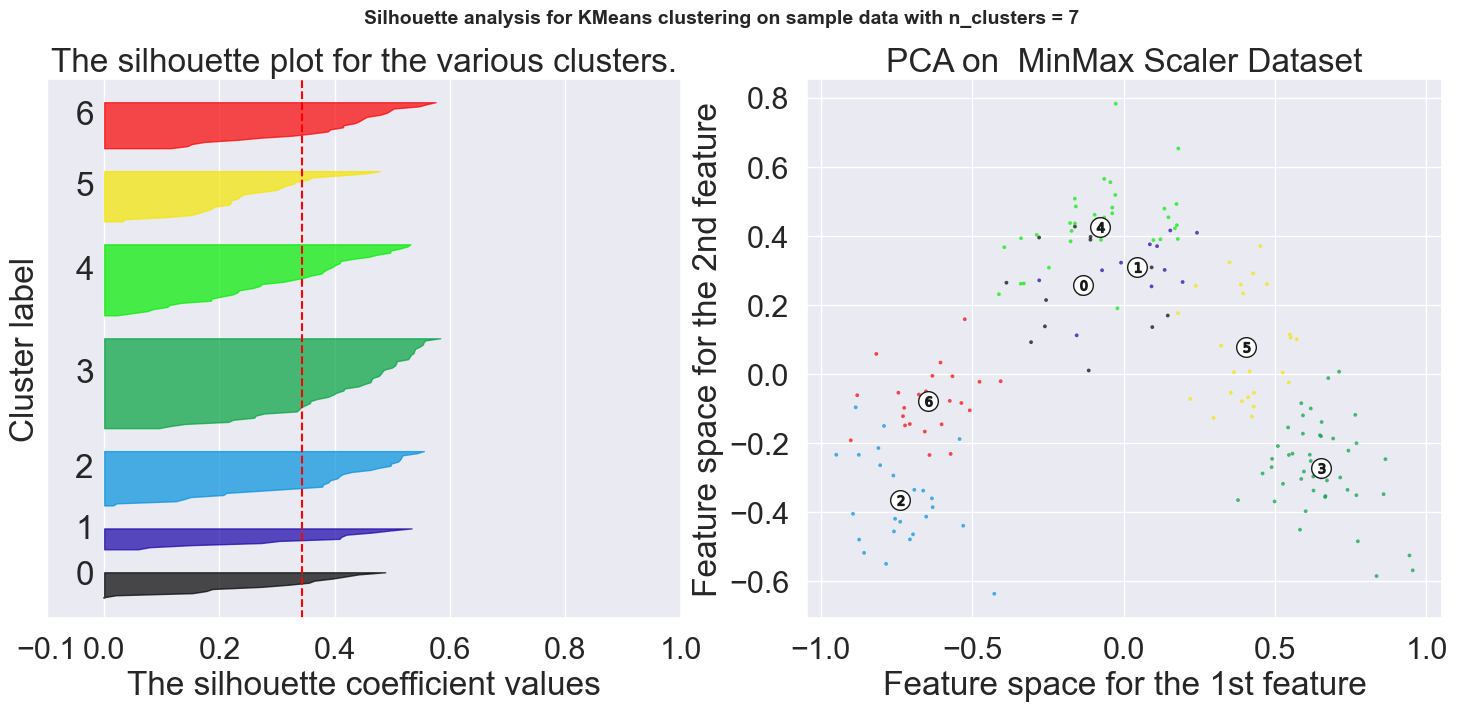

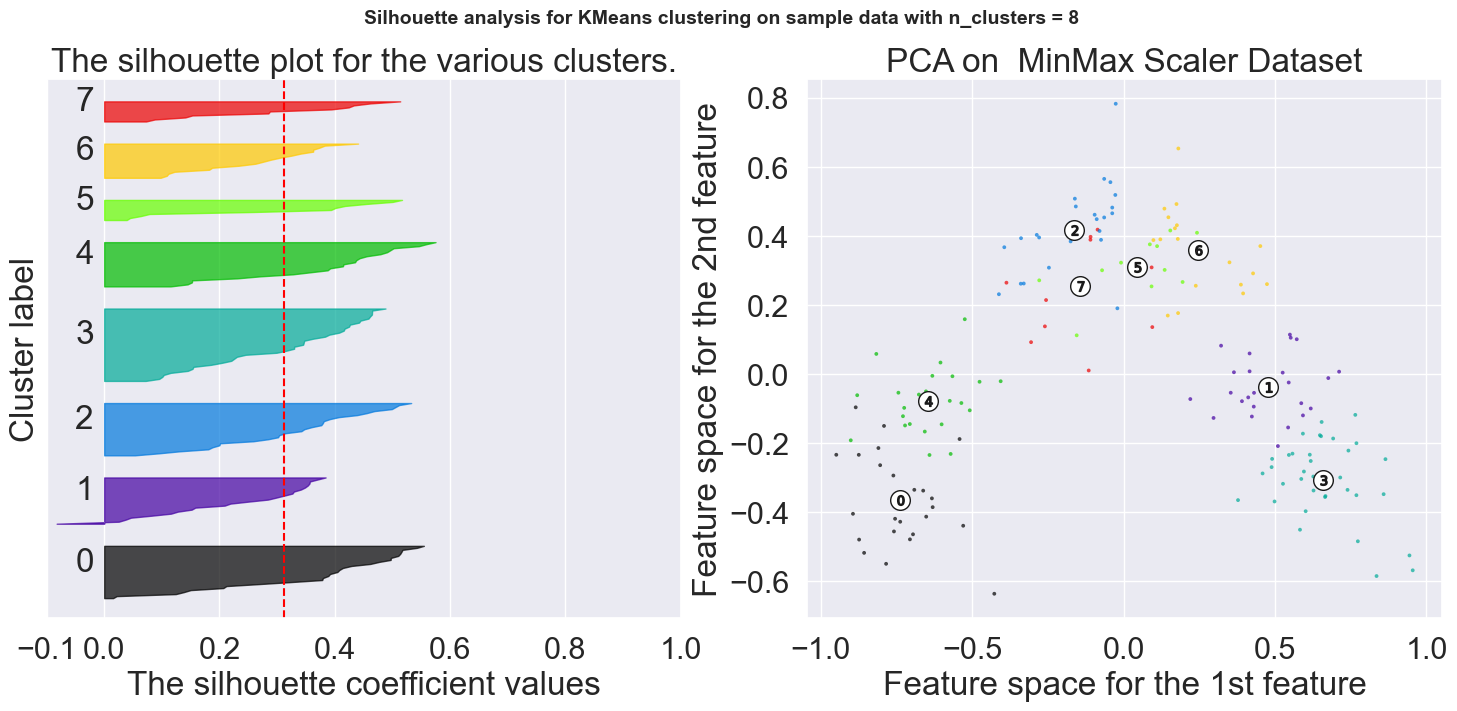

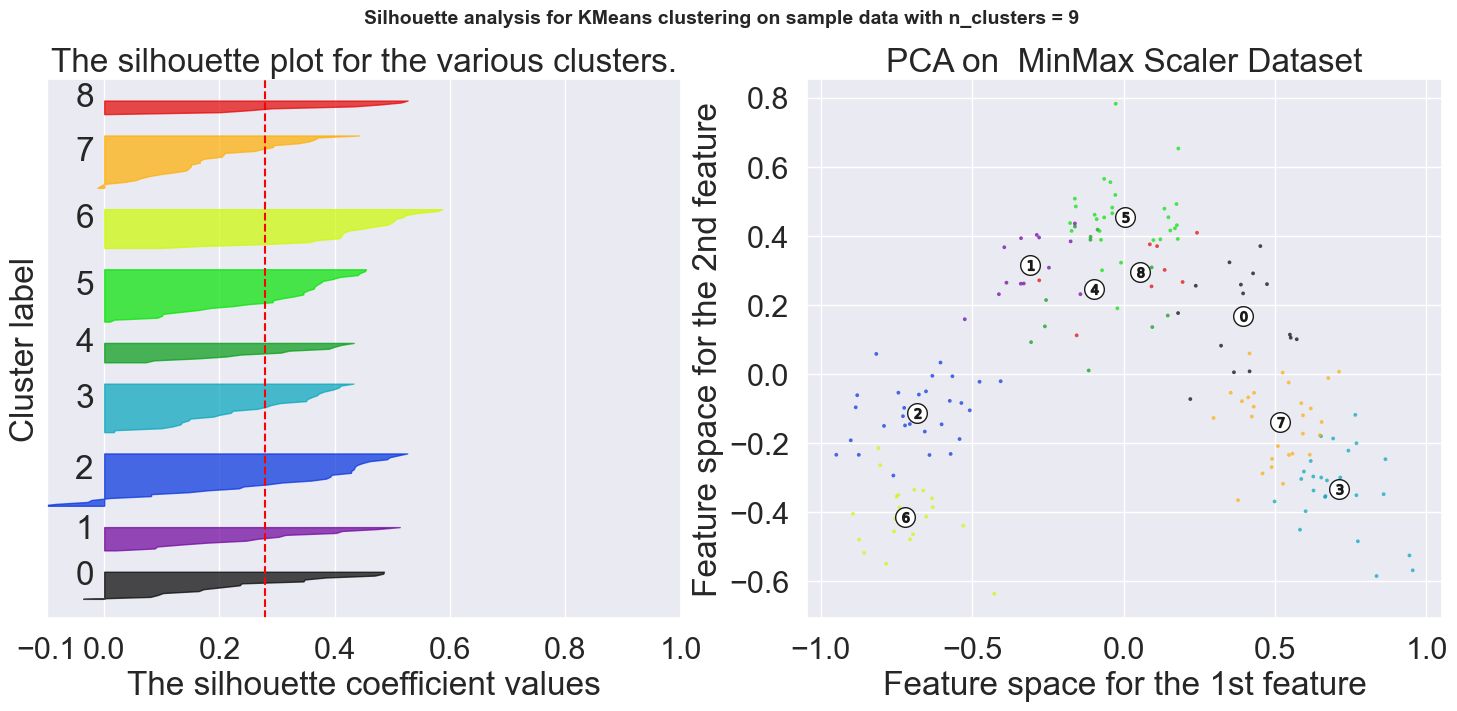

In [158]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_minmax_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_minmax_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(pca_minmax_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_minmax_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("PCA on  MinMax Scaler Dataset")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

According the the silhouette score of:<br>

1.The PCA on MinMax Scaler Applied data, the ideal number of clusters is 3, with a score higher than other options, of 0.52, but if you notice the number of cluster 4 has also the best variation within cluster and between cluster with zero to no values going towards -1 and no overlapping in cluster segregation than the consecutive rest<br>

2.If we check silhouette score with PCA on Normalize data kmeans model 0.52>0.48 than of PCA on Standard Scaler Dataset.<br>

3.Best score always close to +1.

In [160]:
#Build KMeans Cluster algorithm using K=3 and PCA on MinMaxScaler Applied Dataset

In [161]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_minmax_df)
y_predict_kmeans.shape

(178,)

In [162]:
# these are nothing but cluster labels...
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [163]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [1]:
# cluster centres associated with each lables
model_kmeans.cluster_centers_   

NameError: name 'model_kmeans' is not defined

In [165]:
model_kmeans.inertia_

18.717061925694445

In [166]:
#Assign clusters to the data set
df['Kmeans_label'] = model_kmeans.labels_                     m      

In [167]:
# Group data by Clusters (K=3)
df.groupby('Kmeans_label').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                   mean      mean      mean       mean        mean      mean   
Kmeans_label                                                                   
0             13.144000  3.346200  2.425600  21.330000   98.640000  1.677200   
1             12.233333  1.905000  2.251212  20.218182   93.469697  2.247273   
2             13.701774  1.981129  2.441613  17.245161  107.306452  2.844355   

             Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                   mean          mean            mean      mean      mean   
Kmeans_label                                                                
0              0.807000      0.450400        1.156400  7.264400  0.686200   
1              2.069091      0.363485        1.602727  3.025758  1.058576   
2              2.972581      0.288710        1.928710  5.442258  1.068548   

              Dilution      Proline          ID  
                  mean         mean        mean  
Kmeans_label                                     
0             1.698800   622.440000  152.380000  
1             2.792727   508.696970   95.530303  
2             3.155161  1100.822581   32.370968

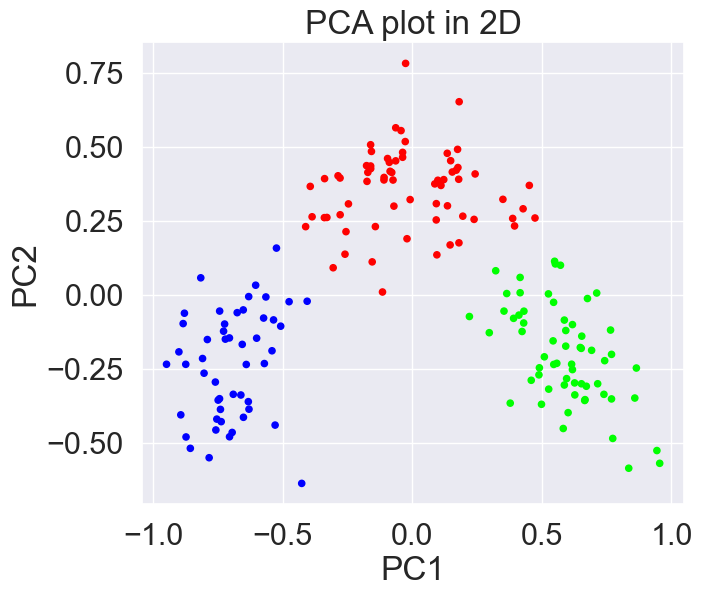

In [171]:
# Figure size
plt.figure(figsize=(7,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Kmeans_label'], cmap="brg", s=20)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

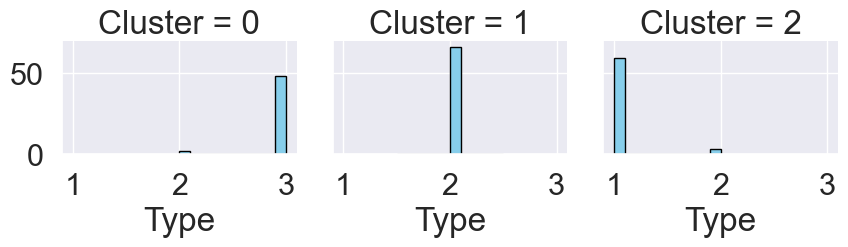

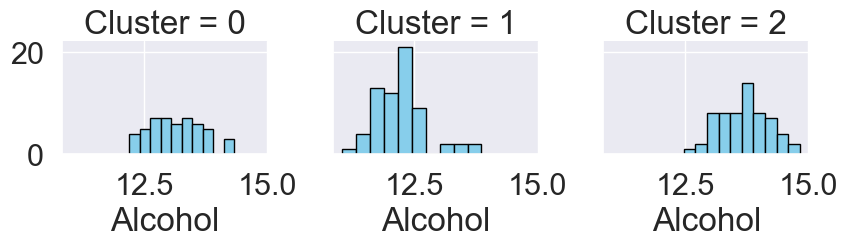

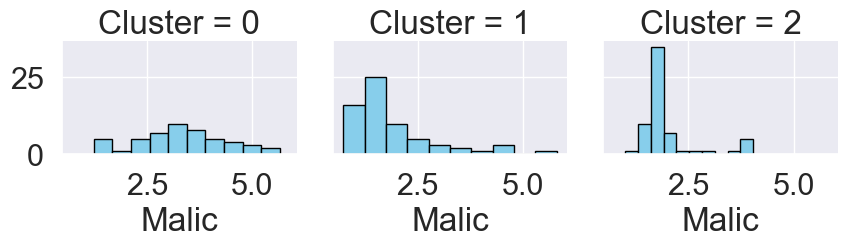

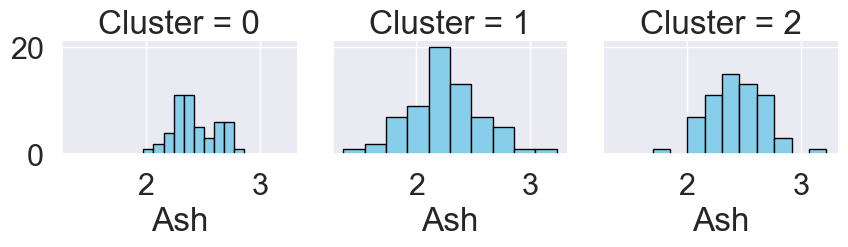

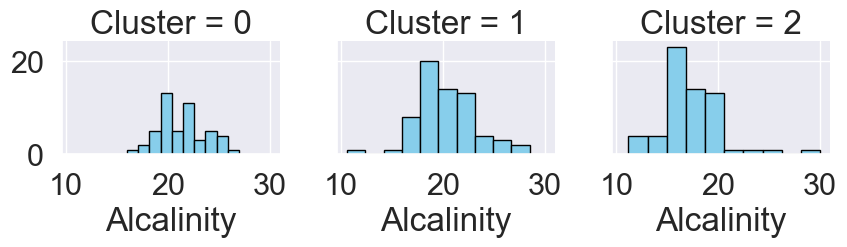

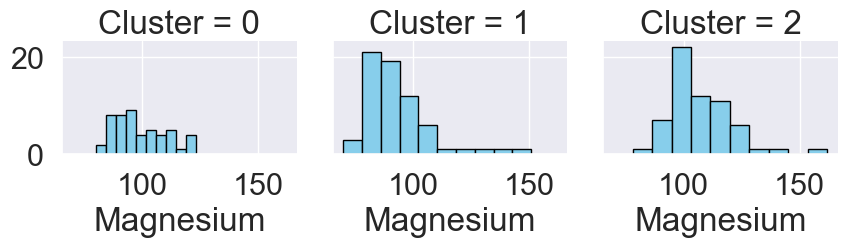

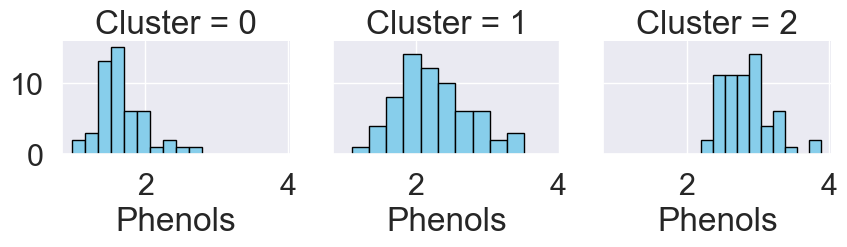

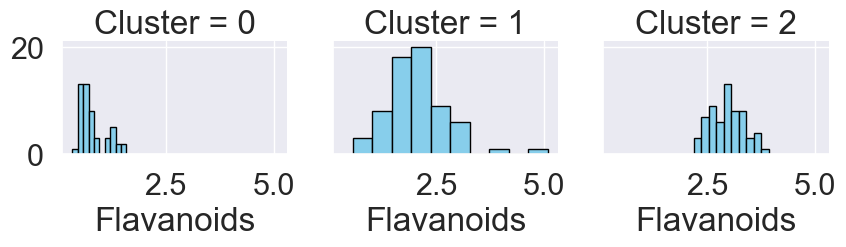

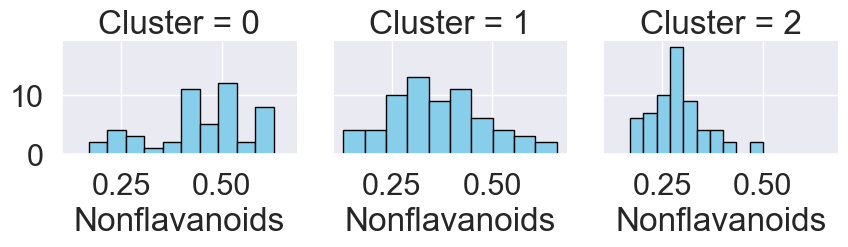

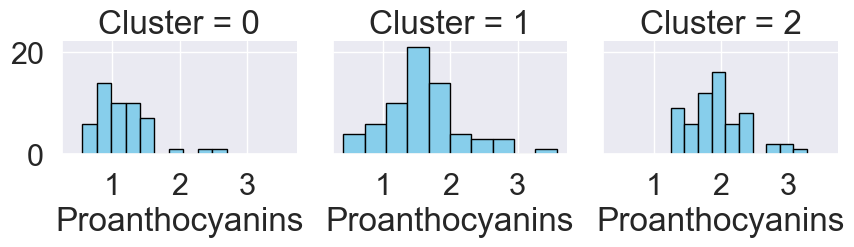

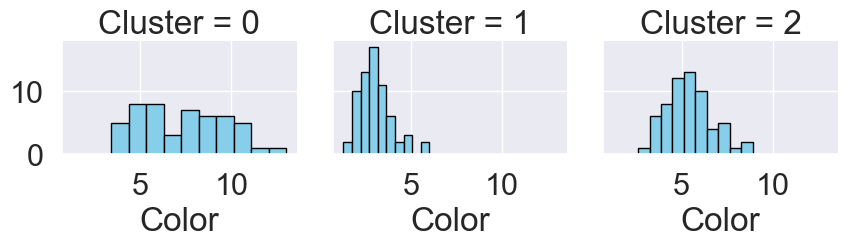

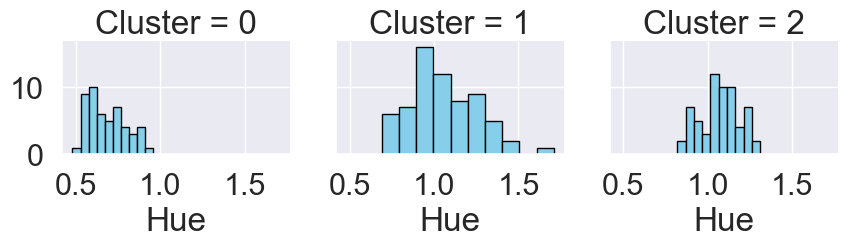

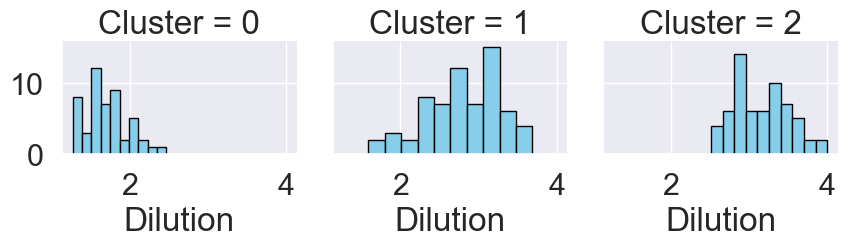

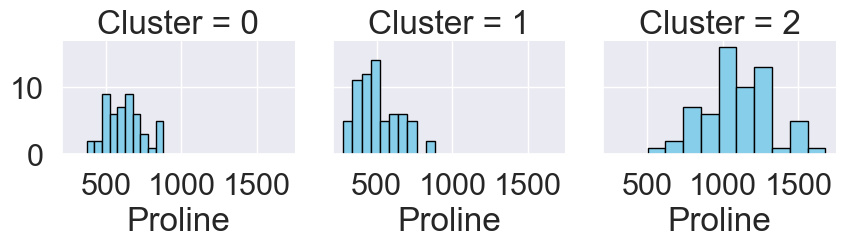

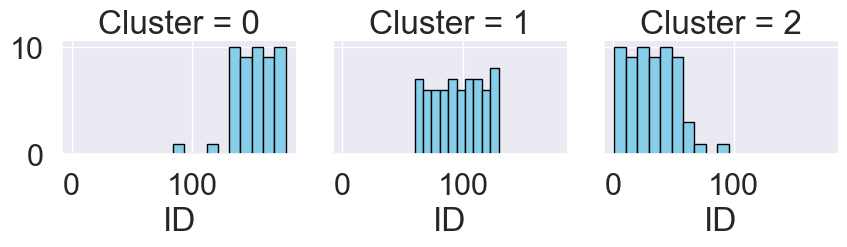

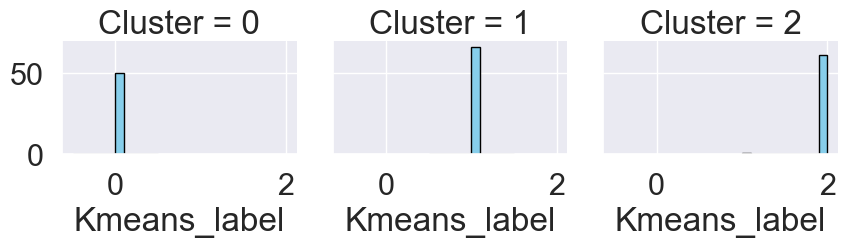

In [172]:
df1 = data.copy()
df1['Cluster'] = model_kmeans.labels_

aux=df1.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(df1, col="Cluster")
    grid.map(plt.hist, cluster, color="skyblue", lw=1, edgecolor="black")

In [173]:
# Sorting elements based on cluster label assigned and taking average for insights.
cluster1 = pd.DataFrame(df1.loc[df1.Cluster==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.Cluster==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(df1.loc[df1.Cluster==2].mean(),columns= ['Cluster2_avg'])

In [174]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

Cluster1_avg  Cluster2_avg  Cluster2_avg
Type                   2.9600      2.000000      1.048387
Alcohol               13.1440     12.233333     13.701774
Malic                  3.3462      1.905000      1.981129
Ash                    2.4256      2.251212      2.441613
Alcalinity            21.3300     20.218182     17.245161
Magnesium             98.6400     93.469697    107.306452
Phenols                1.6772      2.247273      2.844355
Flavanoids             0.8070      2.069091      2.972581
Nonflavanoids          0.4504      0.363485      0.288710
Proanthocyanins        1.1564      1.602727      1.928710
Color                  7.2644      3.025758      5.442258
Hue                    0.6862      1.058576      1.068548
Dilution               1.6988      2.792727      3.155161
Proline              622.4400    508.696970   1100.822581
ID                   152.3800     95.530303     32.370968
Kmeans_label           0.0000      1.000000      1.983871
Cluster                0.0000      1.000000      2.000000

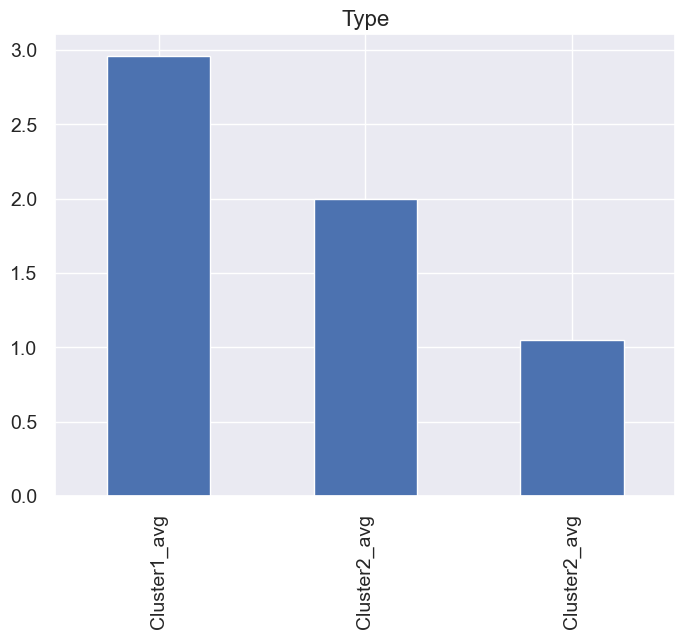

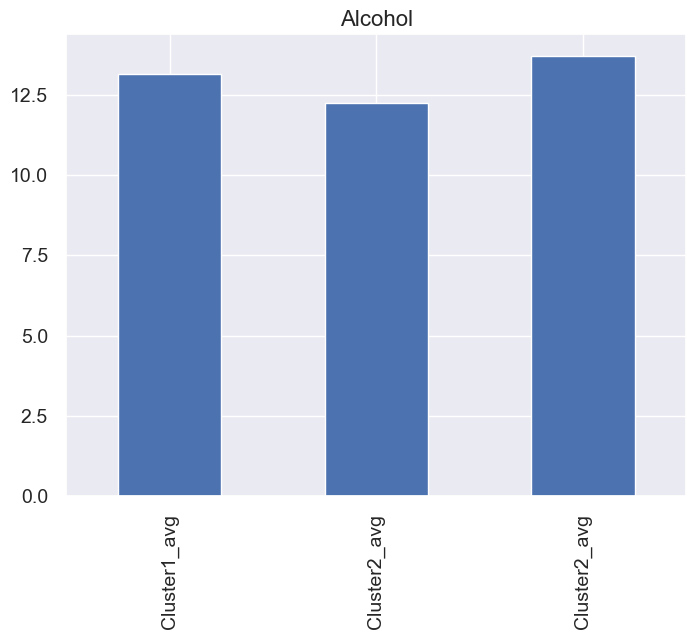

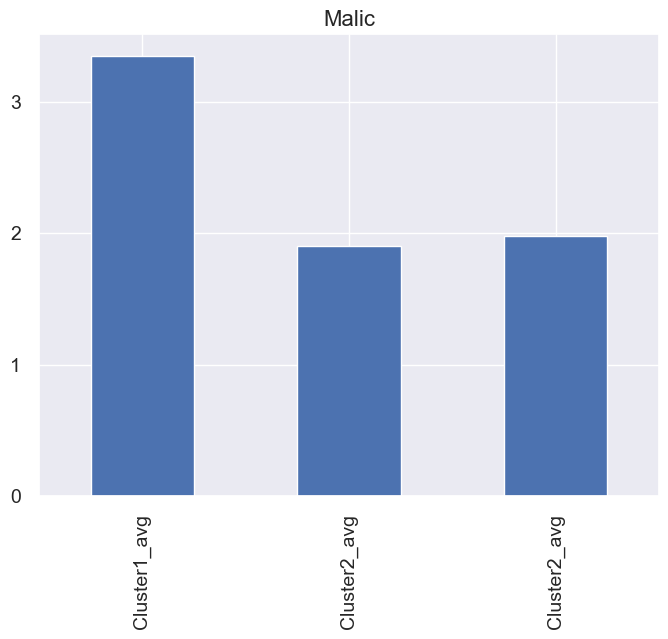

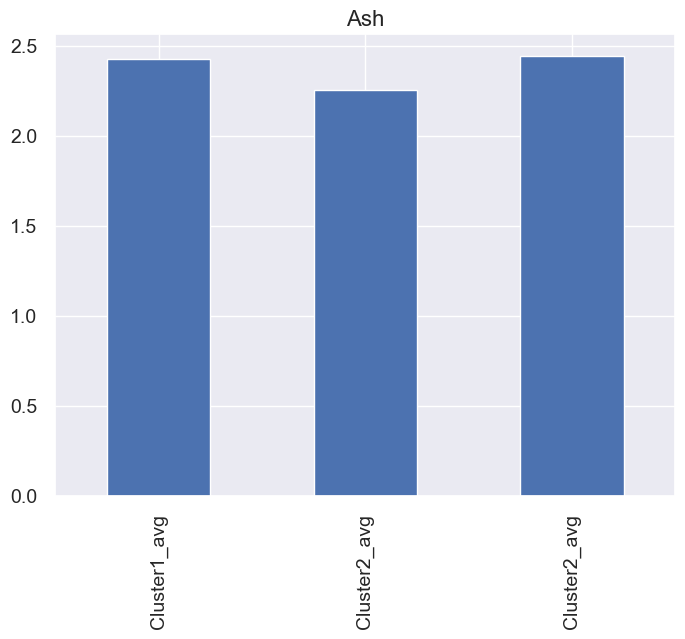

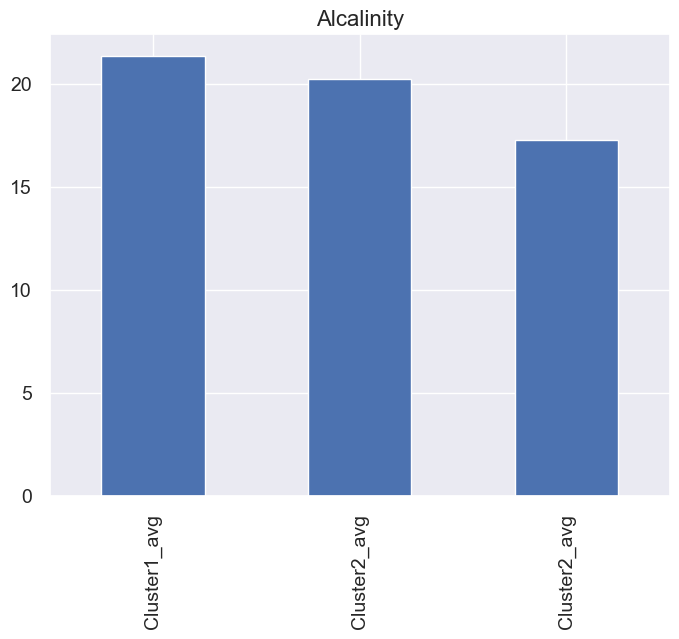

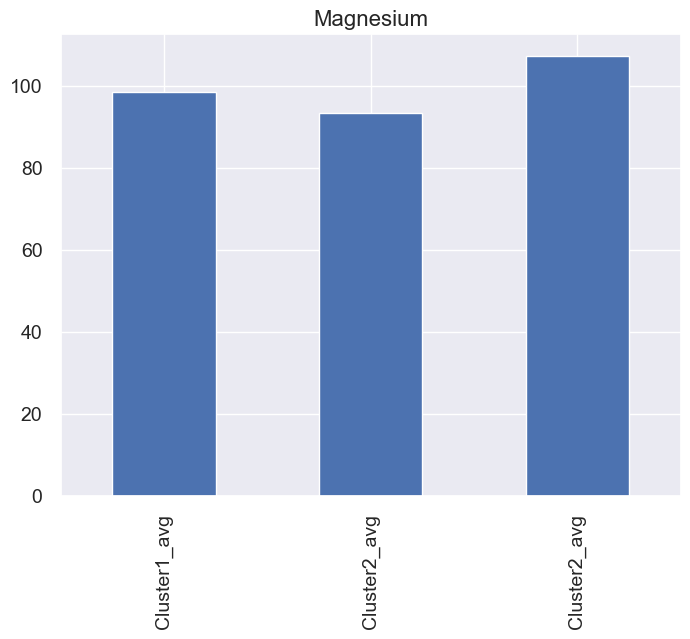

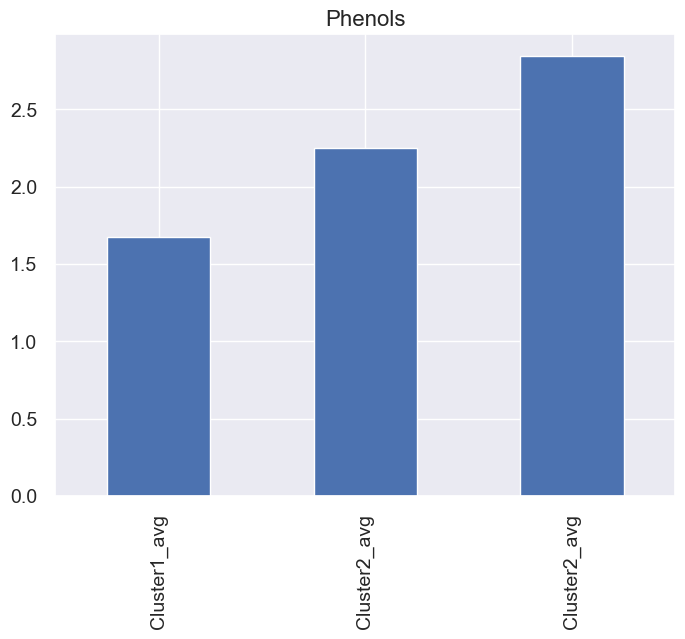

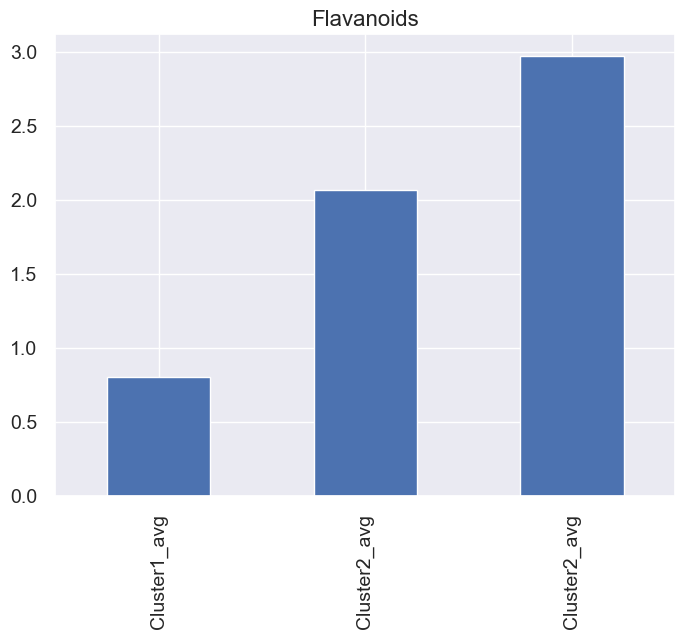

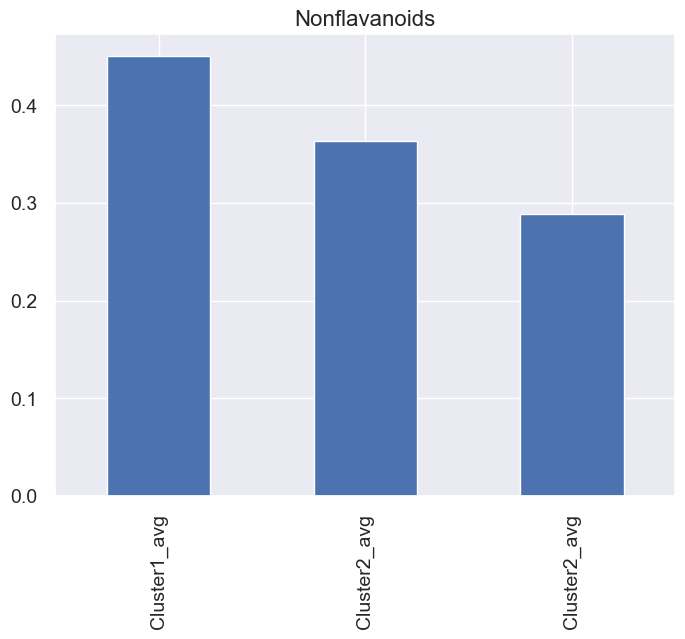

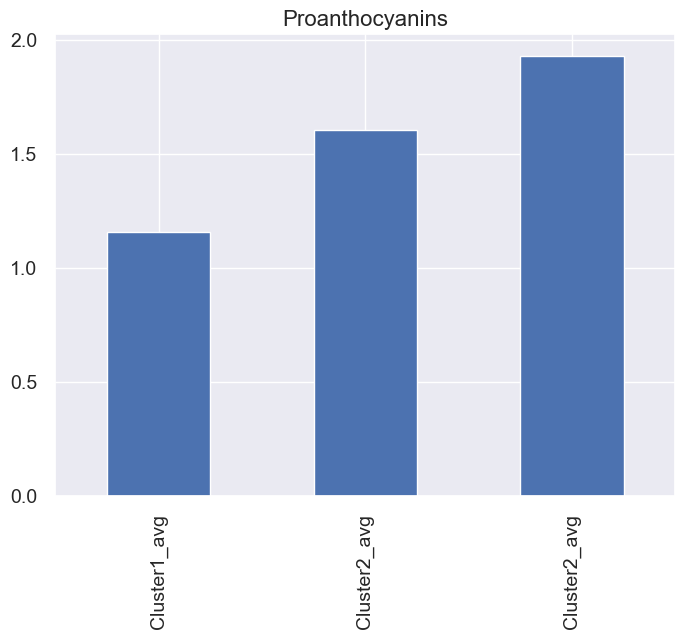

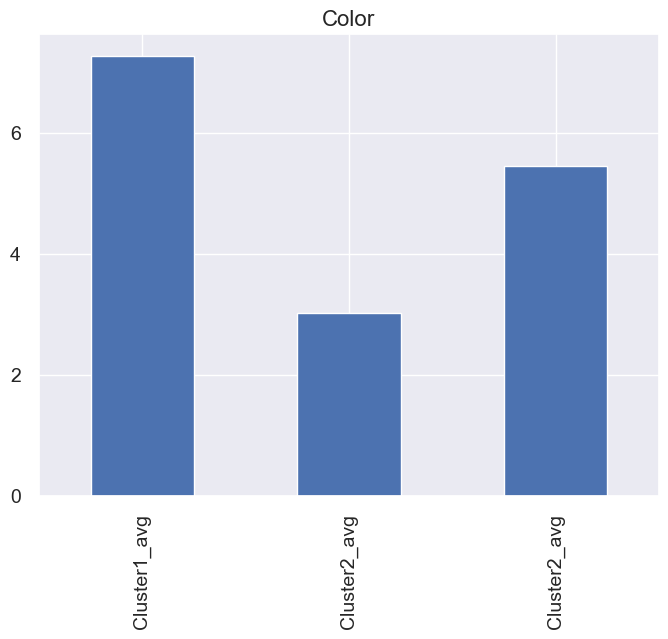

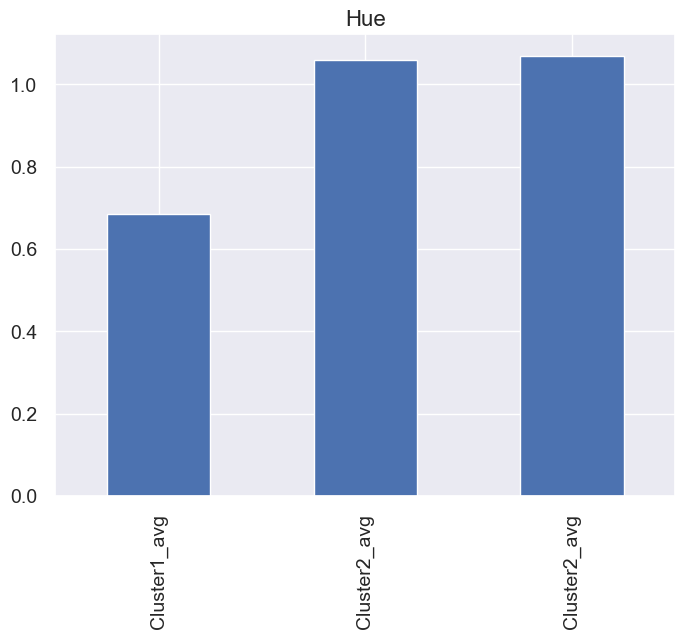

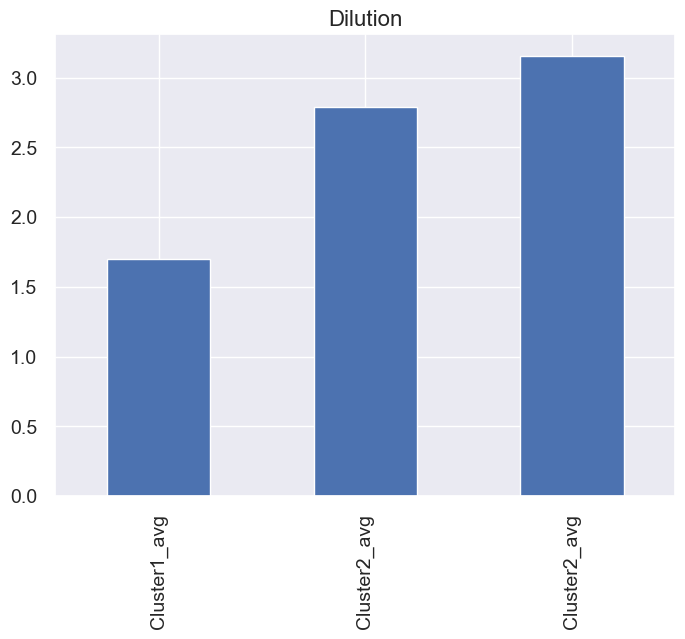

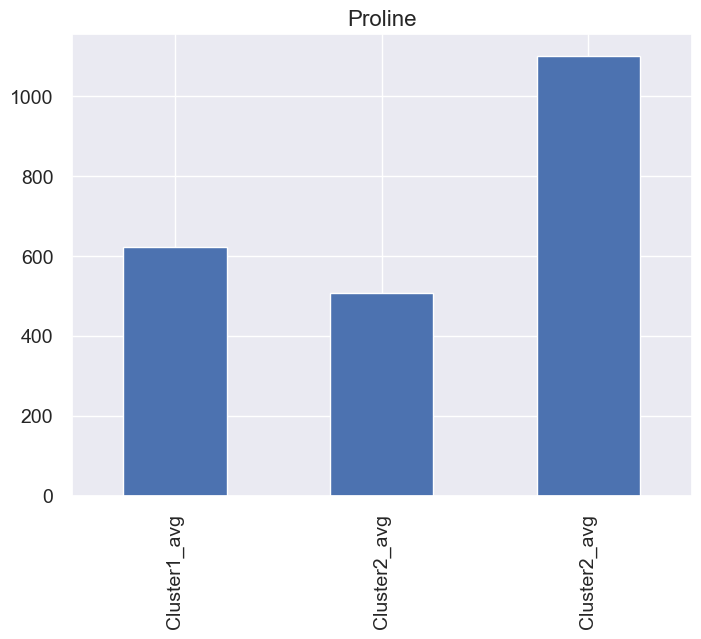

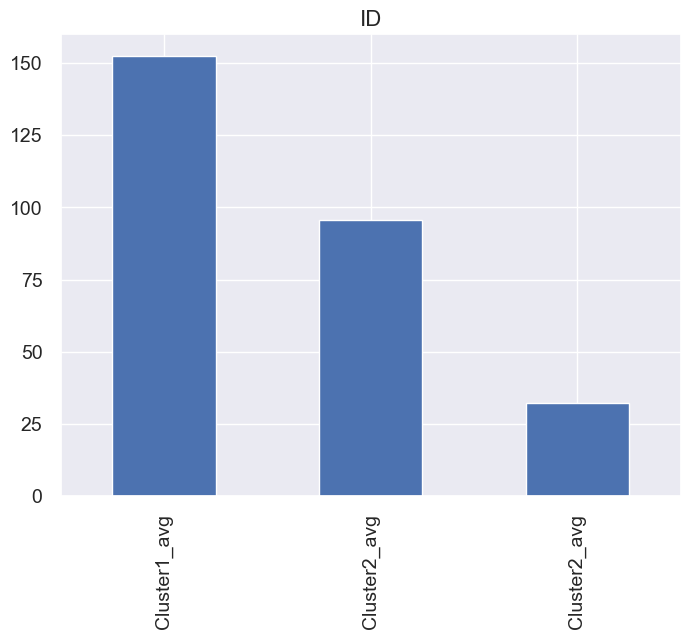

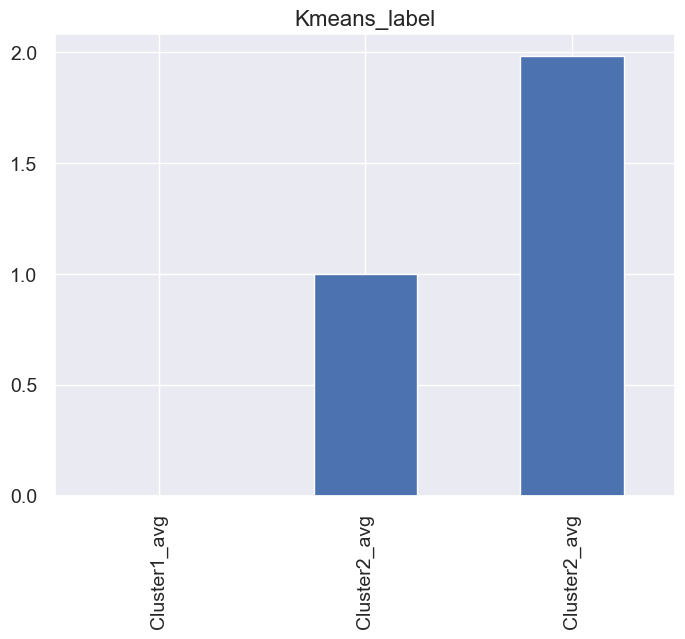

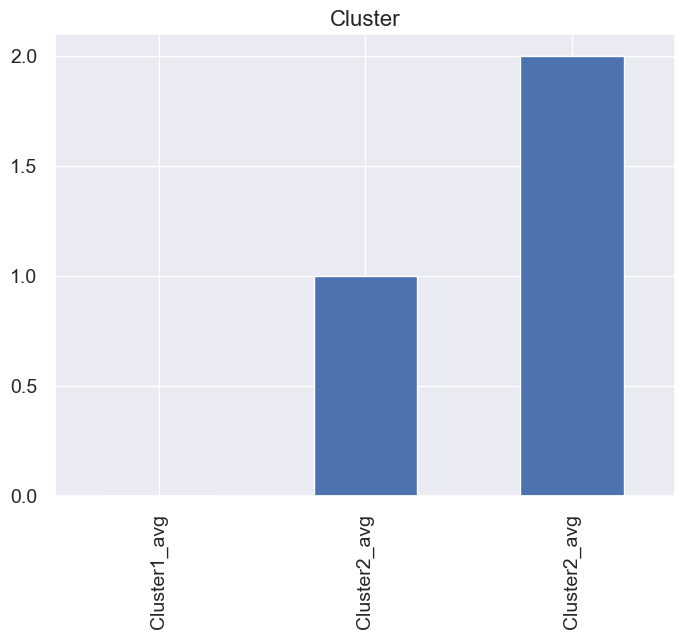

In [175]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

# t-SNE

In [180]:
from sklearn.manifold import TSNE

In [181]:
# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(minmax_df)

# Convert to data frame
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

# Shape and preview
print(tsne_df.shape)
tsne_df.head()

(178, 2)


tsne comp. 1  tsne comp. 2
0      8.917820     -9.030189
1      4.585262     -7.772508
2      5.476827    -13.244502
3      8.239104    -12.853917
4      2.237806    -10.729915

In [182]:
#t-SNE plot in 2D coloured by class
#Like PCA, t-SNE is an unsupervised algorithm, however we will use the same k-Means clusters from before to colour code the data points.

Text(0, 0.5, 'tsne component 2')

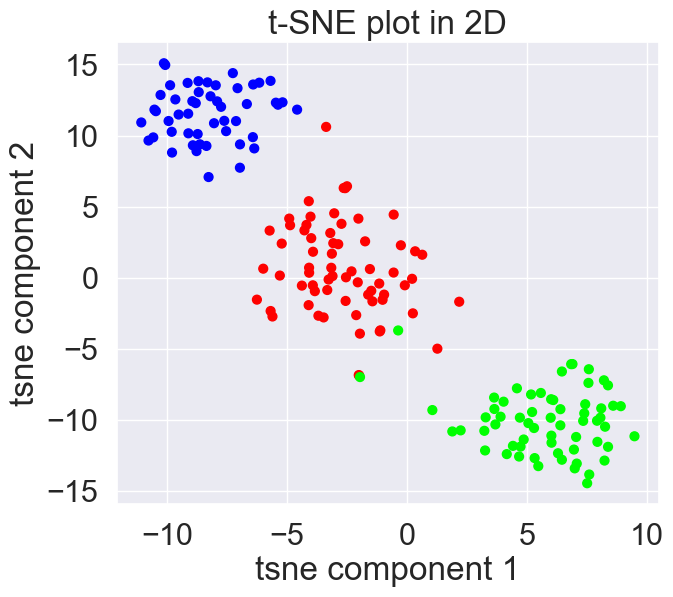

In [183]:
plt.figure(figsize=(7,6))
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=df['Kmeans_label'], cmap="brg", s=40)
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

# Hierarchical Clustering Algorithm

In [185]:
import scipy.cluster.hierarchy as sch

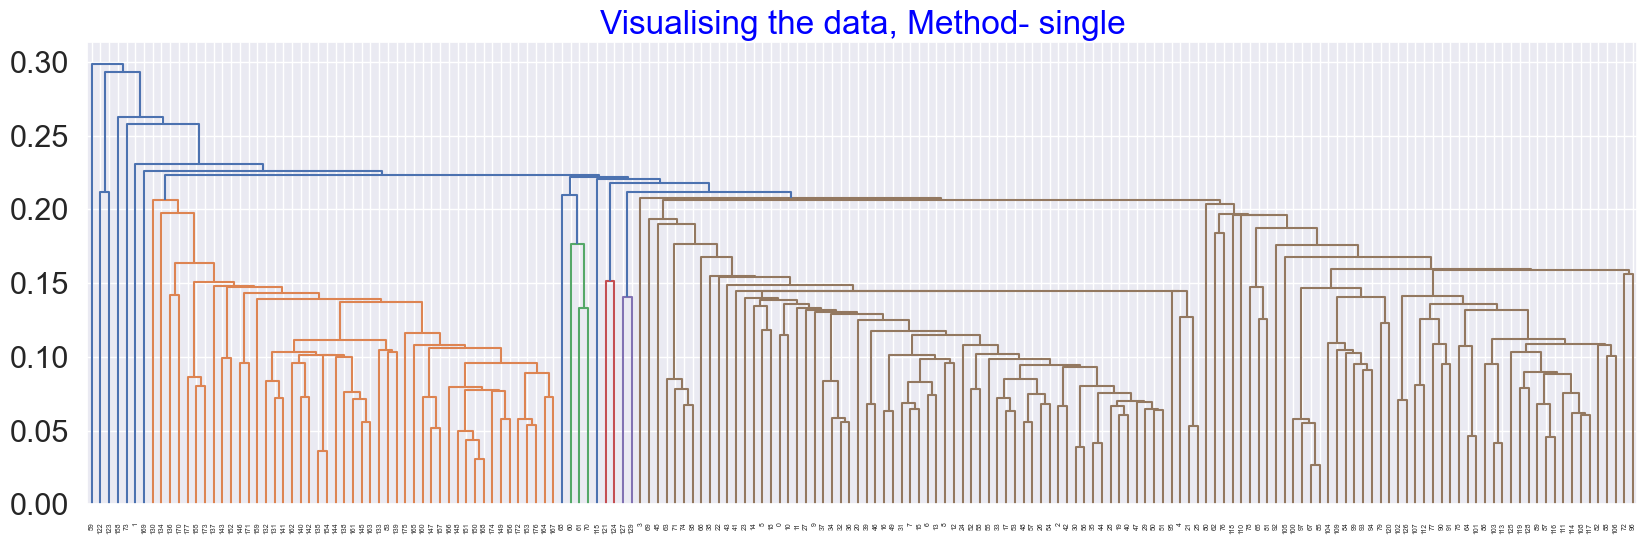

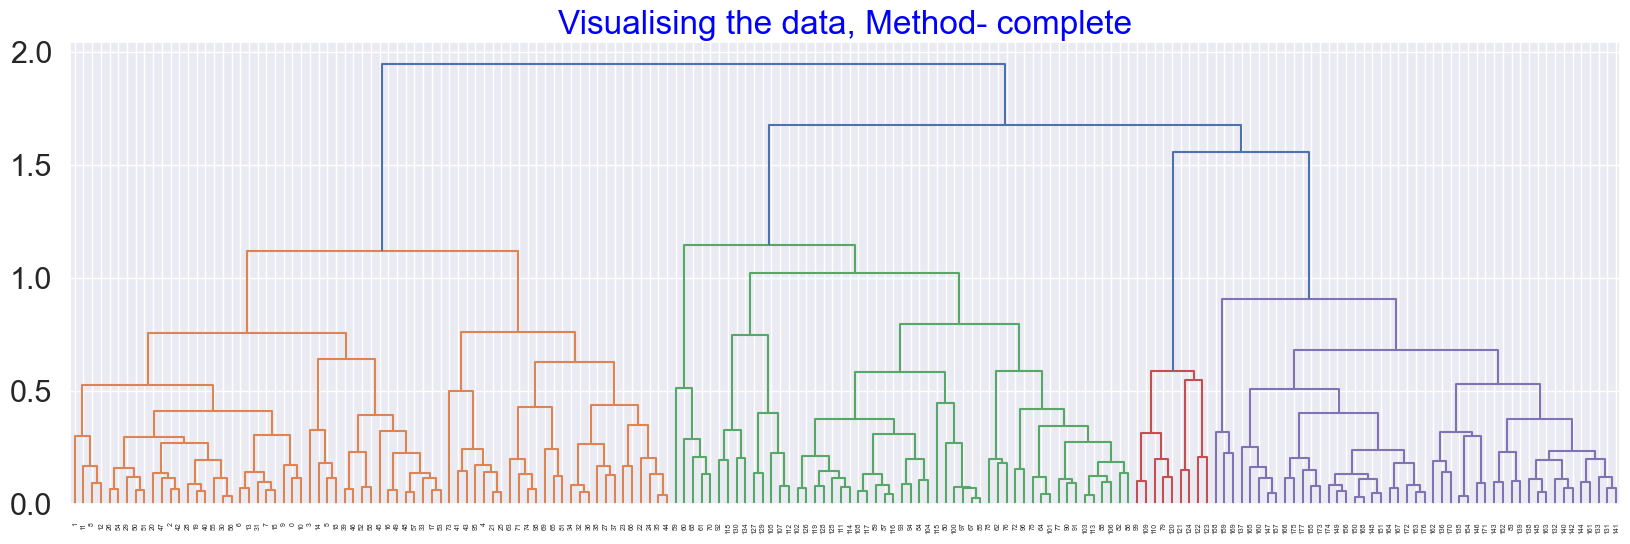

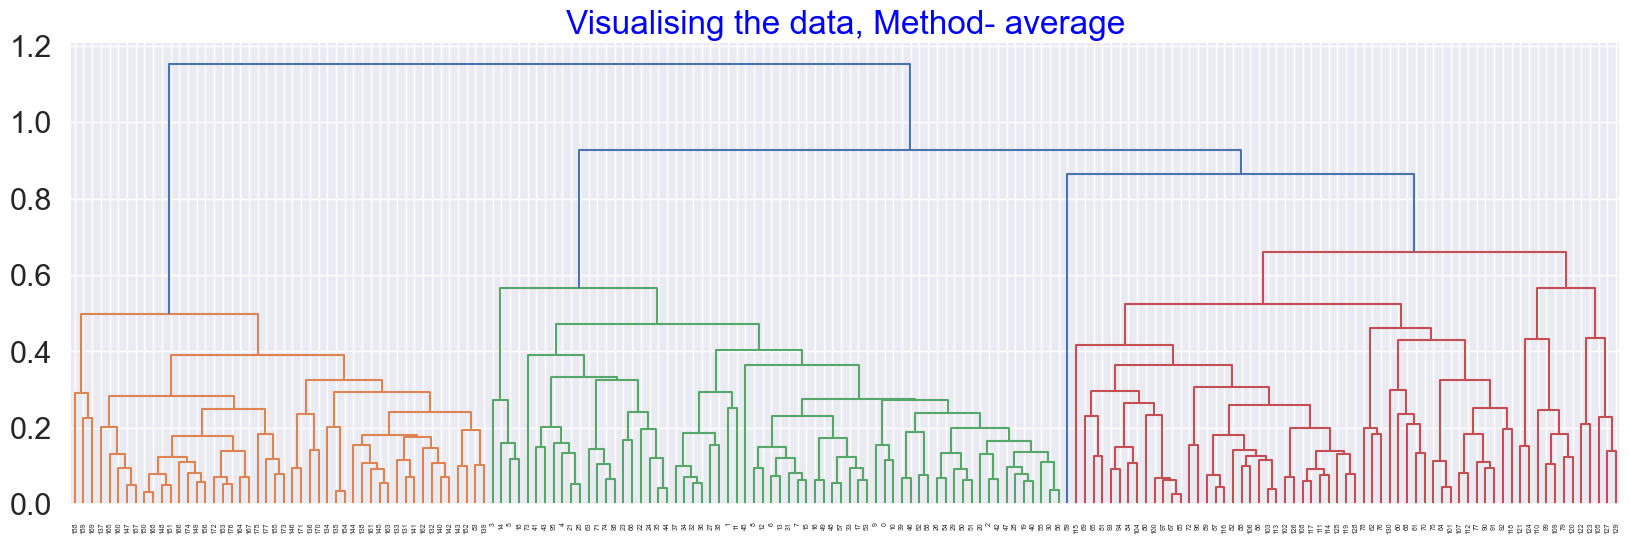

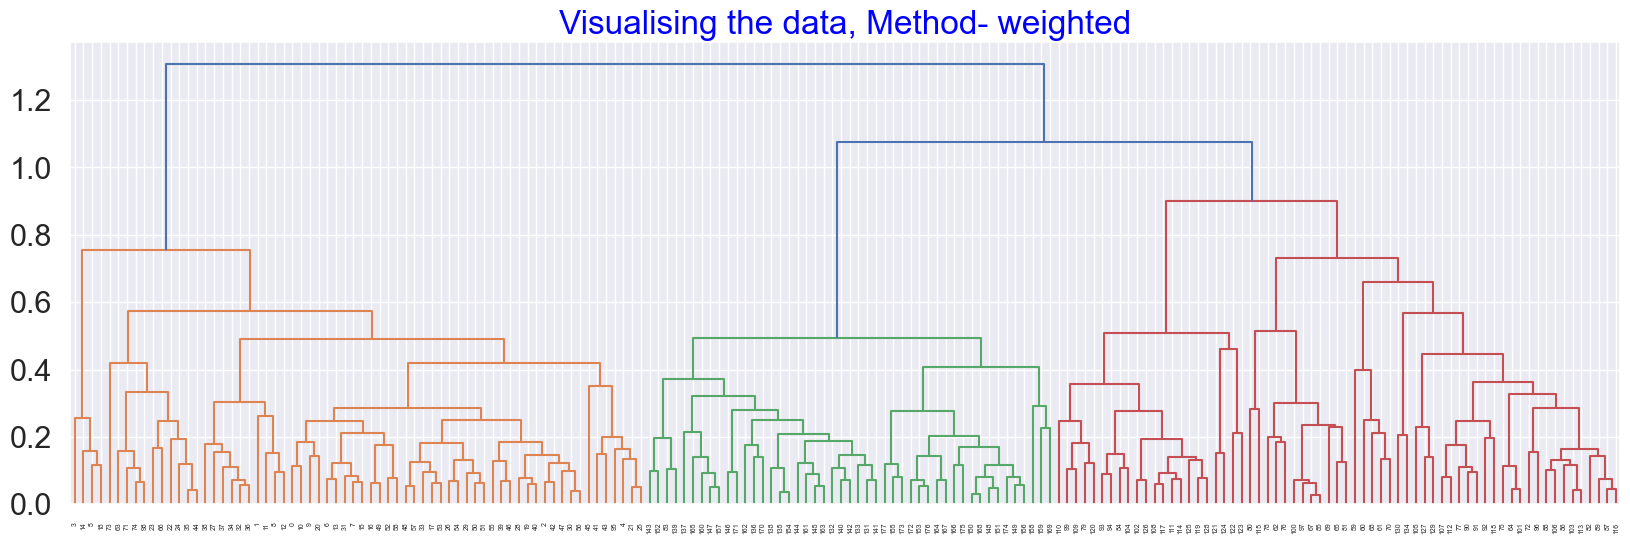

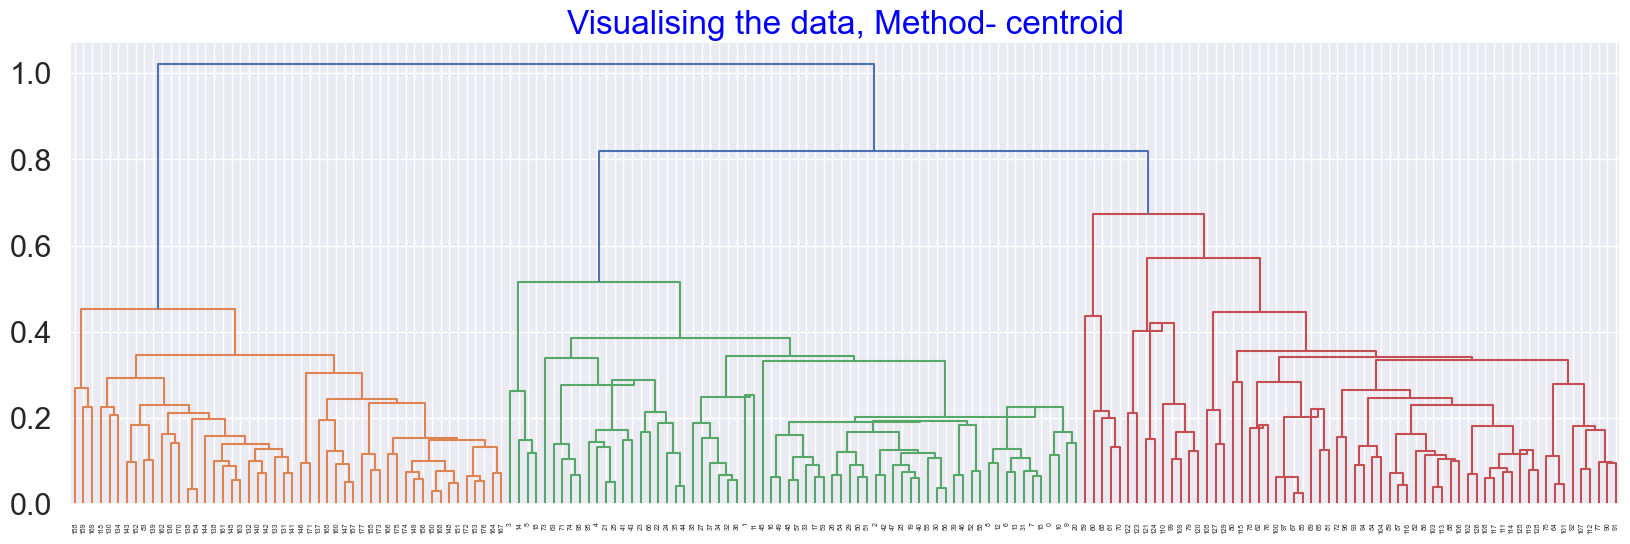

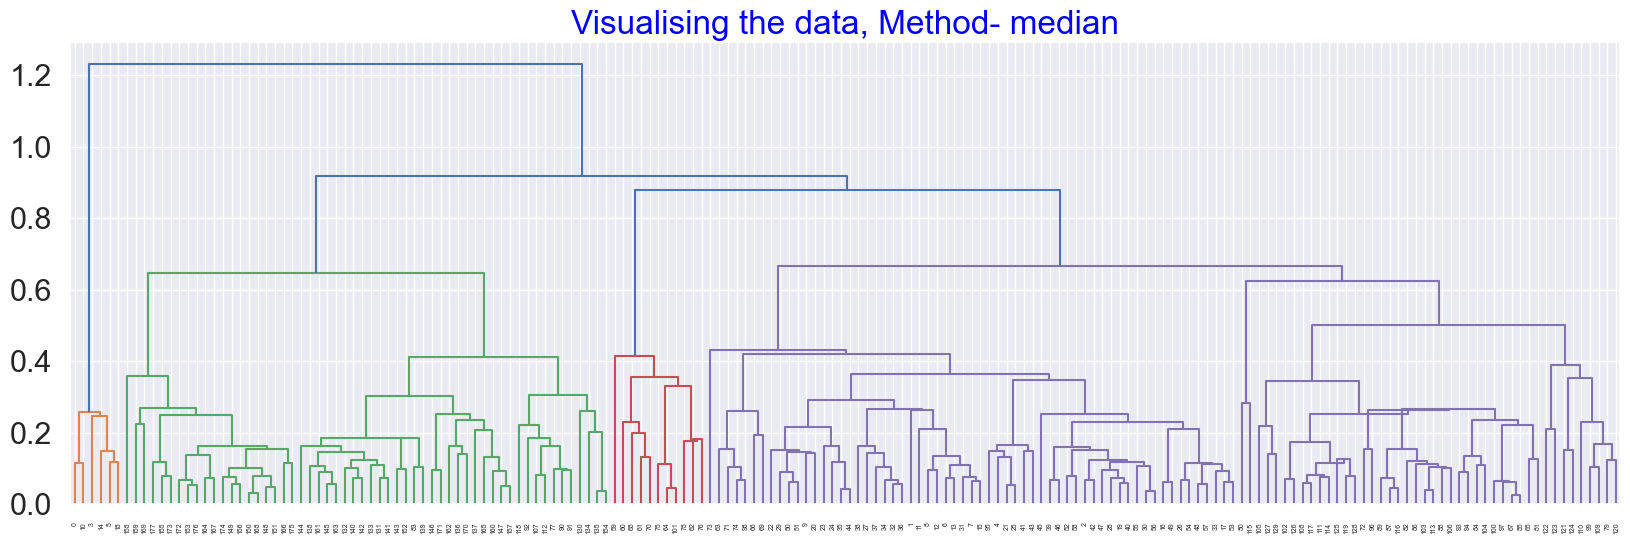

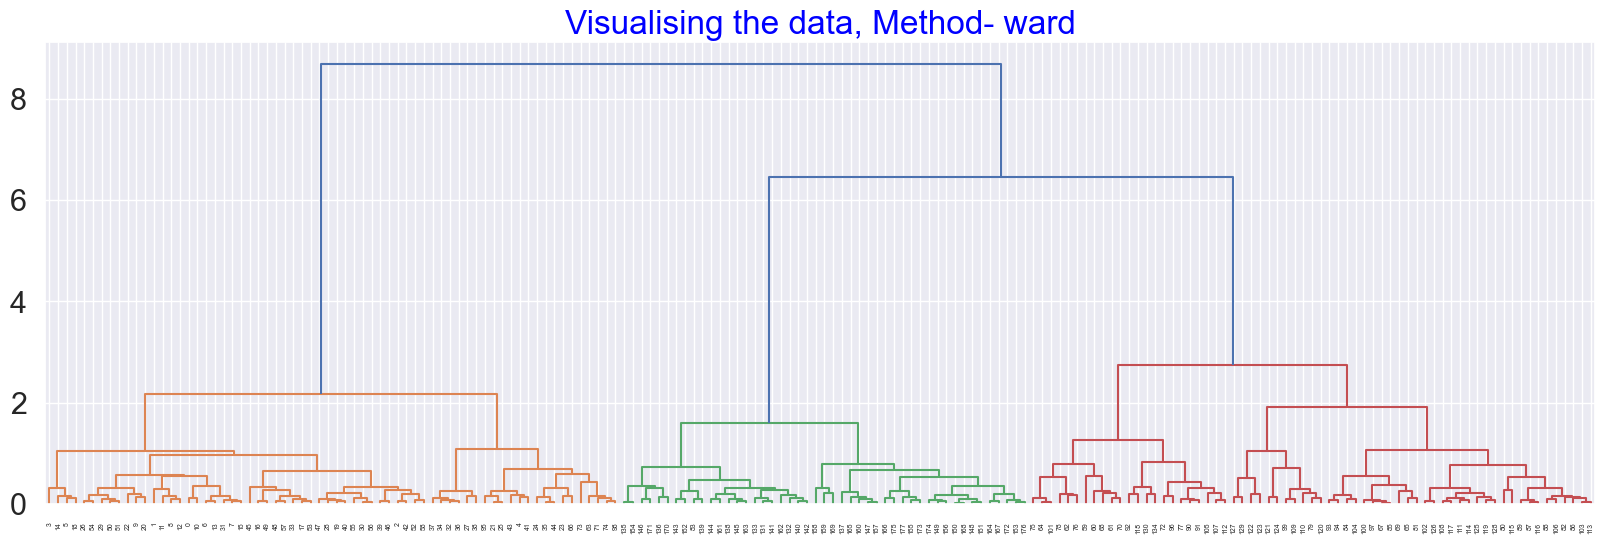

In [186]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_minmax_df, method = methods,optimal_ordering=False))

In [187]:
#Silhouette Score method for PCA MinMax Scaled Data

In [188]:
#Applying Different Linkages using Euclidean Method for distance Calculation

In [190]:
from sklearn.cluster import AgglomerativeClustering

In [191]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_minmax_df)
        silhouette_score1 = sil(pca_minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4436935150655509
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4448273929121039
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4598802263684806
For n_clusters = 2 The average silhouette_score with linkage- single : 0.1934738767787815

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5124784618933621
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.45525090342803287
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5163908228025498
For n_clusters = 3 The average silhouette_score with linkage- single : -0.004466488818666442

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4562664176188692
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4681313801022474
For n_clusters = 4 The average silhouette_score with linkage- average : 0.48406949417678735


In [192]:
#Applying Different Linkages using Different Distance Methods

In [193]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1 = hie_cluster1.fit_predict(pca_minmax_df)
            silhouette_score1 = sil(pca_minmax_df, hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.4448273929121039
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.21595497316869963
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.4448273929121039
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.21595497316869963
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.4448273929121039

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.4598802263684806
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.4545020334169387
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.4598802263684806
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.45450

The seperation in each Linkages and Distance Methods indicate that 3 is the optimal number for clusters.<br>
For n_clusters = 3 The average silhouette_score with linkage- average and Affinity- l2 : 0.5163908228025497<br>
For n_clusters = 3 The average silhouette_score with linkage- ward : and Affinity - Euclidean : 0.512478461893362

In [194]:
#Dendrogram on Standard Scaler Applied on Data

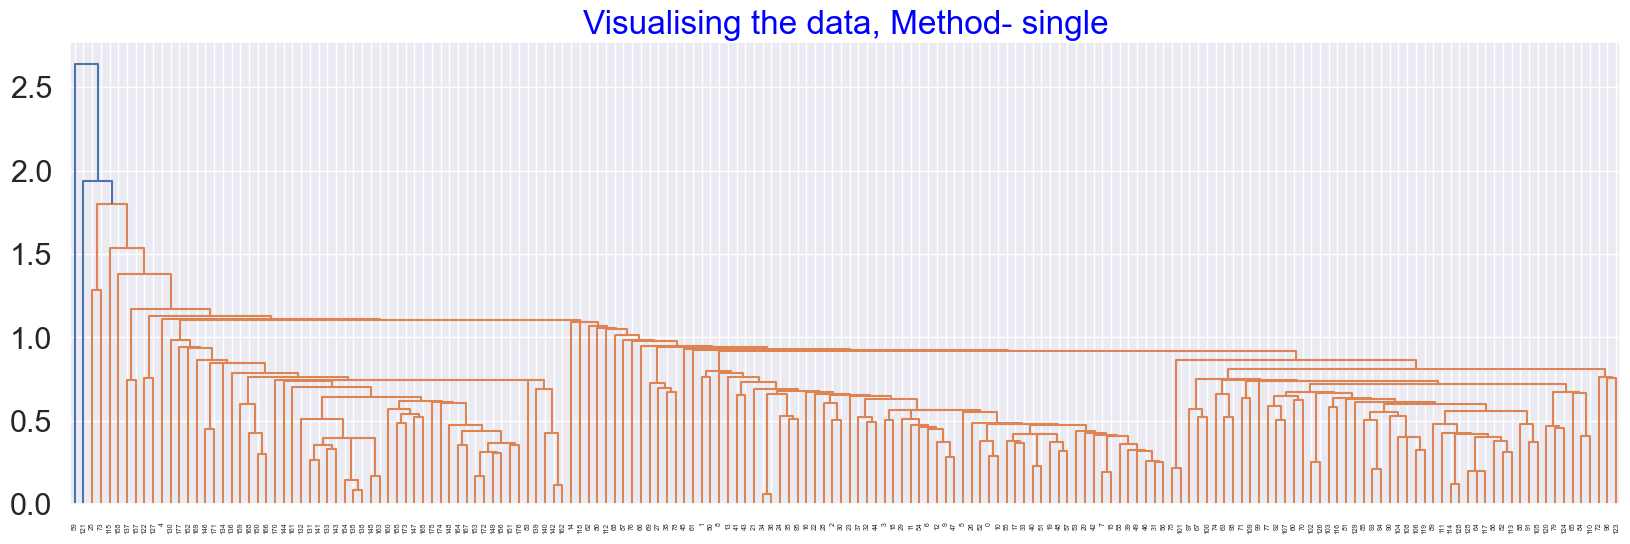

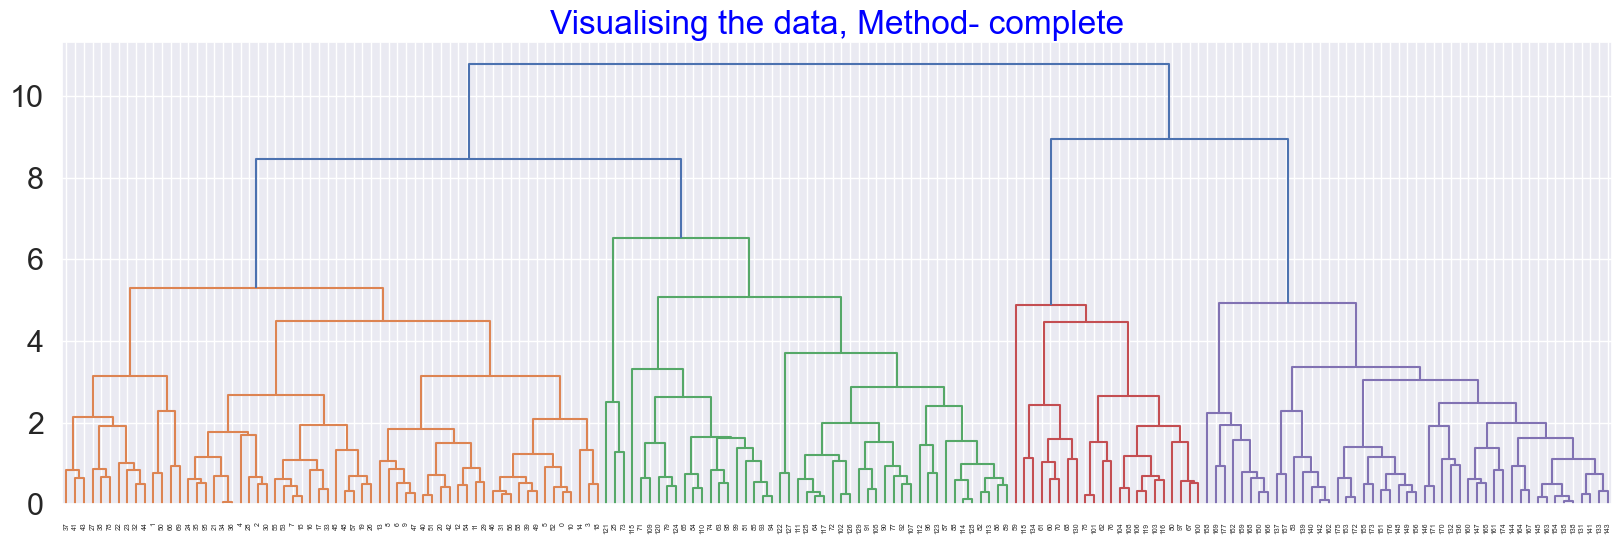

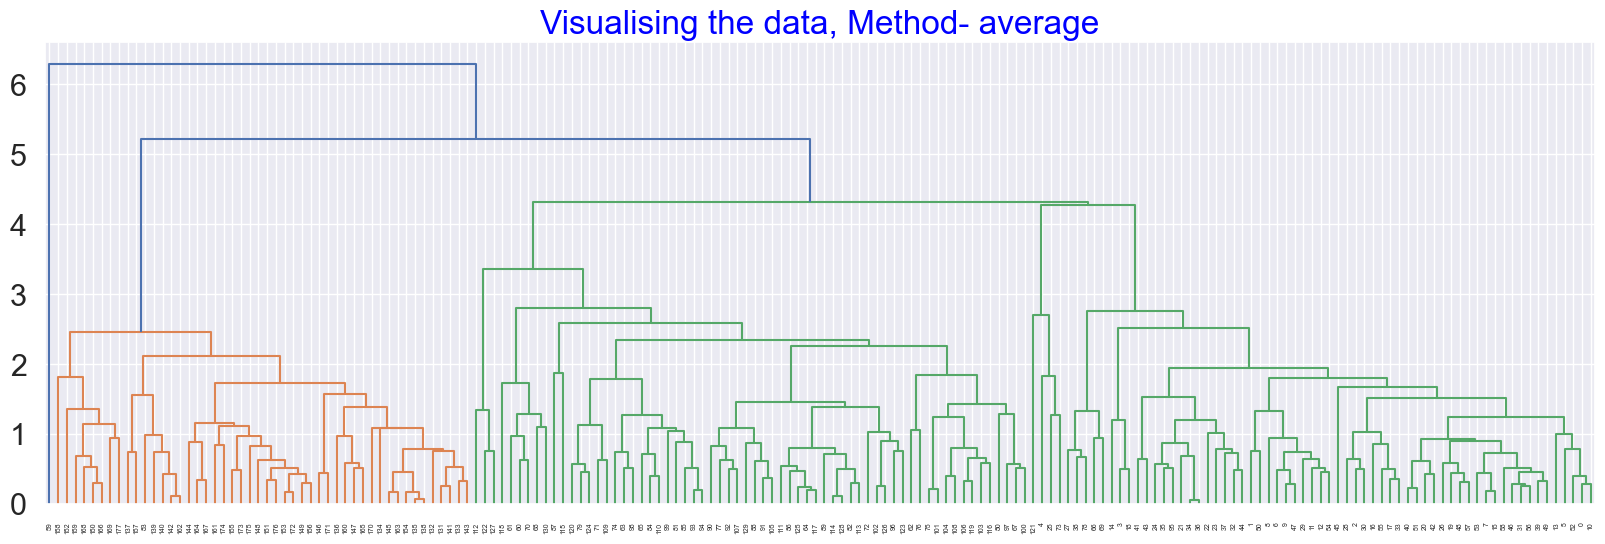

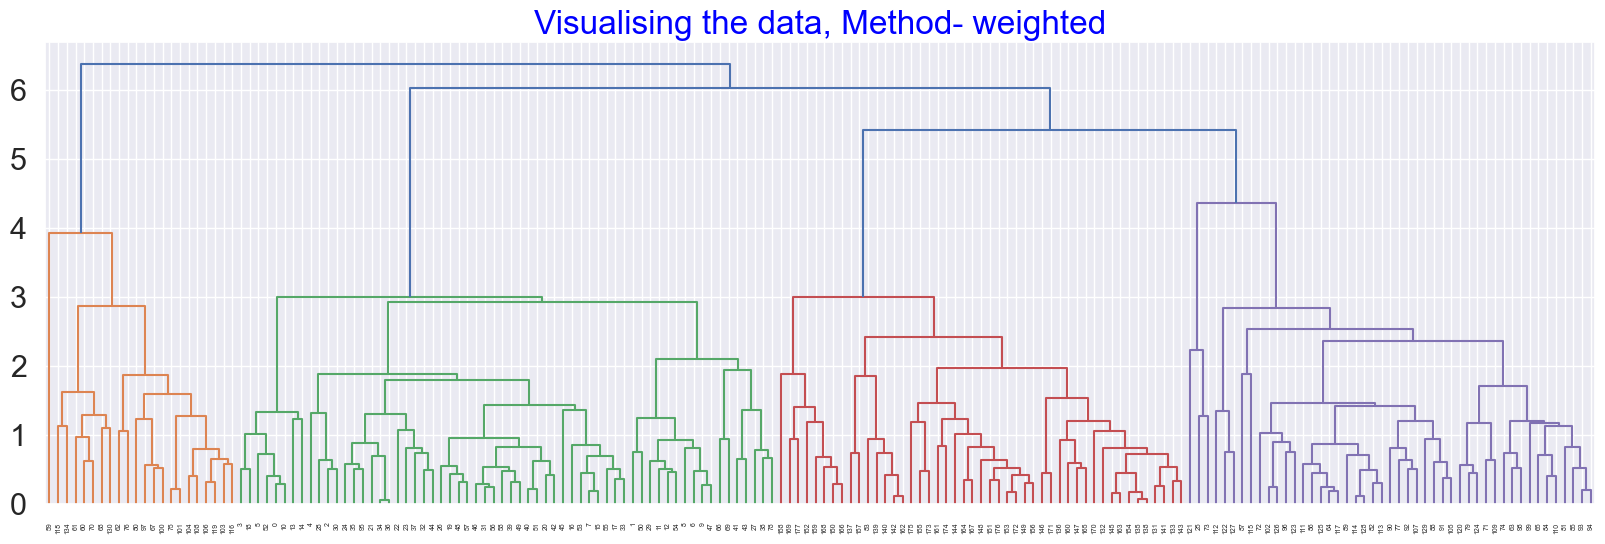

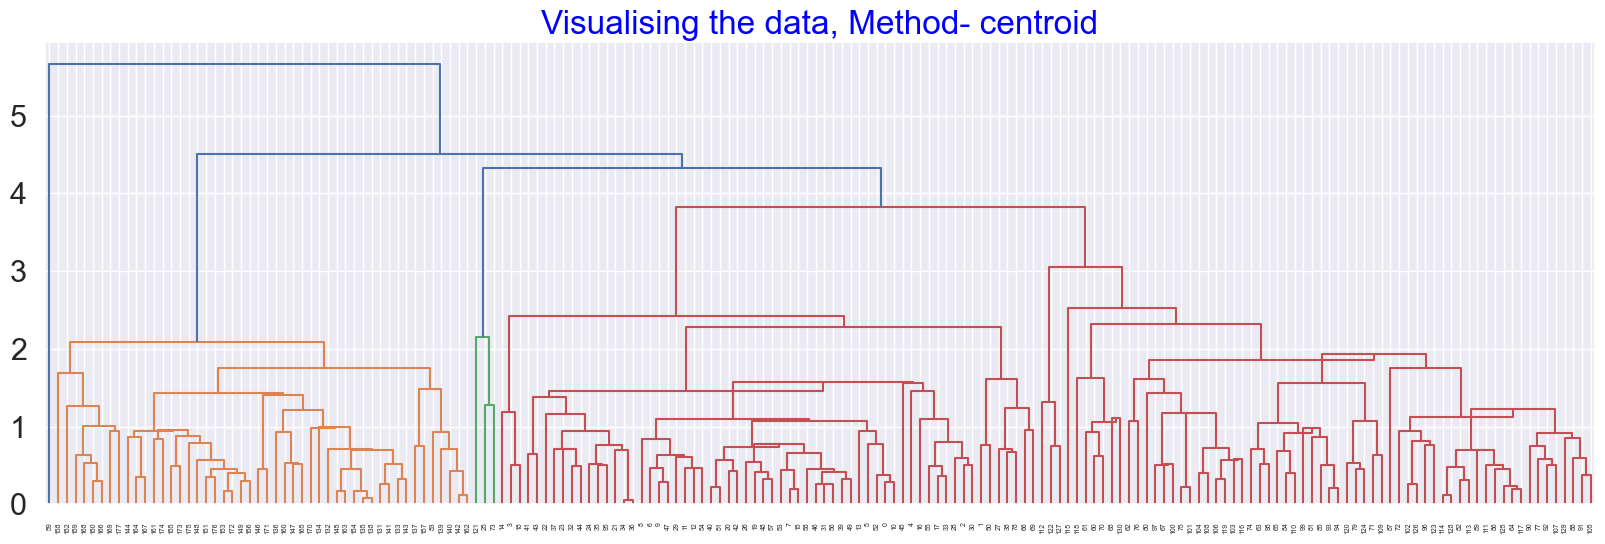

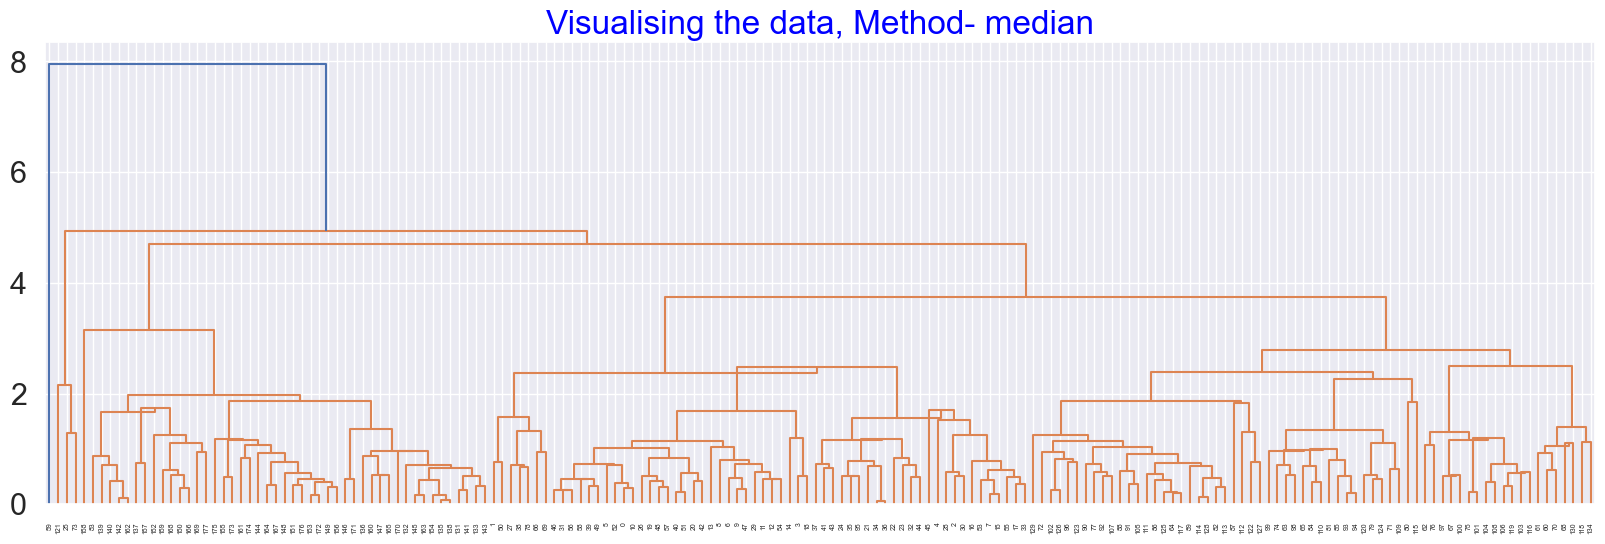

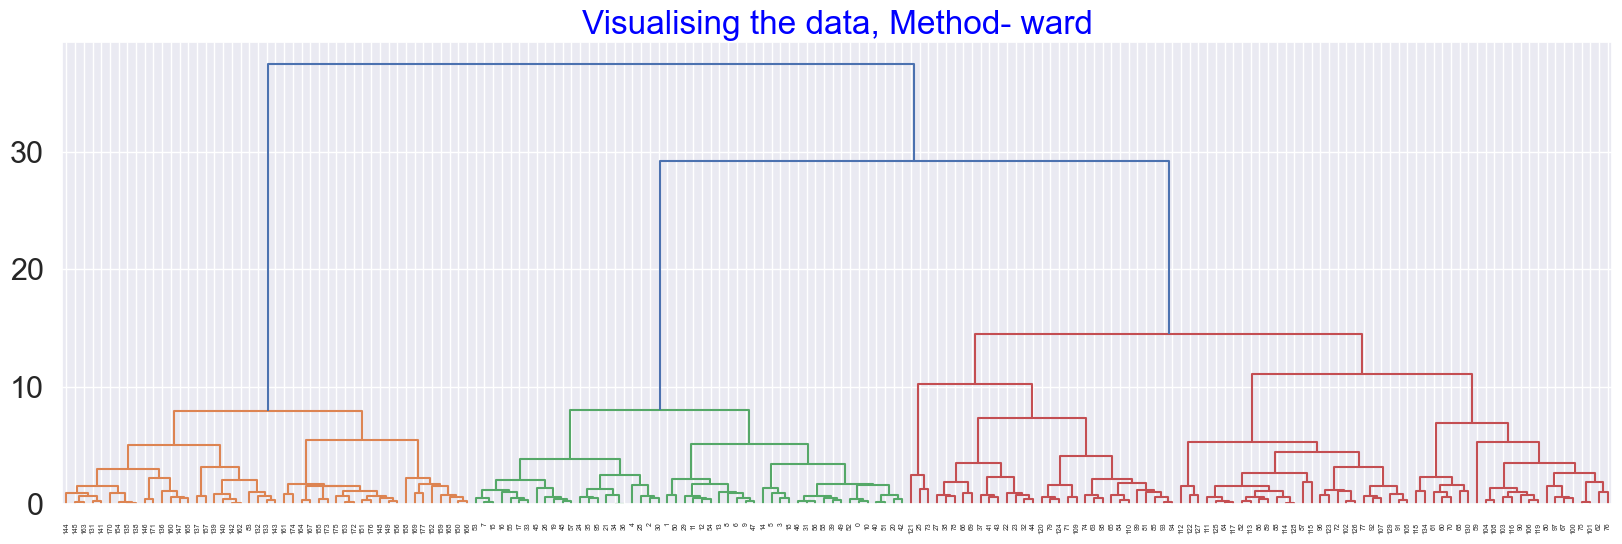

In [195]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_std_df, method = methods,optimal_ordering=False))

In [196]:
#Silhouette Score method for PCA Standard Scaled Data

In [197]:
#Applying Different Linkages using Euclidean Method for distance Calculation

In [198]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4187797009092467
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.34372787707571917
For n_clusters = 2 The average silhouette_score with linkage- average : 0.3485404154932633
For n_clusters = 2 The average silhouette_score with linkage- single : 0.3485404154932633

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4355352661667812
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.29482654329265306
For n_clusters = 3 The average silhouette_score with linkage- average : 0.4025547835526692
For n_clusters = 3 The average silhouette_score with linkage- single : 0.25789382473384287

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3739703958691179
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4171188330984906
For n_clusters = 4 The average silhouette_score with linkage- average : 0.46890675907642115
F

In [199]:
#Applying Different Linkages using Different Distance Methods

In [200]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
            silhouette_score1 = sil(pca_std_df, hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.34372787707571917
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.22011950029106103
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.34372787707571917
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.22011950029106103
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.42467159593806836

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.3485404154932633
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.3485404154932633
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.3485404154932633
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.34

Conclusion: Max score is with cluster numbers 4 in standard scaler transformation transformation.<br>

For n_clusters = 4 The average silhouette_score with linkage- complete and Affinity- l1 : 0.4731230759943259<br>

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.435535266166781

In [201]:
#Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on Standard Scaled Data

In [202]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='l1')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [203]:
# Cluster numbers

agg_clustering.n_clusters_

4

In [204]:
# Clustering Score

(sil(pca_std_df, agg_clustering.labels_)*100).round(3)

47.312

In [205]:
#Putting Cluster lables into original dataset And analysis of the same

In [207]:
# Concating Labels with main dataset copy
df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  \
0           0.28             2.29   5.64  1.04      3.92     1065   1   
1           0.26             1.28   4.38  1.05      3.40     1050   2   
2           0.30             2.81   5.68  1.03      3.17     1185   3   
3           0.24             2.18   7.80  0.86      3.45     1480   4   
4           0.39             1.82   4.32  1.04      2.93      735   5   

   Kmeans_label  Hierarchical_labels  
0             2                    1  
1             2                    1  
2             2                    1  
3             2                    1  
4             2                    1

In [208]:
df.groupby('Hierarchical_labels').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.249516  1.972097  2.249839  20.193548   92.000000   
1                    13.622615  1.927692  2.395692  16.955385  106.738462   
2                    13.157708  3.386042  2.437083  21.510417   98.541667   
3                    12.533333  1.923333  3.016667  27.833333  127.333333   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.182419   1.959194      0.370645        1.529516   
1                    2.821385   2.942154      0.283077        1.946923   
2                    1.681667   0.788542      0.455833        1.167708   
3                    3.036667   3.550000      0.383333        1.916667   

                        Color       Hue  Dilution      Proline          ID  \
                         mean      mean      mean         mean        mean   
Hierarchical_labels                                                          
0                    2.937097  1.042516  2.740000   497.564516   97.403226   
1                    5.378308  1.070308  3.124308  1072.276923   35.400000   
2                    7.410833  0.684375  1.698542   627.500000  153.520833   
3                    4.310000  1.123333  3.463333   760.000000   74.000000   

                    Kmeans_label  
                            mean  
Hierarchical_labels               
0                       0.967742  
1                       1.923077  
2                       0.000000  
3                       1.666667

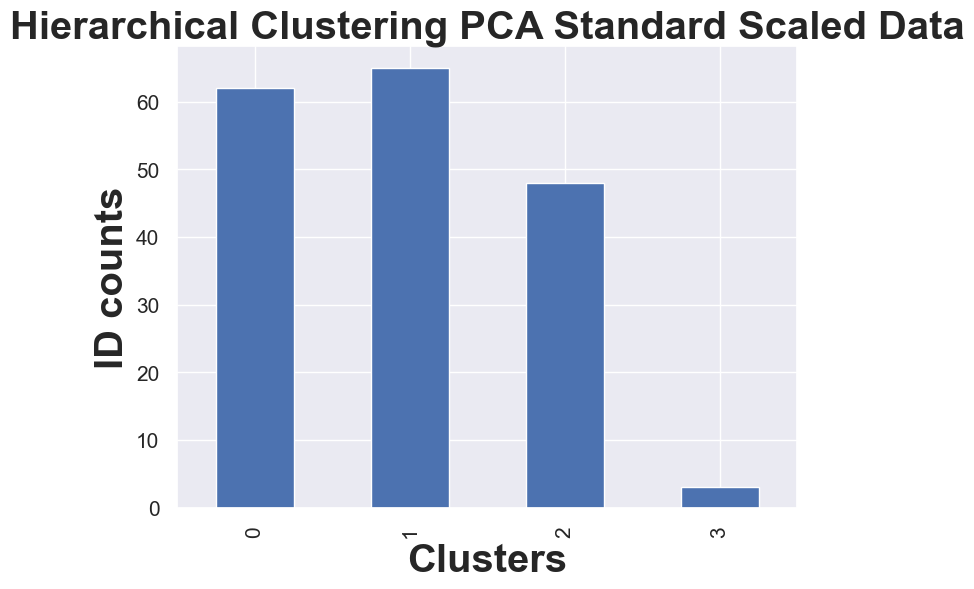

In [211]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(8,6))
df.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()# Plotting barplot using groupby method to get visualize how many row no. in each cluster

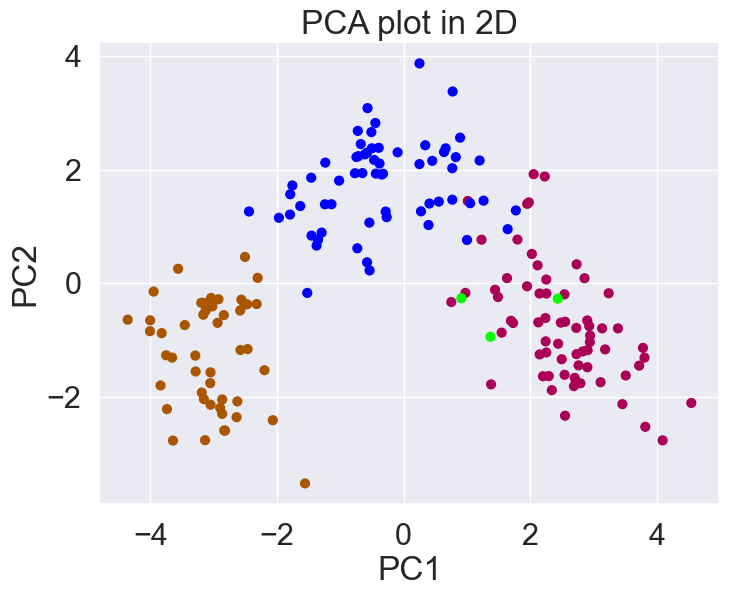

In [212]:
plt.figure(figsize=(8,6))
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [213]:
#We can now clearly see the 4 number of clusters formed

In [214]:
#Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature

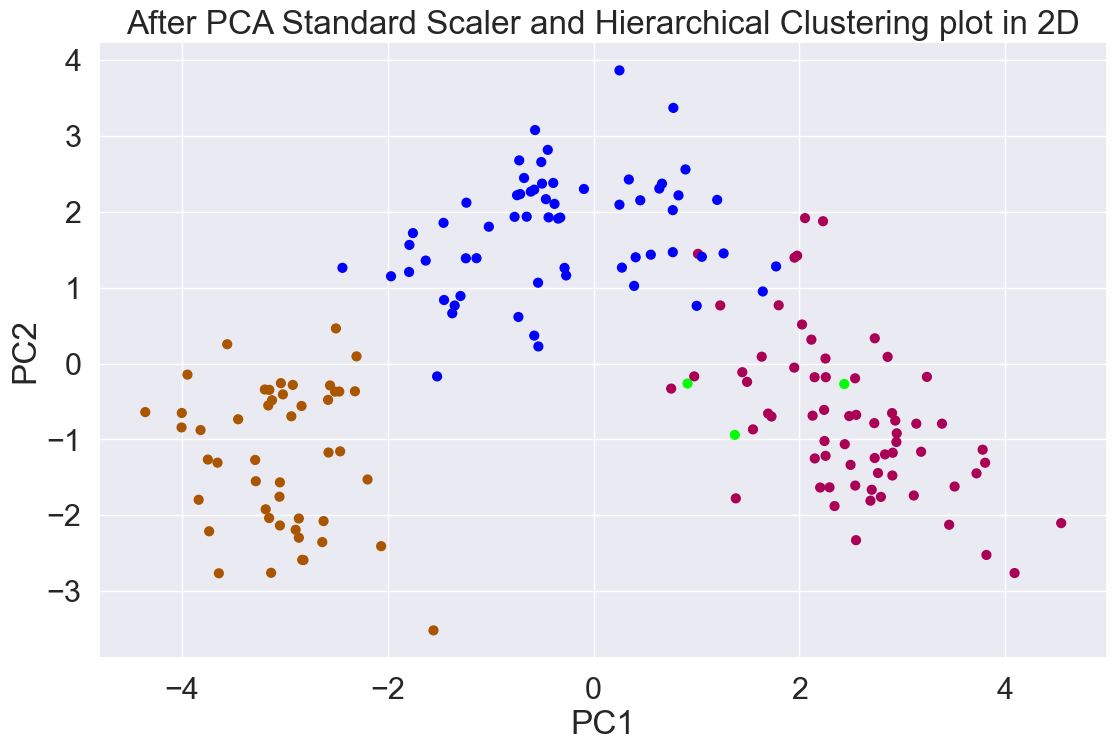

In [215]:
# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('After PCA Standard Scaler and Hierarchical Clustering plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

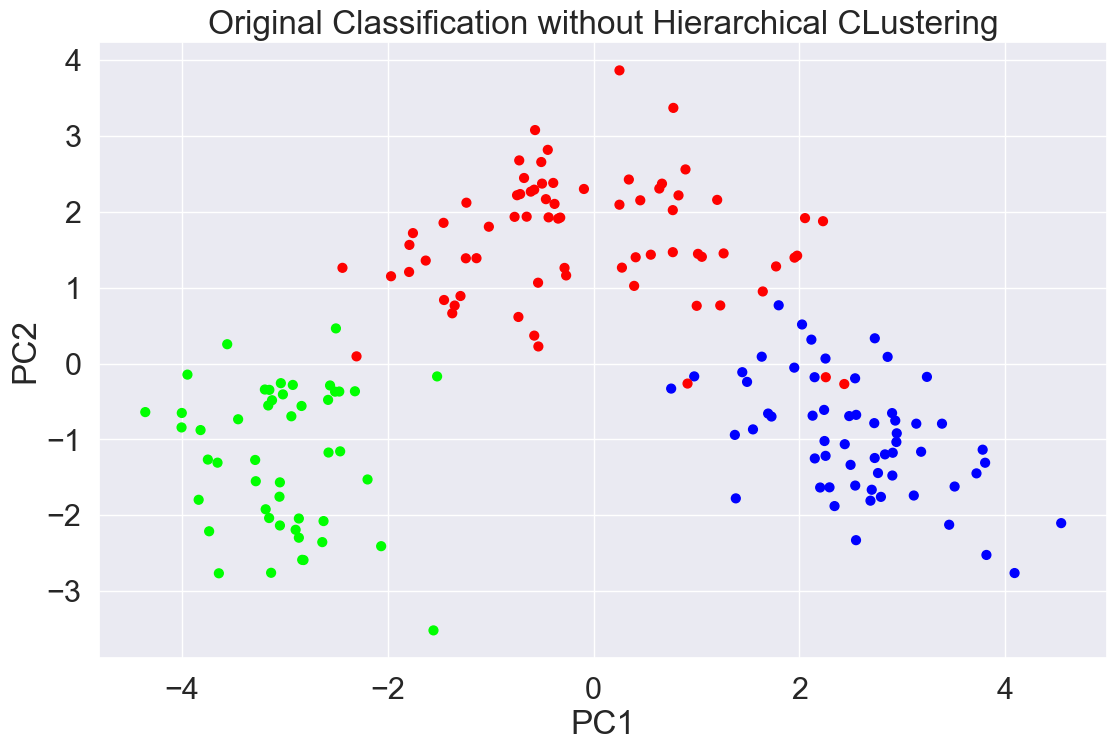

In [216]:
# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [218]:
# Group data by Clusters (Clusters=4)
display('After Applying Hierarchical Clustering on PCA Standard Scaled Dataset',df.groupby('Hierarchical_labels').agg(['mean']),'Original Classified Dataset',data.groupby('Type').agg(['mean']))

'After Applying Hierarchical Clustering on PCA Standard Scaled Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.249516  1.972097  2.249839  20.193548   92.000000   
1                    13.622615  1.927692  2.395692  16.955385  106.738462   
2                    13.157708  3.386042  2.437083  21.510417   98.541667   
3                    12.533333  1.923333  3.016667  27.833333  127.333333   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.182419   1.959194      0.370645        1.529516   
1                    2.821385   2.942154      0.283077        1.946923   
2                    1.681667   0.788542      0.455833        1.167708   
3                    3.036667   3.550000      0.383333        1.916667   

                        Color       Hue  Dilution      Proline          ID  \
                         mean      mean      mean         mean        mean   
Hierarchical_labels                                                          
0                    2.937097  1.042516  2.740000   497.564516   97.403226   
1                    5.378308  1.070308  3.124308  1072.276923   35.400000   
2                    7.410833  0.684375  1.698542   627.500000  153.520833   
3                    4.310000  1.123333  3.463333   760.000000   74.000000   

                    Kmeans_label  
                            mean  
Hierarchical_labels               
0                       0.967742  
1                       1.923077  
2                       0.000000  
3                       1.666667

'Original Classified Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028   94.549296  2.258873   
3     13.153750  3.333750  2.437083  21.416667   99.312500  1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1      2.982373      0.290000        1.899322  5.528305  1.062034  3.157797   
2      2.080845      0.363662        1.630282  3.086620  1.056282  2.785352   
3      0.781458      0.447500        1.153542  7.396250  0.682708  1.683542   

          Proline     ID Kmeans_label  
             mean   mean         mean  
Type                                   
1     1115.711864   30.0          2.0  
2      519.507042   95.0          1.0  
3      629.895833  154.5          0.0

Observation:<br>
As you can see the most of the data is in the first three clusters and very little amount of data in the last cluster so it must been that clusters are overlapping or may be that the data belonging to clusters may be wrong/incorrect.

In [219]:
#Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on MinMaxScaled Data

In [221]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='l2')
y_pred_hie = agg_clustering.fit_predict(pca_minmax_df)
print(y_pred_hie.shape)

(178,)


In [222]:
y_pred_hie

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [223]:
# Cluster numbers
agg_clustering.n_clusters_

3

In [225]:
# Clustering Score
(sil(pca_minmax_df, agg_clustering.labels_)*100).round(3)

51.639

In [226]:
#Putting Cluster lables into original dataset And analysis of the same

In [227]:
# Concating Labels with main dataset copy
df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  \
0           0.28             2.29   5.64  1.04      3.92     1065   1   
1           0.26             1.28   4.38  1.05      3.40     1050   2   
2           0.30             2.81   5.68  1.03      3.17     1185   3   
3           0.24             2.18   7.80  0.86      3.45     1480   4   
4           0.39             1.82   4.32  1.04      2.93      735   5   

   Kmeans_label  Hierarchical_labels  
0             2                    2  
1             2                    2  
2             2                    2  
3             2                    2  
4             2                    2

In [228]:
df.groupby('Hierarchical_labels').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.226094  1.964219  2.244531  20.076563   93.890625   
1                    13.157708  3.386042  2.437083  21.510417   98.541667   
2                    13.637424  1.933788  2.433485  17.465152  106.287879   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.157969   1.987656      0.372812        1.565781   
1                    1.681667   0.788542      0.455833        1.167708   
2                    2.874242   2.971970      0.282879        1.923030   

                        Color       Hue  Dilution      Proline          ID  \
                         mean      mean      mean         mean        mean   
Hierarchical_labels                                                          
0                    2.994687  1.042437  2.746875   503.125000   97.578125   
1                    7.410833  0.684375  1.698542   627.500000  153.520833   
2                    5.347879  1.073636  3.144697  1070.106061   35.106061   

                    Kmeans_label  
                            mean  
Hierarchical_labels               
0                       0.968750  
1                       0.000000  
2                       1.939394

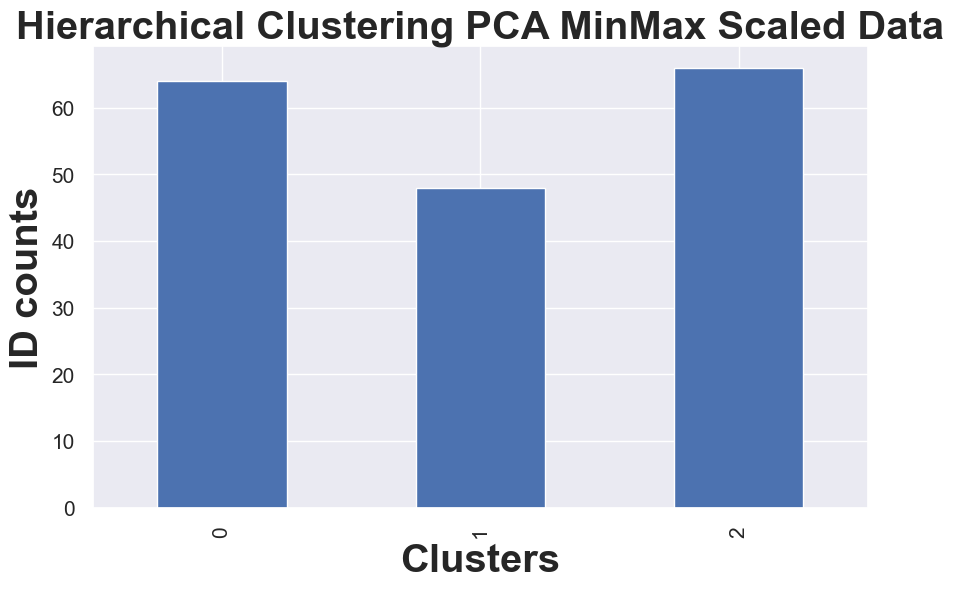

In [229]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

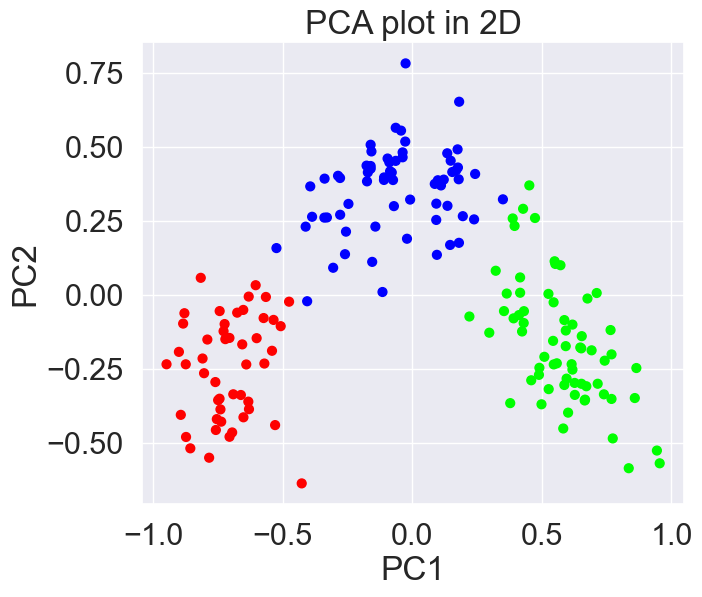

In [230]:
plt.figure(figsize=(7,6))
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

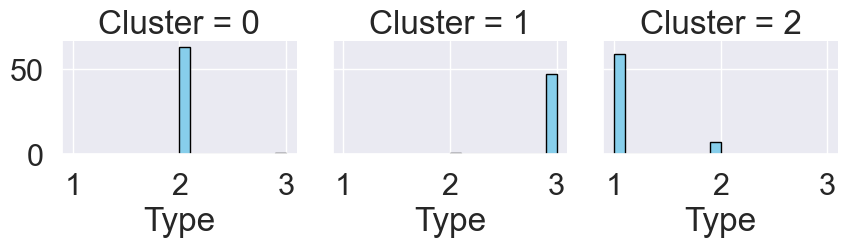

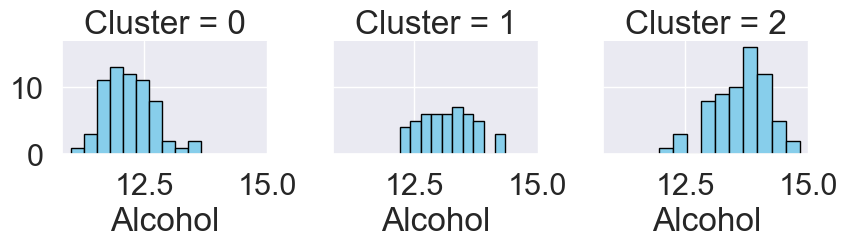

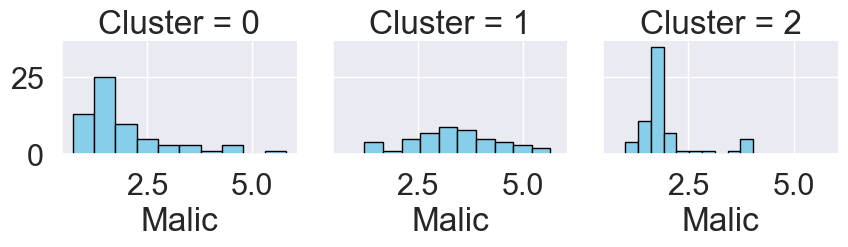

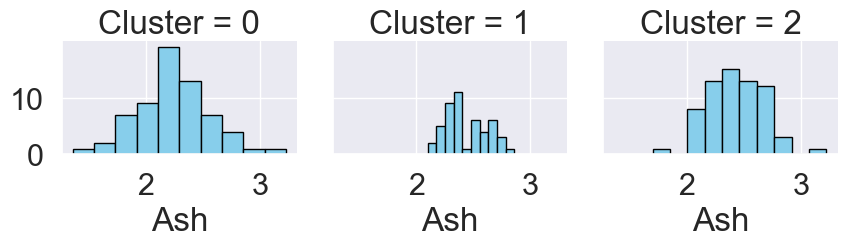

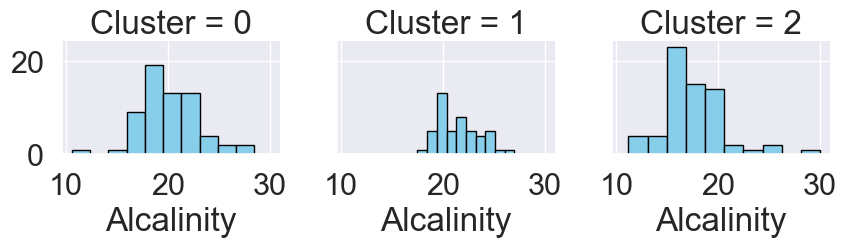

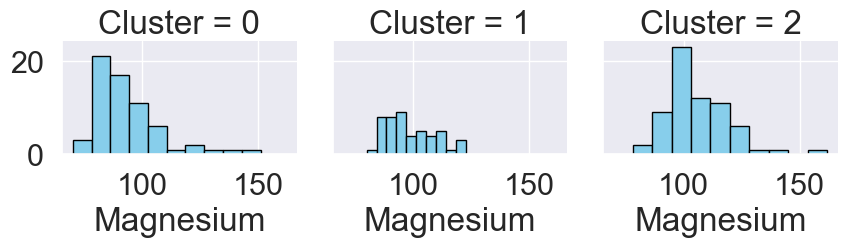

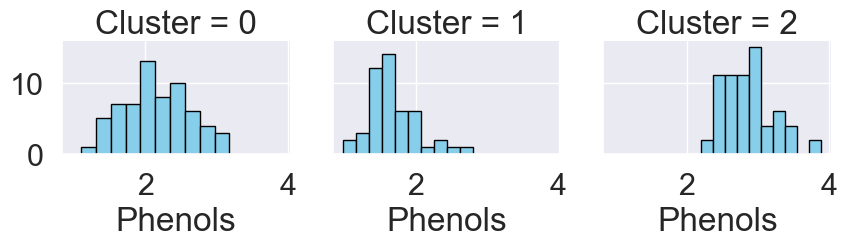

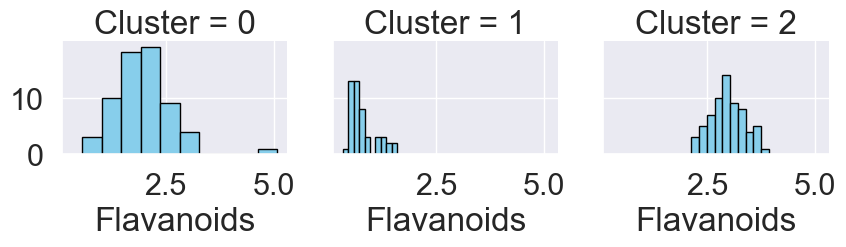

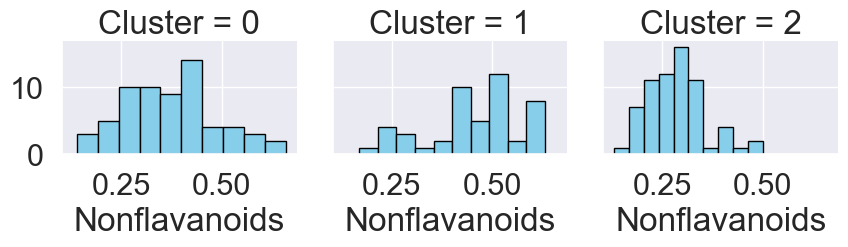

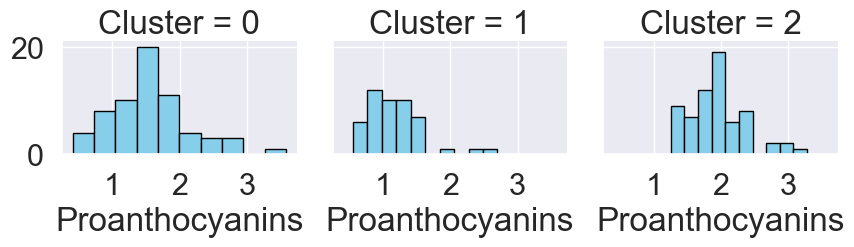

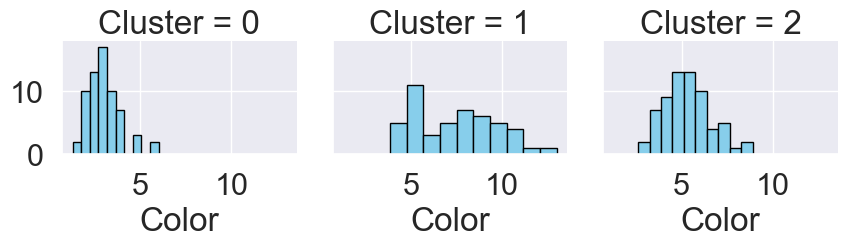

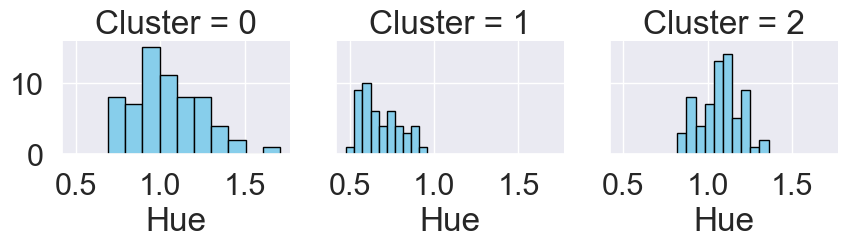

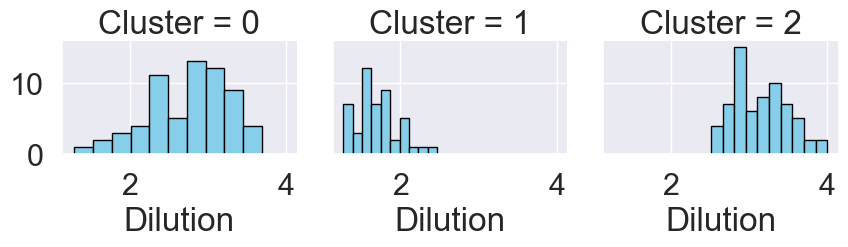

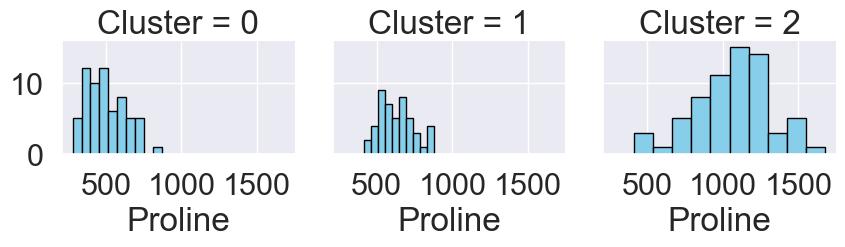

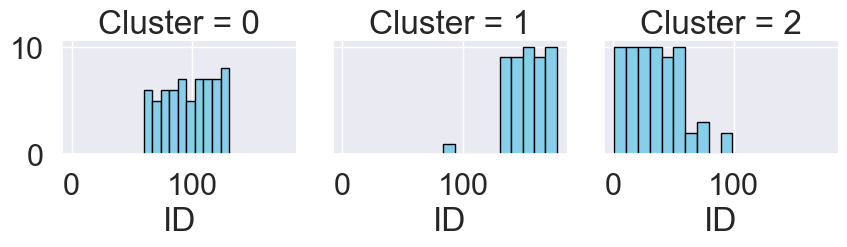

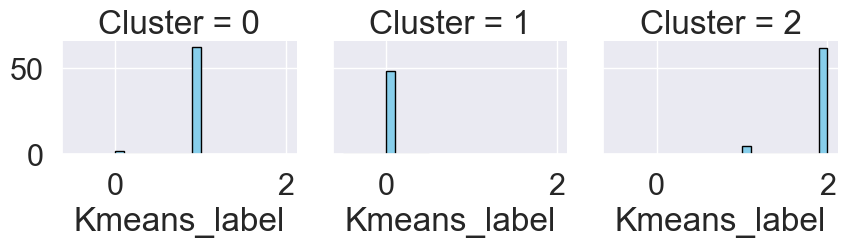

In [242]:
df1 = data.copy()
df1['Cluster'] = agg_clustering.labels_

aux=df1.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(df1, col="Cluster")
    grid.map(plt.hist, cluster, color="skyblue", lw=1, edgecolor="black")

In [243]:
# Sorting elements based on cluster label assigned and taking average for insights.
cluster1 = pd.DataFrame(df1.loc[df1.Cluster==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.Cluster==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(df1.loc[df1.Cluster==2].mean(),columns= ['Cluster2_avg'])

In [244]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

Cluster1_avg  Cluster2_avg  Cluster2_avg
Type                 2.015625      2.979167      1.106061
Alcohol             12.226094     13.157708     13.637424
Malic                1.964219      3.386042      1.933788
Ash                  2.244531      2.437083      2.433485
Alcalinity          20.076563     21.510417     17.465152
Magnesium           93.890625     98.541667    106.287879
Phenols              2.157969      1.681667      2.874242
Flavanoids           1.987656      0.788542      2.971970
Nonflavanoids        0.372813      0.455833      0.282879
Proanthocyanins      1.565781      1.167708      1.923030
Color                2.994688      7.410833      5.347879
Hue                  1.042438      0.684375      1.073636
Dilution             2.746875      1.698542      3.144697
Proline            503.125000    627.500000   1070.106061
ID                  97.578125    153.520833     35.106061
Kmeans_label         0.968750      0.000000      1.924242
Cluster              0.000000      1.000000      2.000000

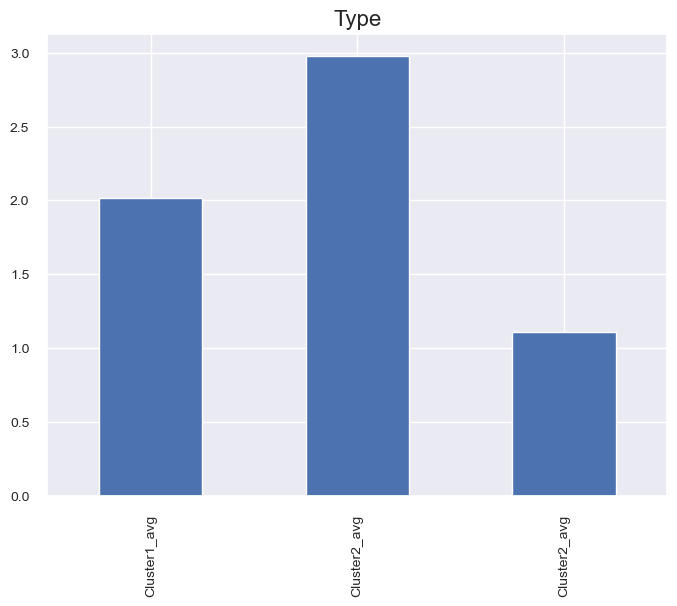

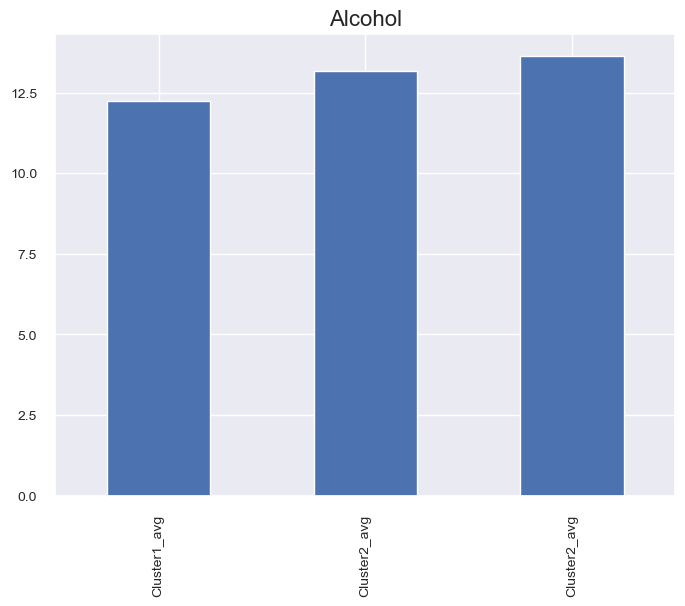

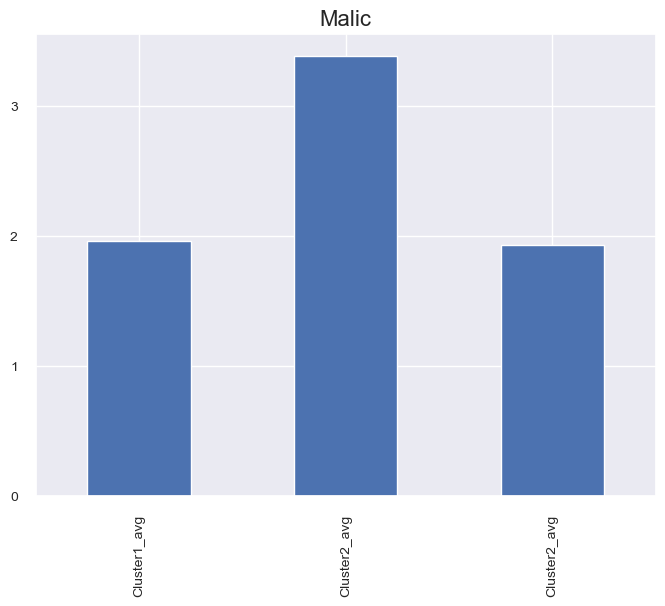

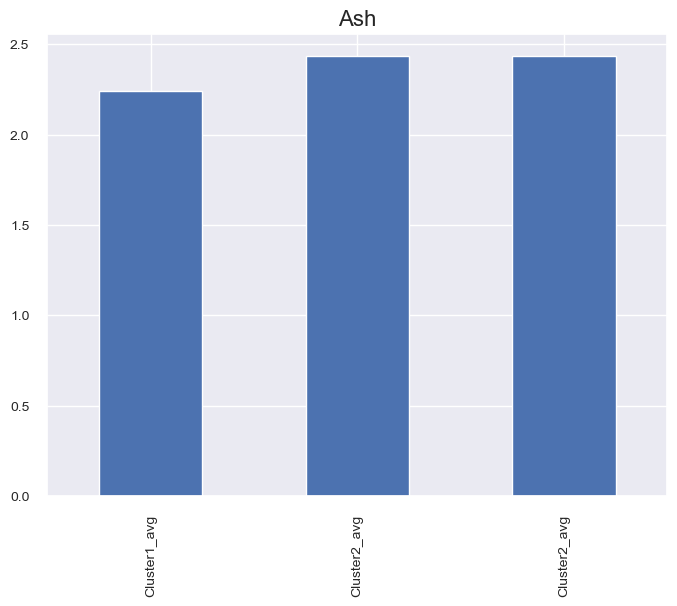

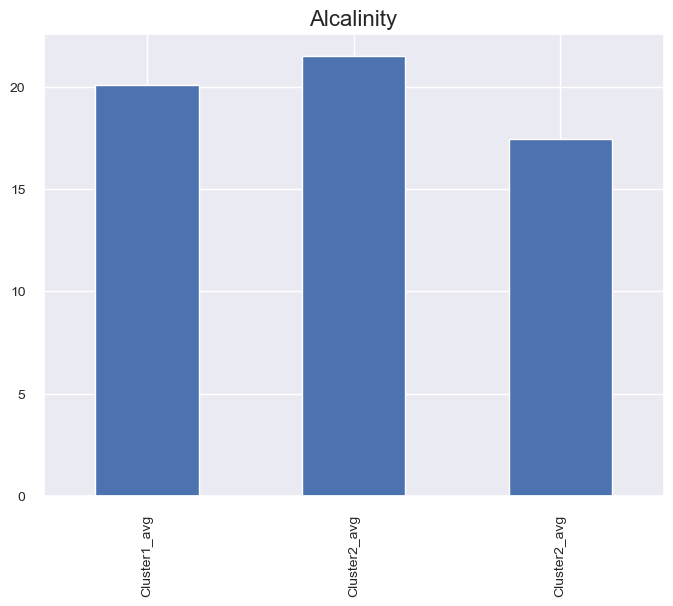

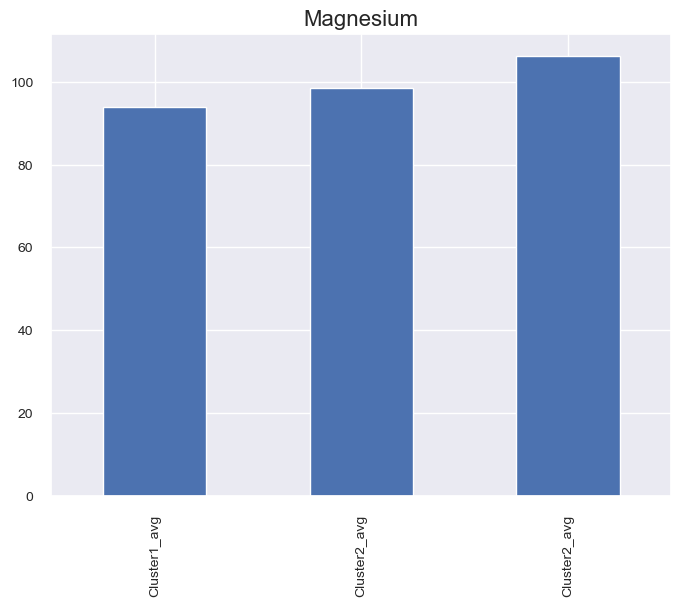

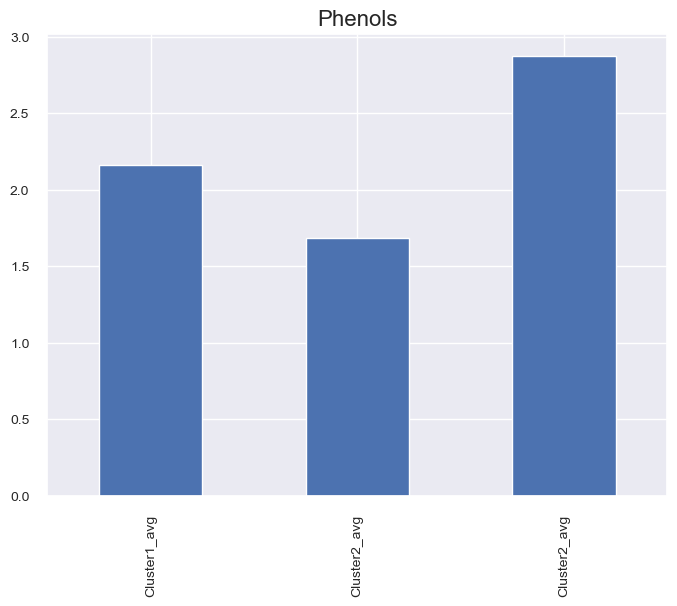

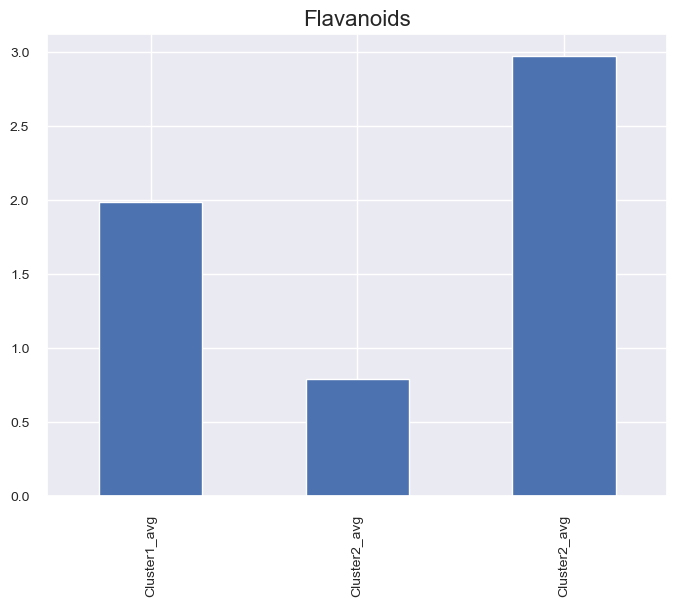

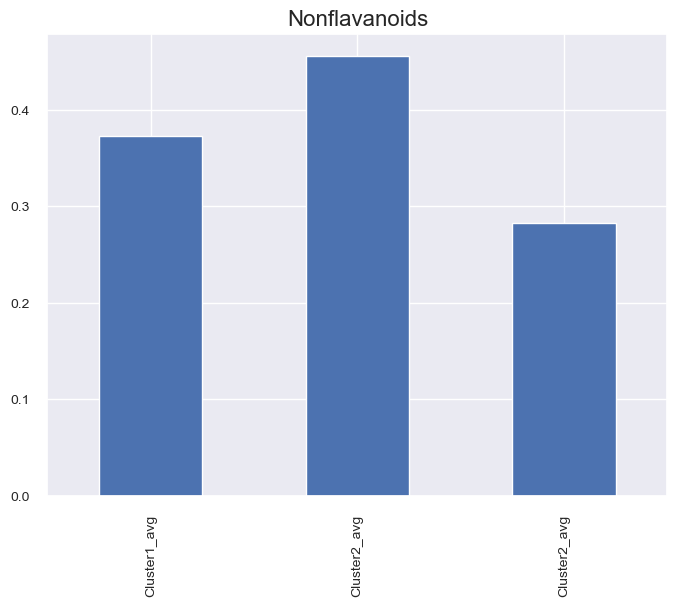

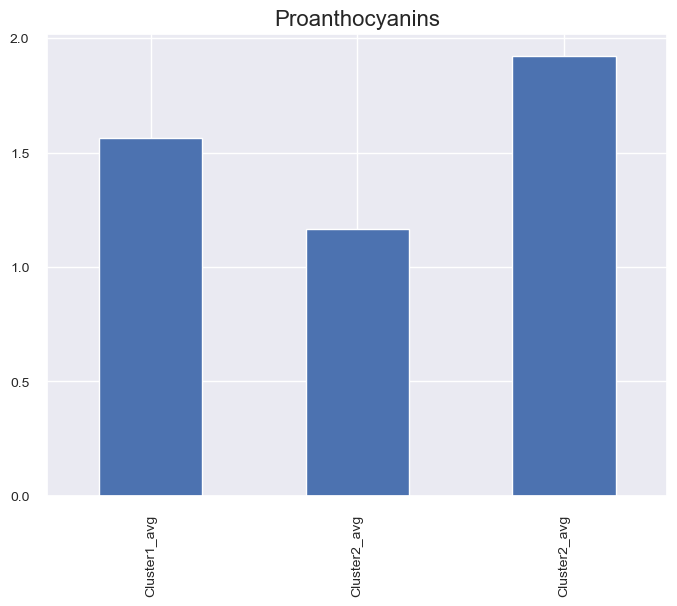

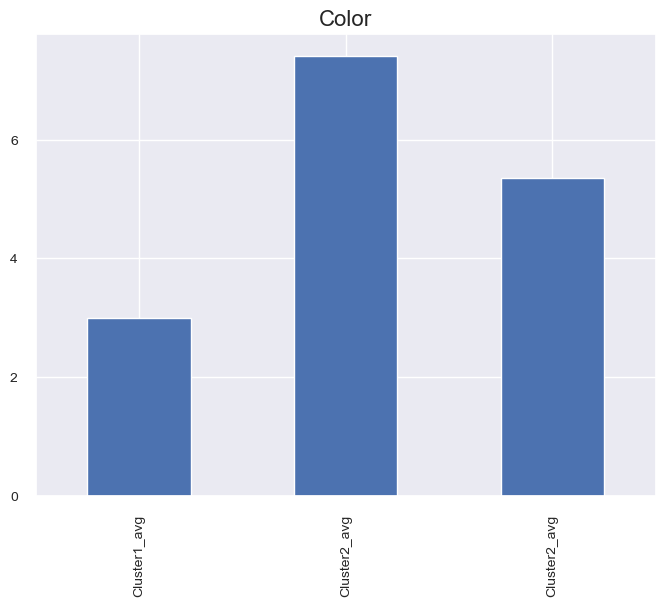

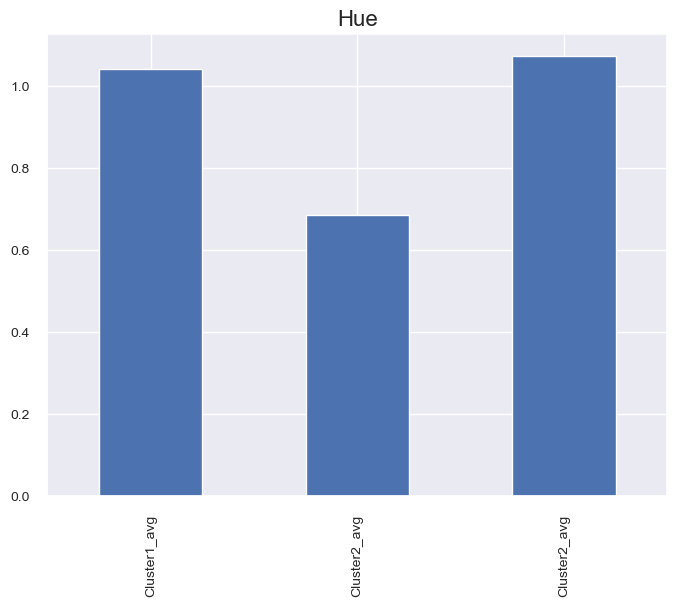

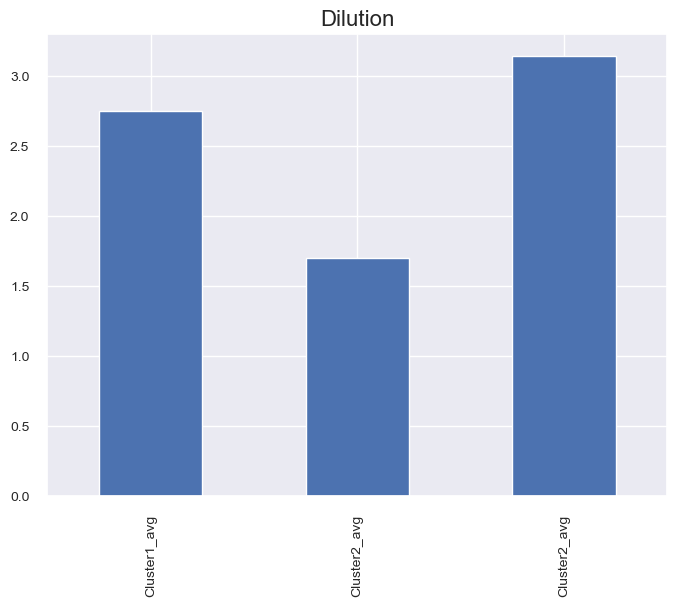

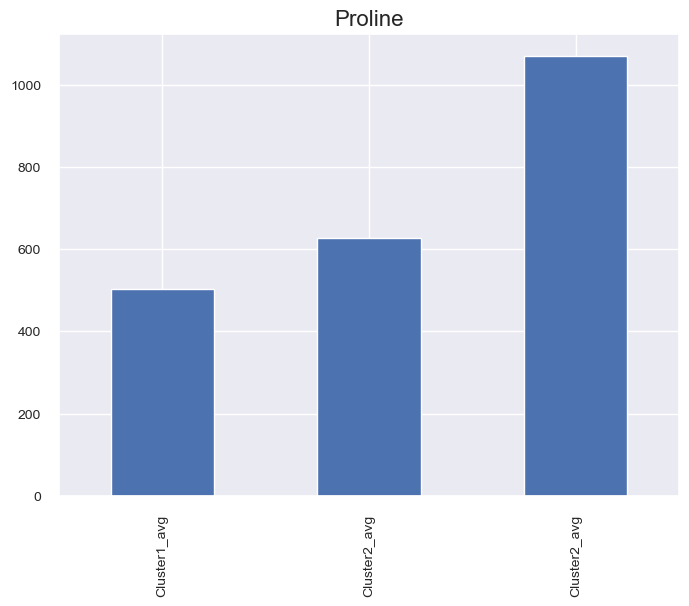

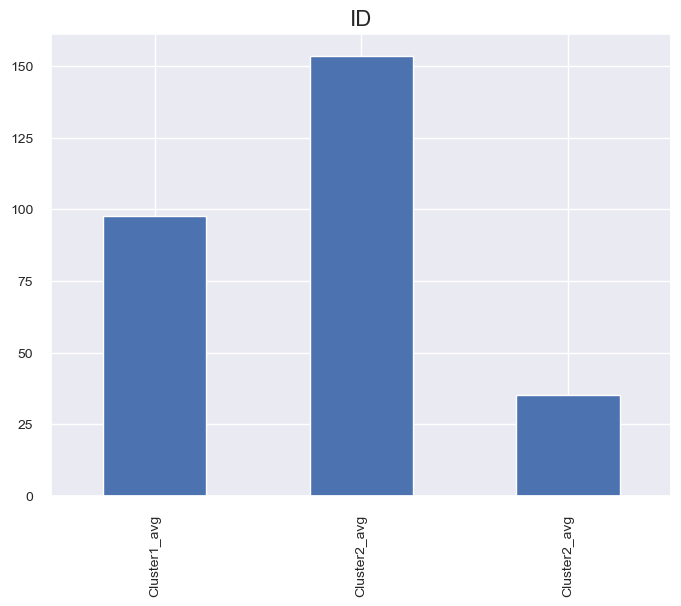

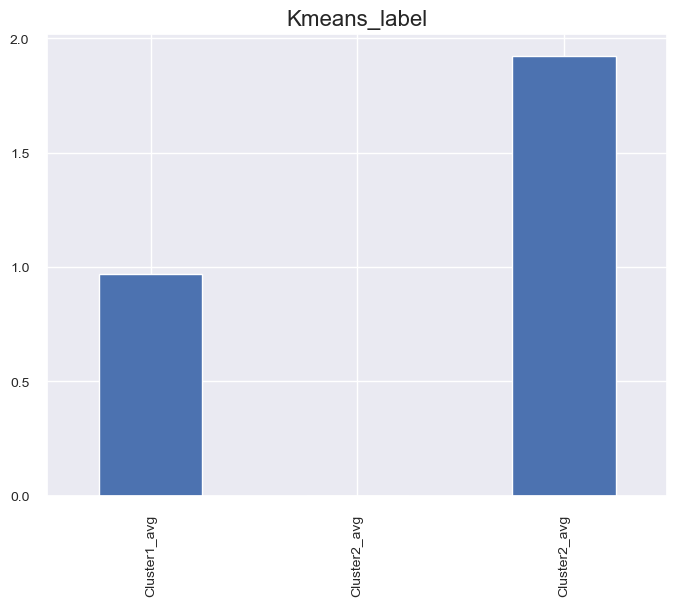

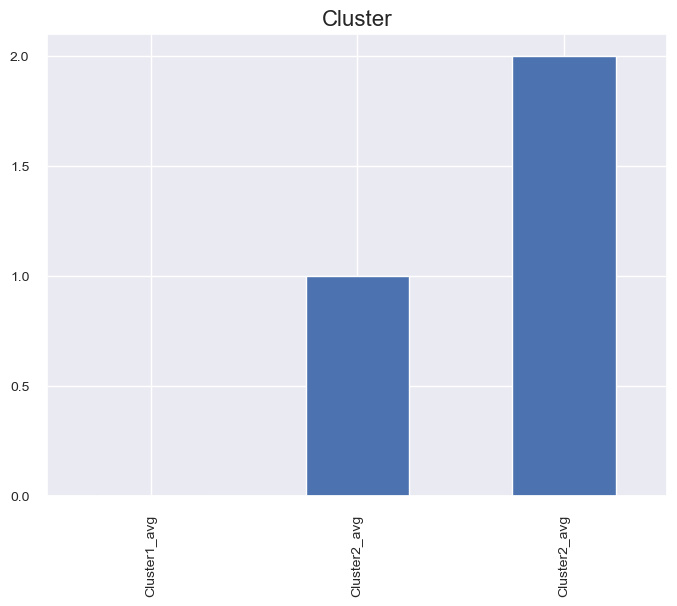

In [246]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=15)
    j.plot(kind='bar',fontsize=10)
    plt.show()
    print()

In [247]:
#Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature

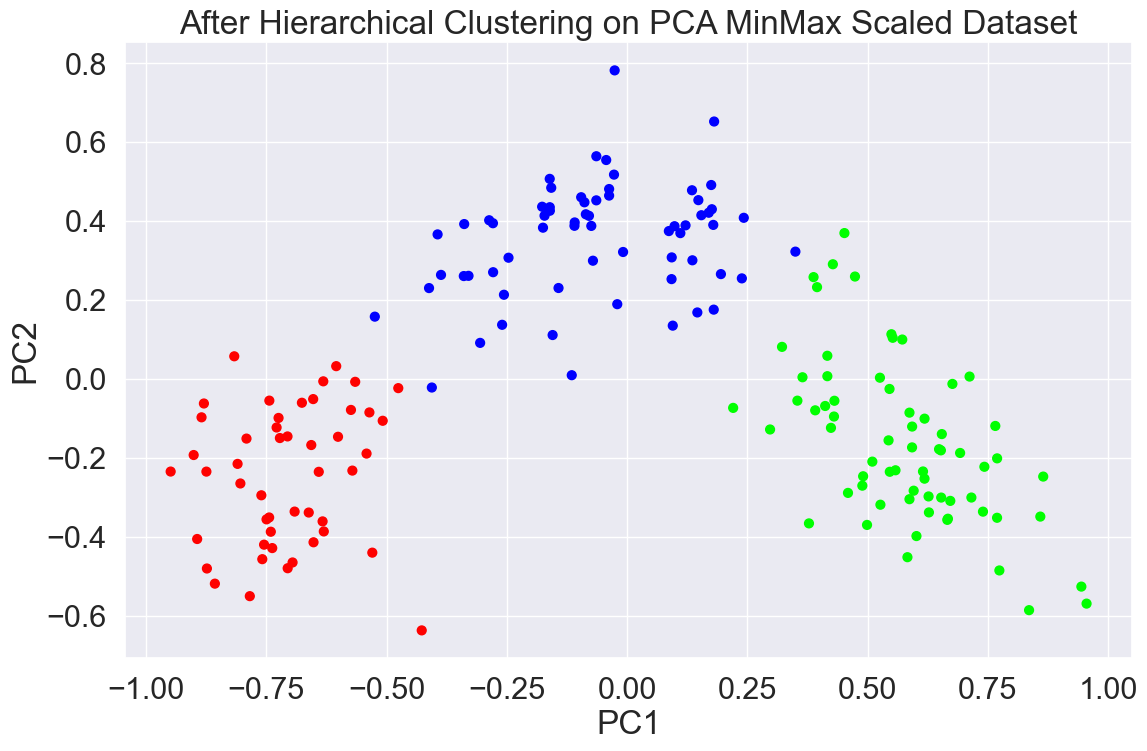

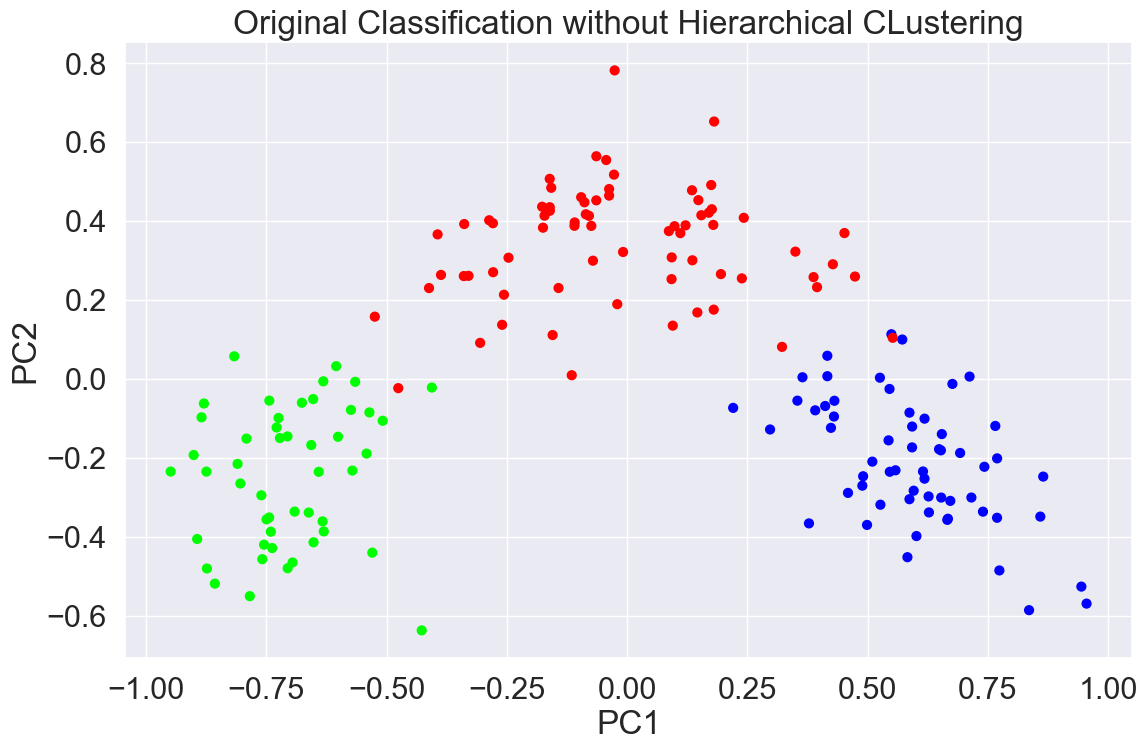

In [248]:
# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

plt.title('After Hierarchical Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [250]:
# Group data by Clusters (K=3)
display('After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset',df.groupby('Hierarchical_labels').agg(['mean']),'Original Classified Dataset',data.groupby('Type').agg(['mean']))

'After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.226094  1.964219  2.244531  20.076563   93.890625   
1                    13.157708  3.386042  2.437083  21.510417   98.541667   
2                    13.637424  1.933788  2.433485  17.465152  106.287879   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.157969   1.987656      0.372812        1.565781   
1                    1.681667   0.788542      0.455833        1.167708   
2                    2.874242   2.971970      0.282879        1.923030   

                        Color       Hue  Dilution      Proline          ID  \
                         mean      mean      mean         mean        mean   
Hierarchical_labels                                                          
0                    2.994687  1.042437  2.746875   503.125000   97.578125   
1                    7.410833  0.684375  1.698542   627.500000  153.520833   
2                    5.347879  1.073636  3.144697  1070.106061   35.106061   

                    Kmeans_label  
                            mean  
Hierarchical_labels               
0                       0.968750  
1                       0.000000  
2                       1.939394

'Original Classified Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028   94.549296  2.258873   
3     13.153750  3.333750  2.437083  21.416667   99.312500  1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1      2.982373      0.290000        1.899322  5.528305  1.062034  3.157797   
2      2.080845      0.363662        1.630282  3.086620  1.056282  2.785352   
3      0.781458      0.447500        1.153542  7.396250  0.682708  1.683542   

          Proline     ID Kmeans_label  
             mean   mean         mean  
Type                                   
1     1115.711864   30.0          2.0  
2      519.507042   95.0          1.0  
3      629.895833  154.5          0.0

Observation:<br>
The 3 clusters has been clustered but has a negliglable amount of difference compared to original classified Feature<br>
We have perfectly clustered the data into Three Types as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column

1)applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.<br>
2)applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.<br>
3)analyzed two clustering techniques here..i) KMeans ii) Hierarchical Clusterig<br>
4)By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.
